In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
from matplotlib.animation import FuncAnimation
from IPython import display
from matplotlib.animation import PillowWriter

In [2]:
class simulator:
    
    def __init__(self, posx, posy, velx, vely, aceleração, massa, tipo, raio, en_cin,previous_velx, previous_vely, status):
        self.posy = posy
        self.posx = posx
        self.posy = posy
        self.velx = velx
        self.vely = vely
        self.aceleração = aceleração
        self.massa = massa
        self.tipo = tipo
        self.raio = raio
        self.en_cin = en_cin
        self.status = status
        self.previous_velx = previous_velx
        self.previous_vely = previous_vely
    
    def col_checker(partvelkx,partvelky,partposkx,partposky,partvelix,partveliy,partposix,partposiy,k,i,dt):
        #checkk=simulator.colision(simulator.colision(part[k].velx, part[k].vely,part[i].velx, part[i].vely, k, dt))
        #checki=simulator.colision(simulator.colision(part[k].velx, part[k].vely,part[i].velx, part[i].vely, k, dt))
        
        
        checkk=simulator.position(partvelkx,partvelky,partposkx,partposky,k,dt)
        checki=simulator.position(partvelix,partveliy,partposix,partposiy,i,dt)
                                  
        #ti=simulator.colision(checki[2], checki[3],k, i, dt)
        
        #tk=simulator.colision(checkk[2], checkk[3],k, i, dt)
                
        test_distx = (checkk[0] - checki[0])**2
        test_disty = (checkk[1] - checki[1])**2
        
        test_raio = part[k].raio + part[i].raio
        
        
        
        if np.sqrt(test_distx + test_disty) > test_raio:
            return False, "hehe"

        else:
            col1=simulator.colision(partvelkx,partvelky,partvelix,partveliy,partposkx,partposky,k,i,dt)
            col2=simulator.colision(partvelix,partveliy,partvelkx,partvelky,partposix,partposiy,k,i,dt)
            
            #print("col1--> "+str(col1))
            #print("col2--> "+str(col2))
            return True, col1, col2
        
    def position(velx,vely,posx,posy,k,dt):
        part_velx = velx + part[k].aceleração* dt
        part_posx = posx + part_velx* dt

        part_vely = vely+ part[k].aceleração* dt
        part_posy = posy + part_vely* dt
        
        return part_posx, part_posy

        
    
    def colision(velkx,velky,velix,veliy,posx,posy,k,i,dt):
        partkvx = (((part[k].massa - part[i].massa)/(part[k].massa + part[i].massa))*-velkx)+(
                                        (2*velix*part[i].massa)/(part[k].massa + part[i].massa))
        partkvx = partkvx*np.sqrt(0.999) + part[k].aceleração* dt
        partkx = posx + partkvx* dt
        

        partkvy = (((part[k].massa - part[i].massa)/(part[k].massa + part[i].massa))*-velky)+(
                                        (2*veliy*part[i].massa)/(part[k].massa + part[i].massa))
        partkvy = partkvy*np.sqrt(0.999) + part[k].aceleração* dt
        partky = posy + partkvy* dt
        
        return partkx,partky,partkvx,partkvy
    
    def g_force(k):
        distx_p= part[20].posx-part[k].posx
        disty_p= part[20].posy-part[k].posy
        dist_raio=part[20].raio-part[k].raio
        
        part[k].aceleração=((30)/(distx_p**2+disty_p**2)) * part[20].massa*part[k].massa
    
    def simul():
        n=0
        k=0
        i=0
        dt = 0.001

        geral_posx=[part[i].posx for i in range(len(part))]
          
        geral_posy = [part[i].posy for i in range(len(part))]

        geral_velx = []

        geral_vely = []

        sizes = [part[b].massa*10 for b in range(len(part))]

        for k in range(len(part)):
            for i in range(len(part)):
                if i<10:
                    part[k].status.append("0"+str(i)+"out")

                elif i>=10:
                    part[k].status.append(str(i)+"out")

        en_cin_rel = [part[i].en_cin for i in range(len(part))]

        en_cin_total = [sum(en_cin_rel)]

        color = ["b","g","r","c","m","y", "lime","maroon","darkolivegreen","dodgerblue","navy", "grey", "magenta", "tomato", "crimson", "darkgreen","aquamarine", "coral", "gold","indigo","saddlebrown"]
        
        while n<2000:
            for i in range(0,len(part)):
                part[i].velx = part[i].velx + part[i].aceleração* dt
                part[i].posx = part[i].posx + part[i].velx* dt

                part[i].vely = part[i].vely+ part[i].aceleração* dt
                part[i].posy = part[i].posy + part[i].vely* dt
                
                

            fig, ax = plt.subplots(figsize=(10,8))

            x= geral_posx
            y= geral_posy

            ax.set_xlim(-20,20)
            ax.set_ylim(-20,20)
            
            ax.scatter(x,y, linewidth=0.8, color=color,sizes=sizes)
            mplt.style.use("dark_background")
            plt.show()
            
            xvalues=[]
            yvalues=[]

            en_cin_total.append(sum(en_cin_rel))
            geral_posx.clear()
            geral_posy.clear()
            en_cin_rel.clear()
            
            for k in range(0,21):
                i=k+1
                
                if part[k].posx>=20:
                    part[k].velx = (-(part[k].velx))*np.sqrt(0.999) + (part[k].aceleração* dt)
                    part[k].posx = 20 + 2*(part[k].velx* dt)
                    part[k].en_cin = part[k].en_cin*0.999
                    
                if part[k].posx<=-20:
                    part[k].velx = (-(part[k].velx))*np.sqrt(0.999) + (part[k].aceleração* dt)
                    part[k].posx = -20 + 2*(part[k].velx* dt)
                    part[k].en_cin = part[k].en_cin*0.999
                    
                if part[k].posy>=20:
                    part[k].vely = (-(part[k].vely))*np.sqrt(0.999) + (part[k].aceleração* dt)
                    part[k].posy = 20 + 2*(part[k].vely* dt)
                    part[k].en_cin = part[k].en_cin*0.999
                    
                if part[k].posy<=-20:
                    part[k].vely = (-(part[k].vely))*np.sqrt(0.999) + (part[k].aceleração* dt)
                    part[k].posy = -20 + 2*(part[k].vely* dt)
                    part[k].en_cin = part[k].en_cin*0.999
                
                
                while i>k and i<21:
                    
                    simulator.g_force(k)
                    
                    check=simulator.col_checker(part[k].velx,part[k].vely,part[k].posx,part[k].posy,part[i].velx,part[i].vely,part[i].posx,part[i].posy,k,i,dt)
                    
                    if check[0]==True and part[k].status[i][-3:]=="iin":
                            pass
                        
                    if check[0]==True and part[k].status[i][-3:]=="out":
                        print(check)
                        part[k].velx=check[1][2]
                        part[k].vely=check[1][3]
                        part[k].posx=check[1][0]
                        part[k].posy=check[1][1]
                        
                        part[i].velx=check[2][2]
                        part[i].vely=check[2][3]
                        part[i].posx=check[2][0]
                        part[i].posy=check[2][1]
                        
                        check2=simulator.col_checker(part[k].velx,part[k].vely,part[k].posx,part[k].posy,part[i].velx,part[i].vely,part[i].posx,part[i].posy,k,i,dt)
                        print("check2 -->"+str(check2))
                        
                        if check2[0]==True and part[k].status[i][-3:]=="iin":
                            pass
                        
                        if check2[0]==True and part[k].status[i][-3:]=="out":
                            part[k].status[i]=part[k].status[i]=part[k].status[i].replace(part[k].status[i][-3:],"iin")
                        
                    if check[0]==False and part[k].status[i][-3:]=="iin":
                        part[k].status[i]=part[k].status[i].replace(part[k].status[i][-3:],"out")

                    else:
                        pass
                    
                    i+=1
                en_cin_rel.append(part[k].en_cin)
                geral_posx.append(part[k].posx)
                geral_posy.append(part[k].posy)
            
            n+=1
                        
                    
                        
                    
                
        
    

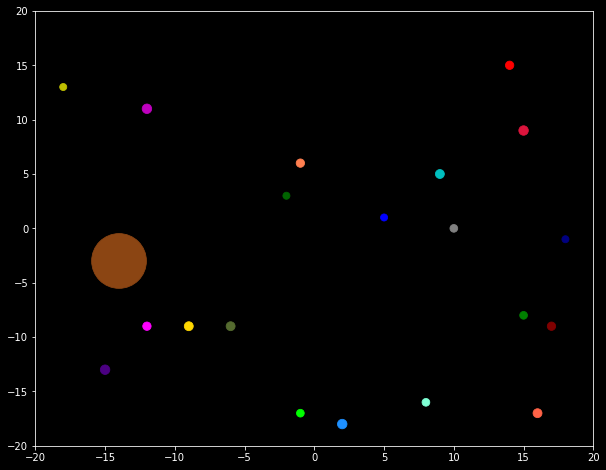

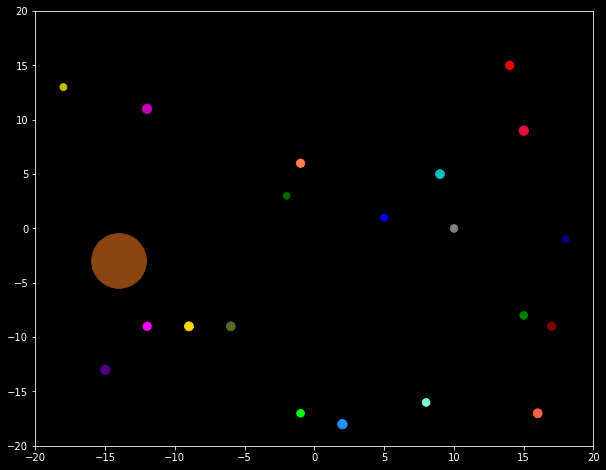

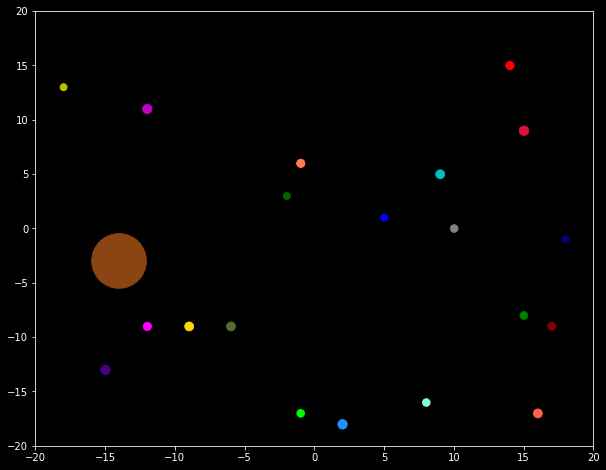

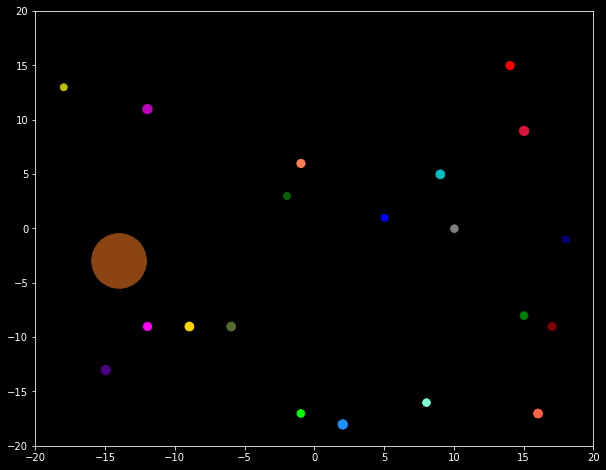

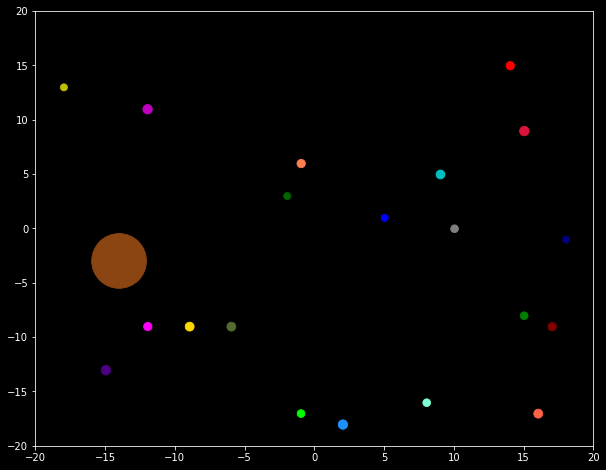

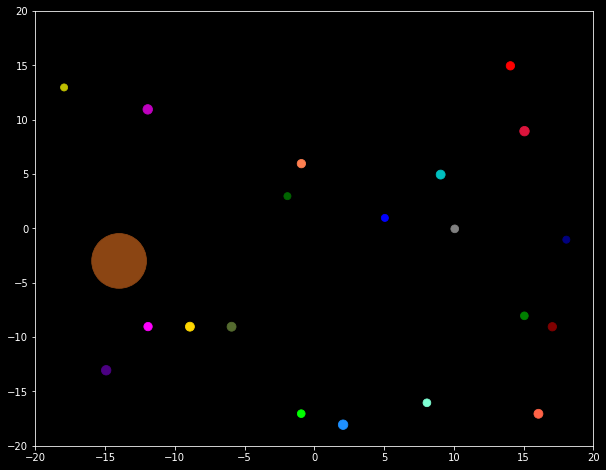

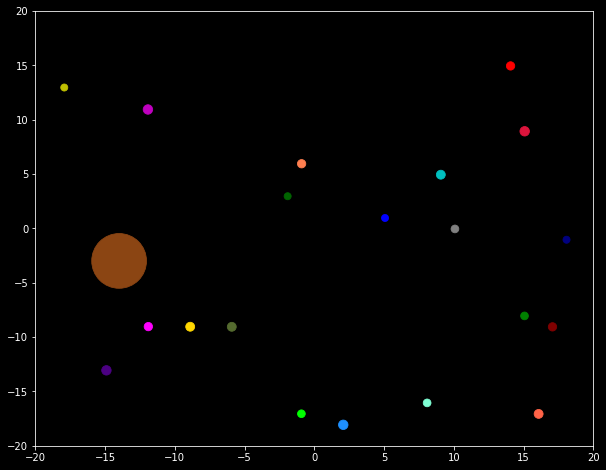

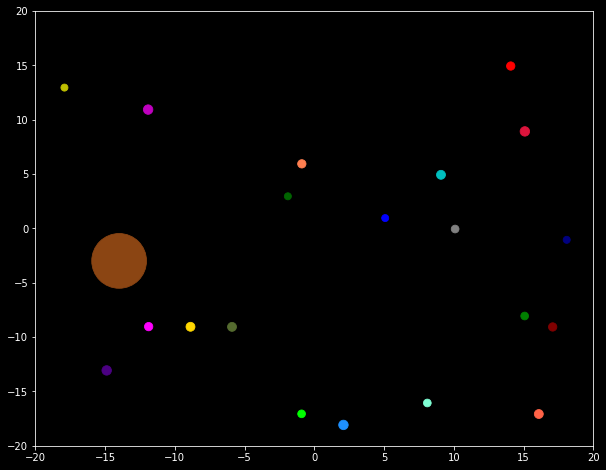

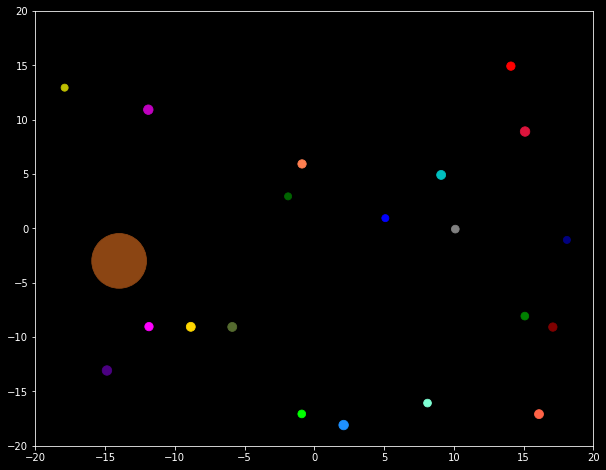

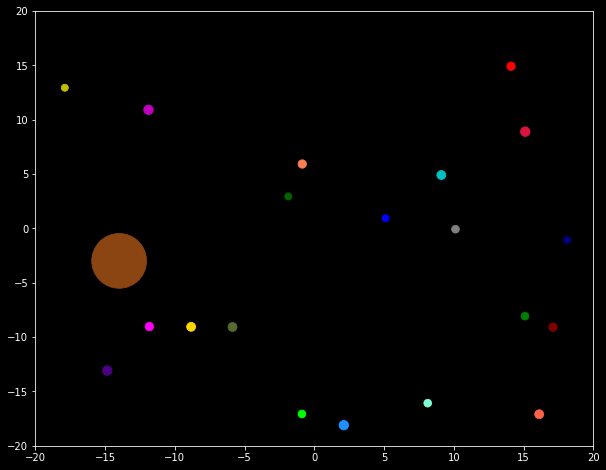

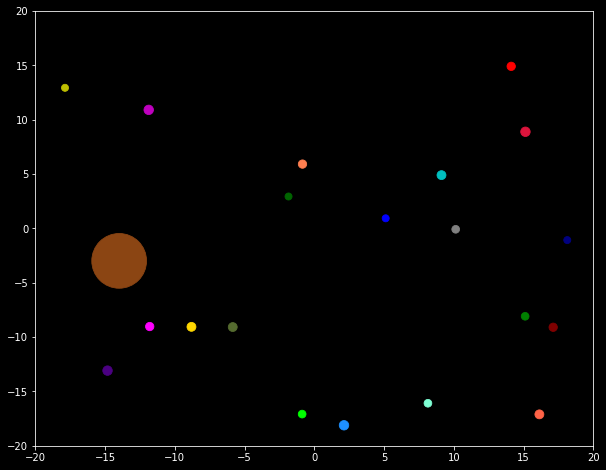

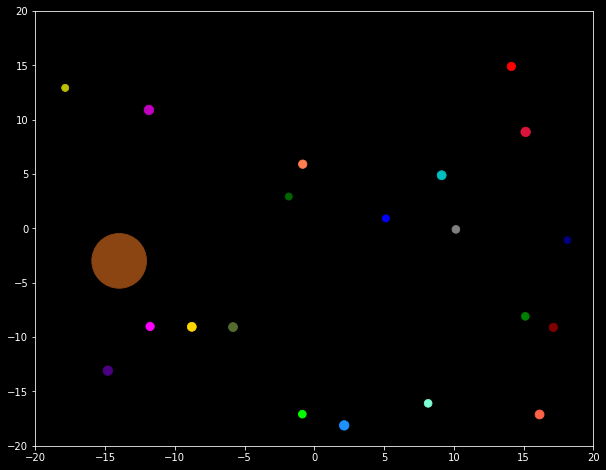

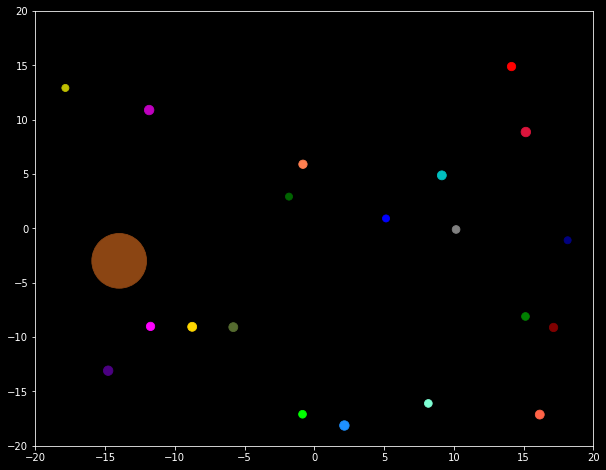

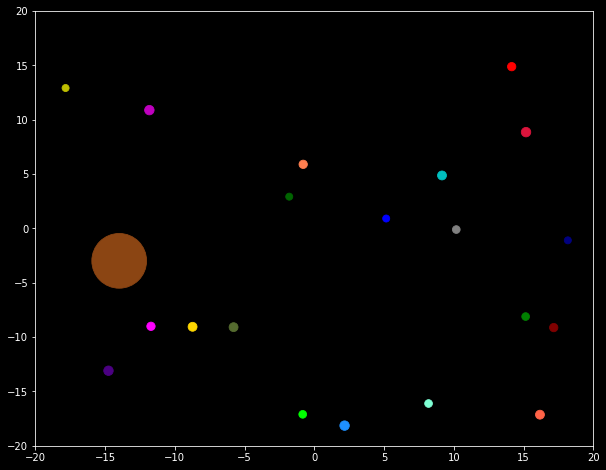

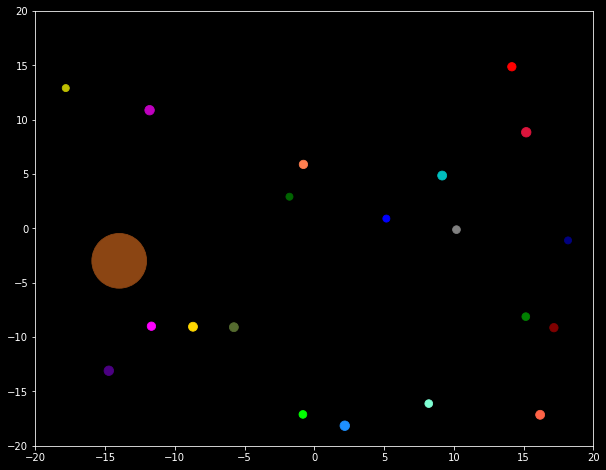

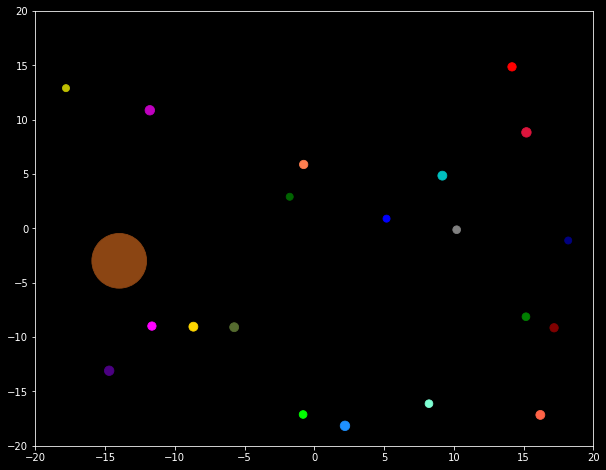

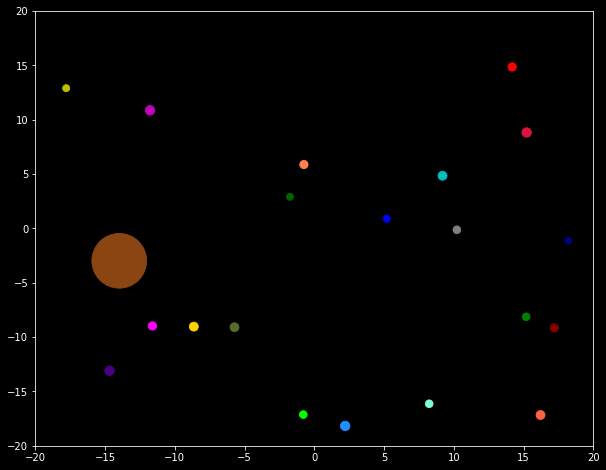

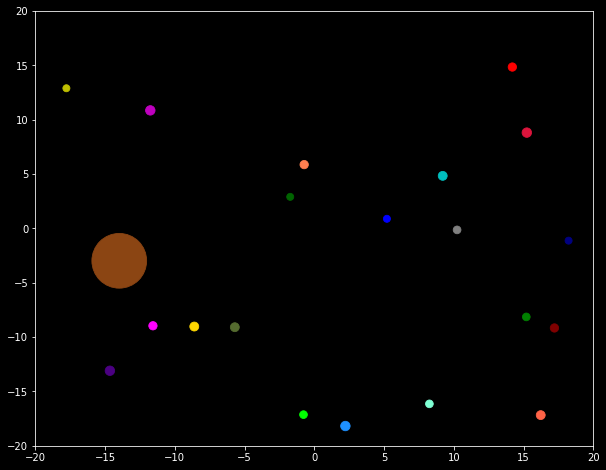

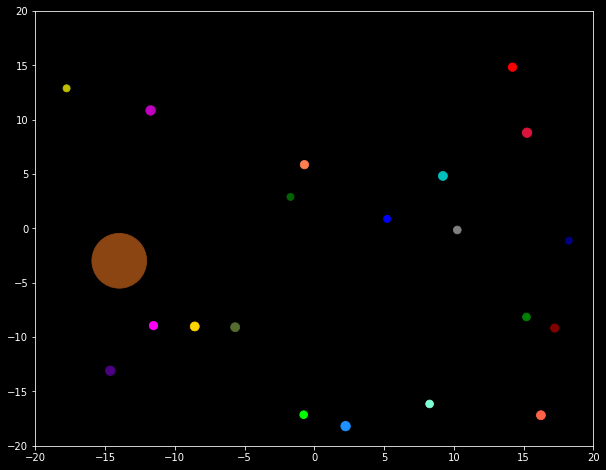

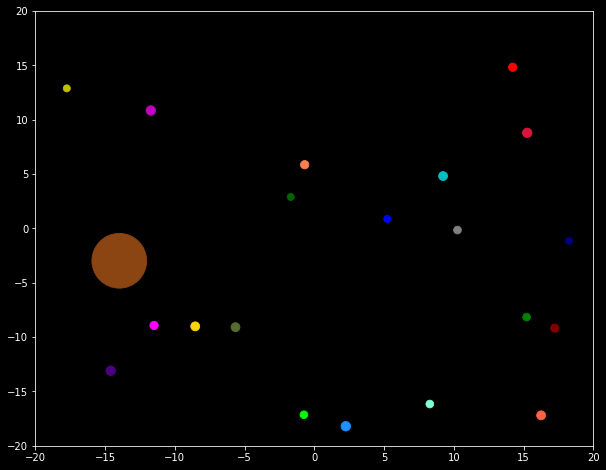

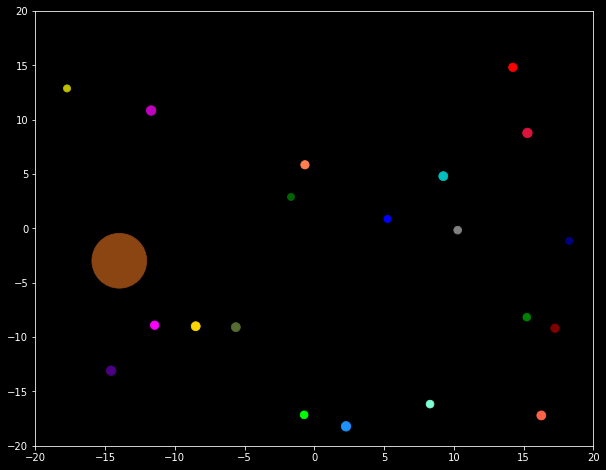

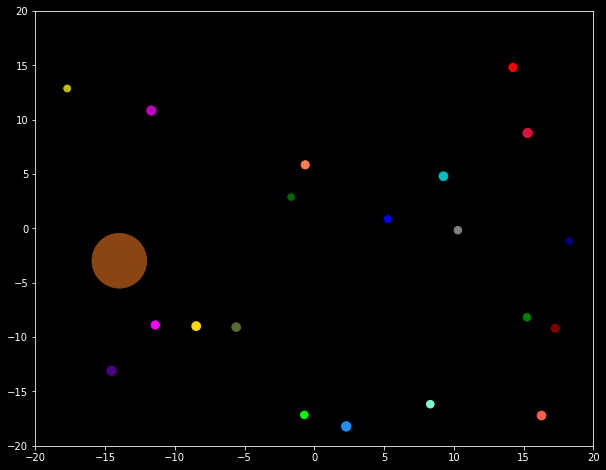

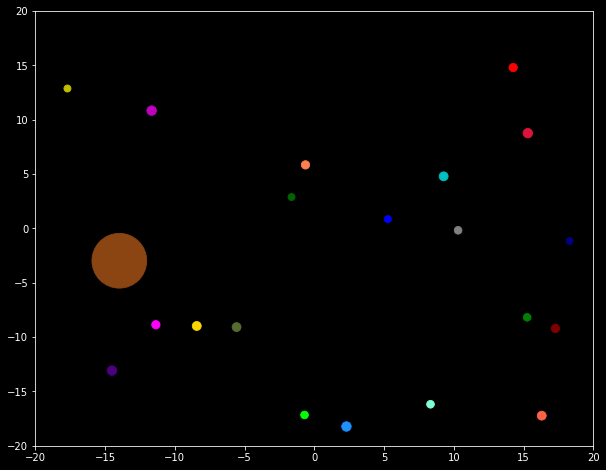

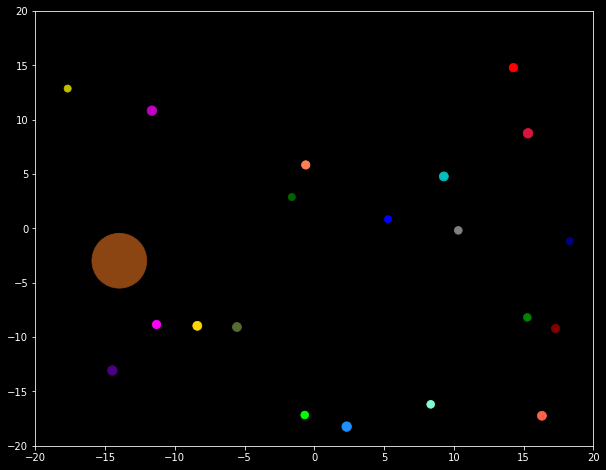

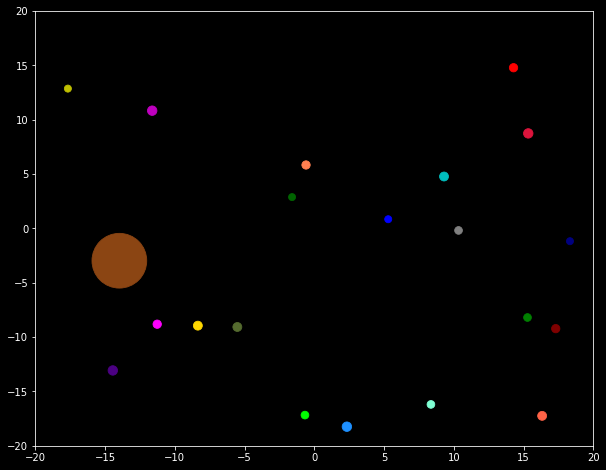

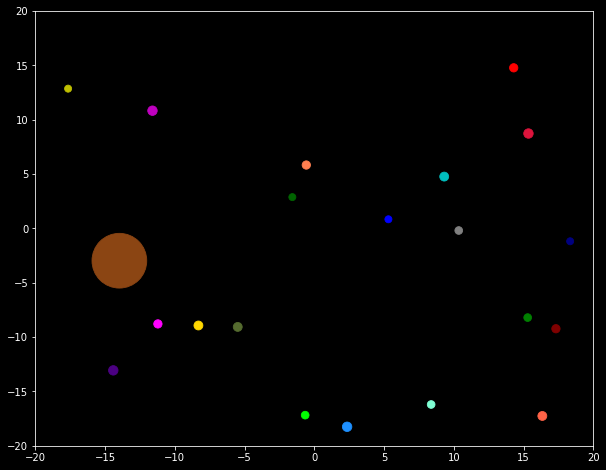

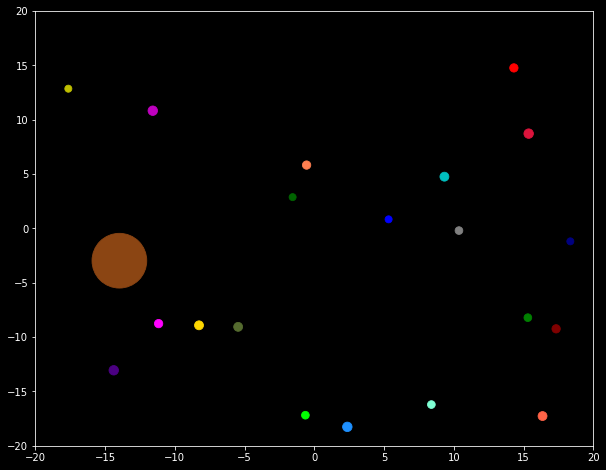

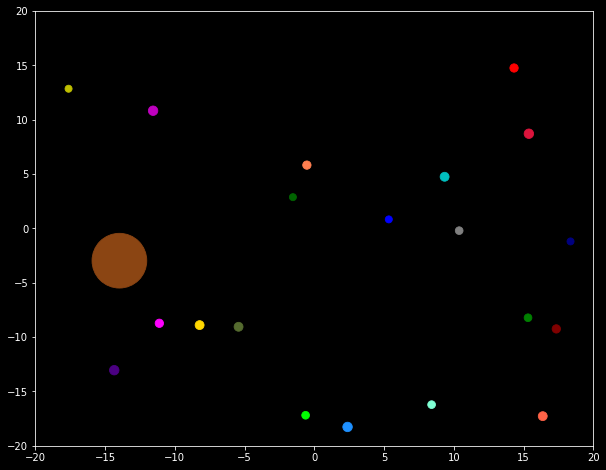

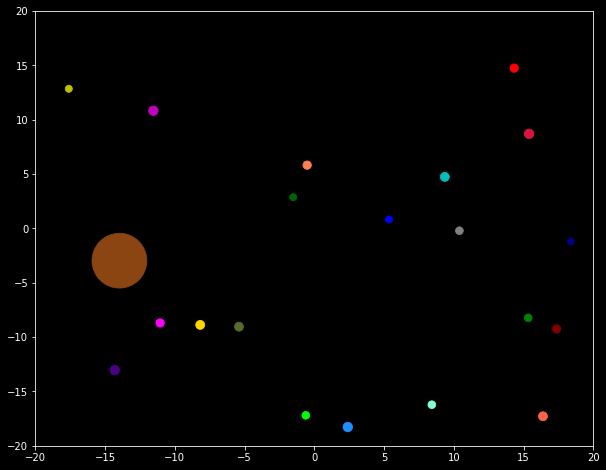

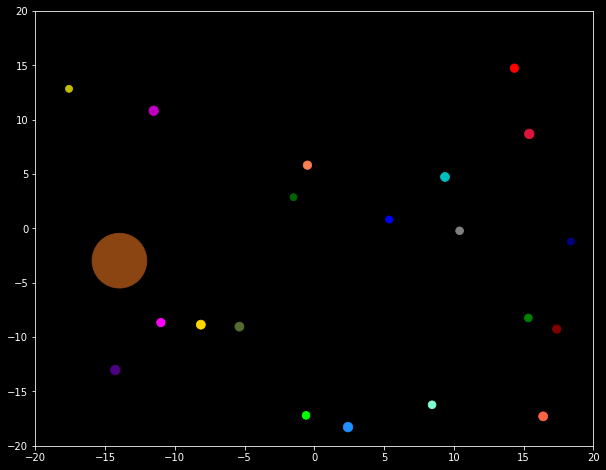

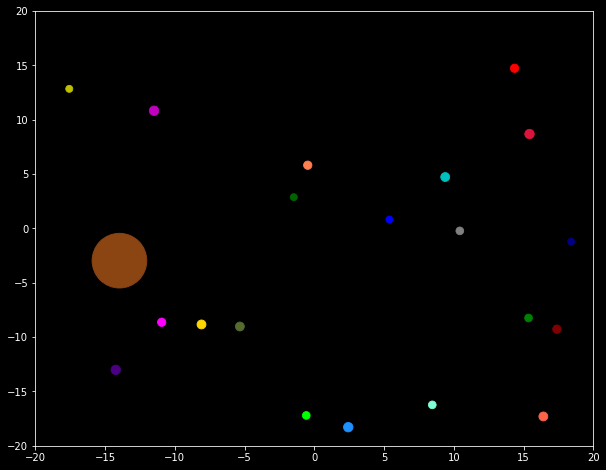

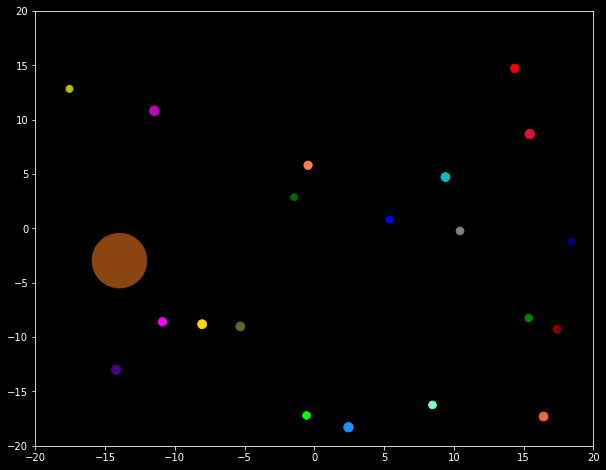

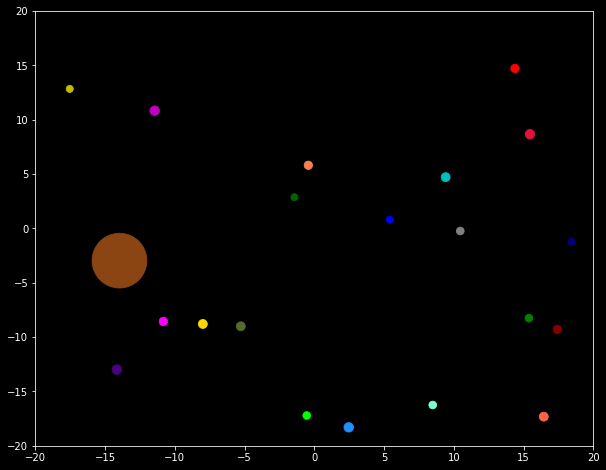

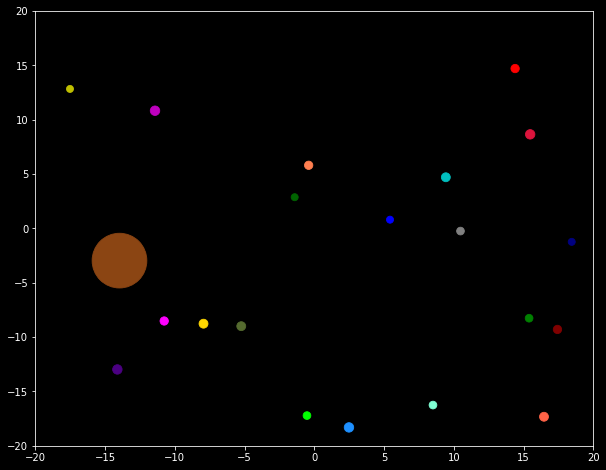

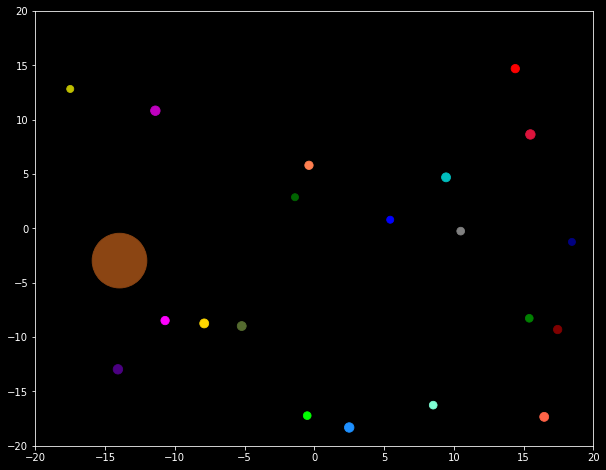

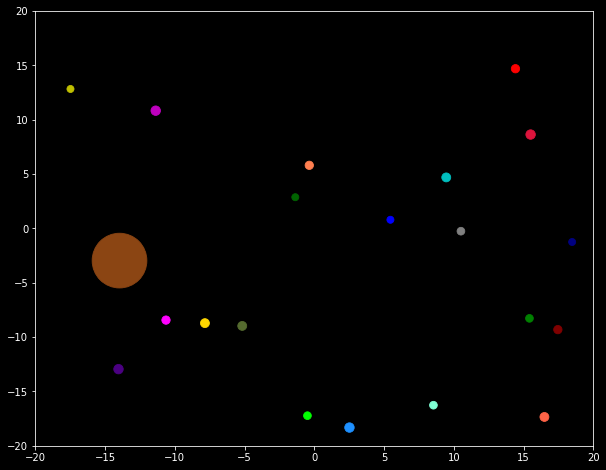

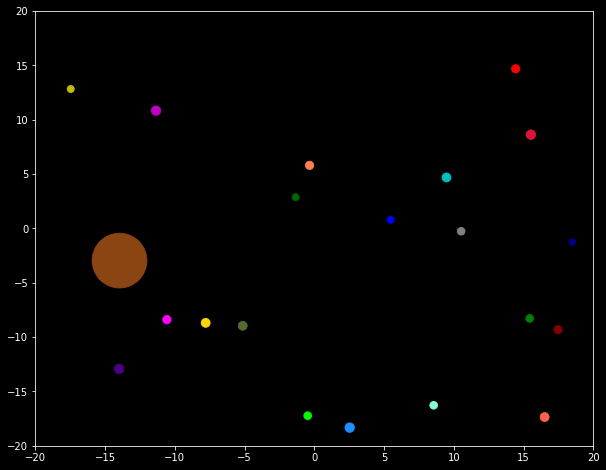

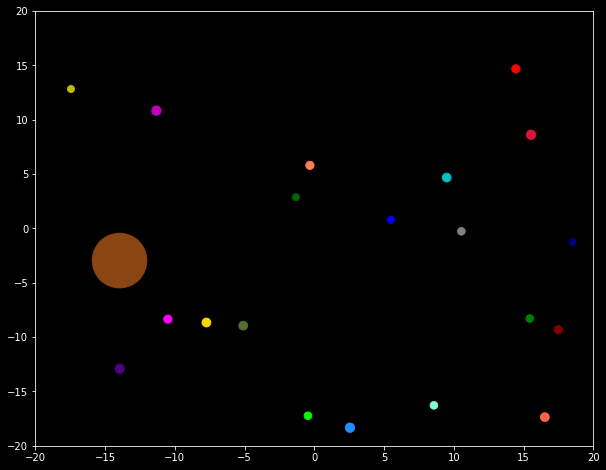

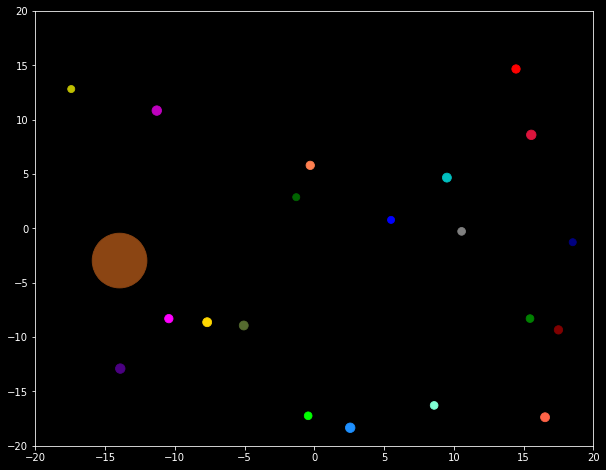

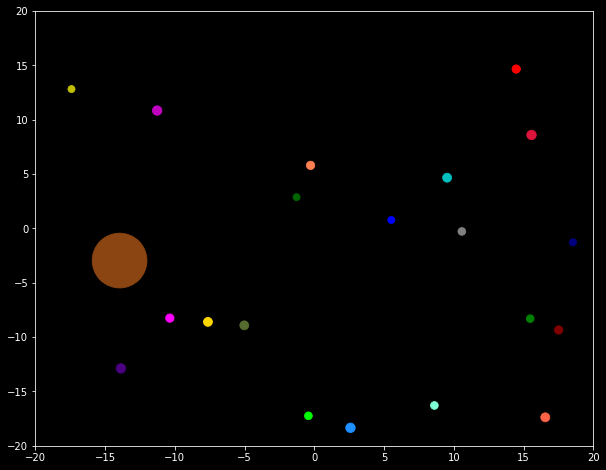

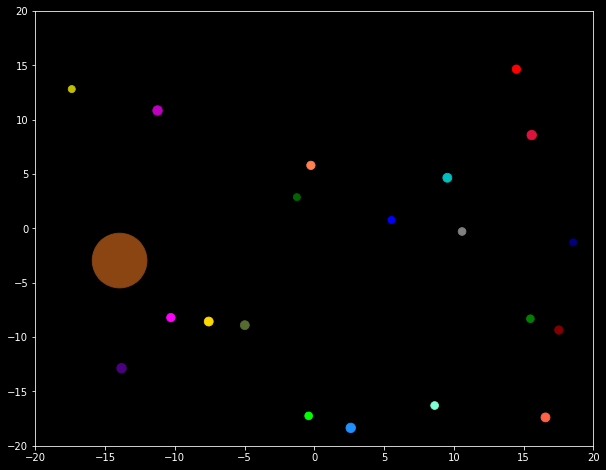

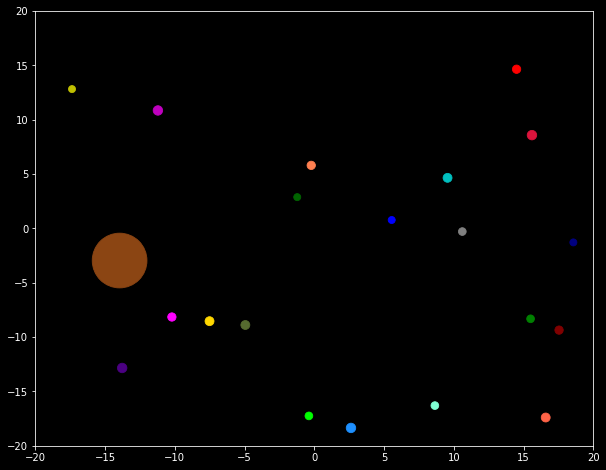

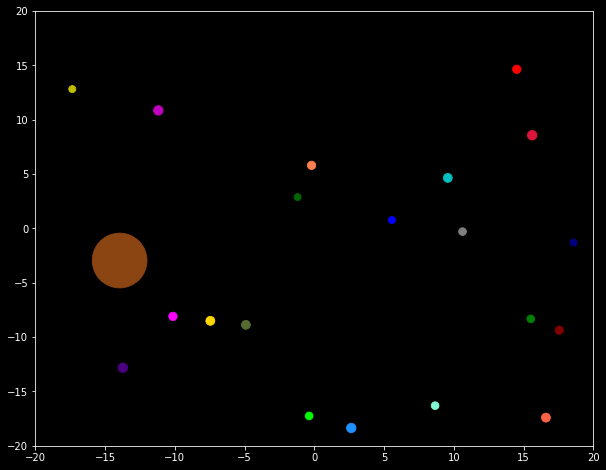

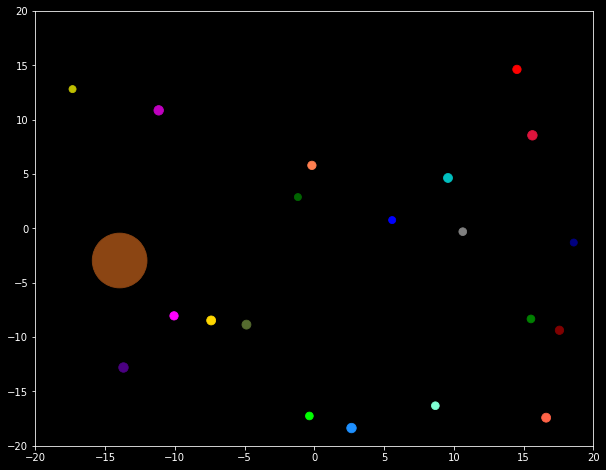

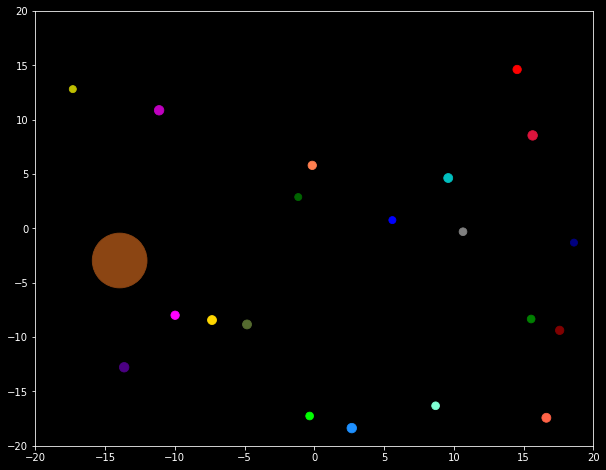

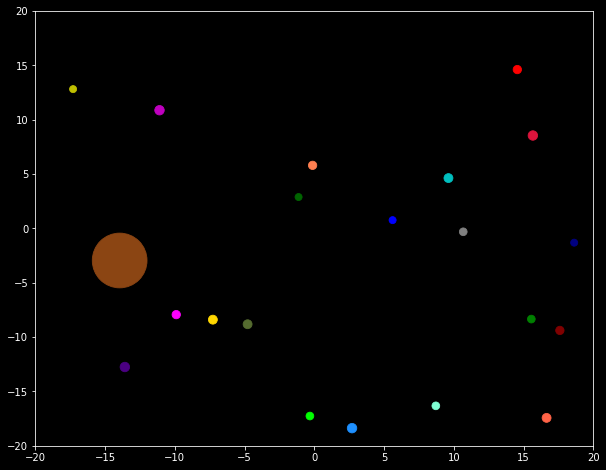

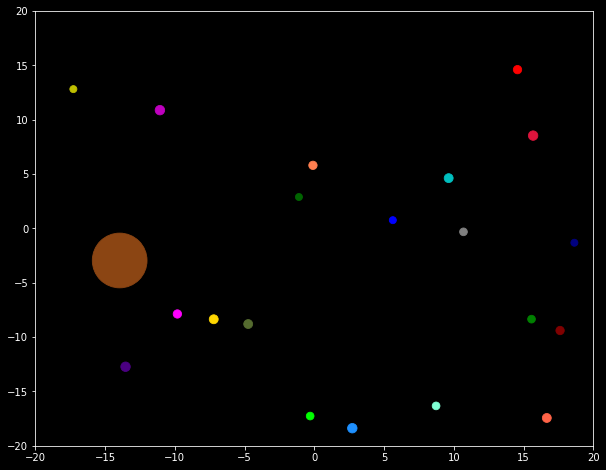

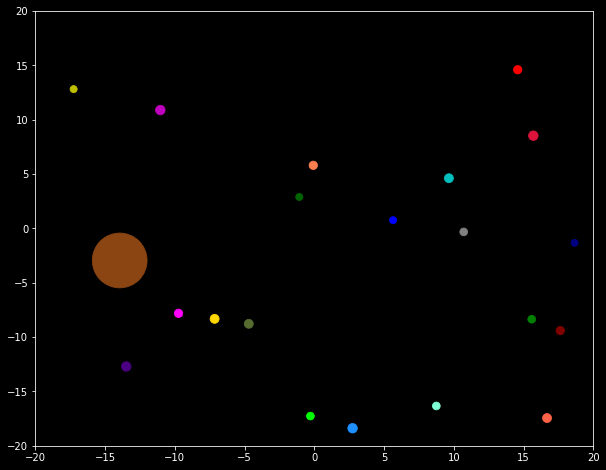

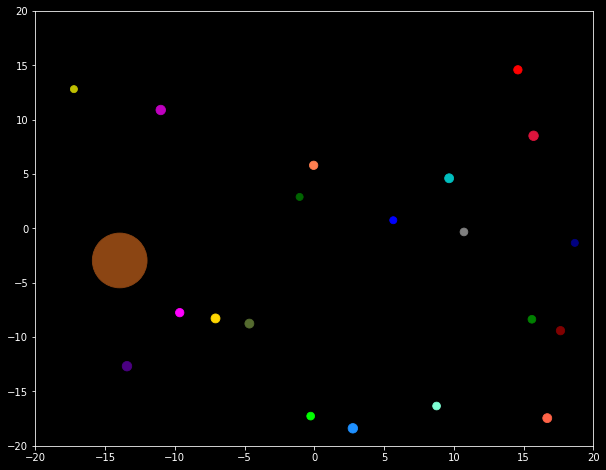

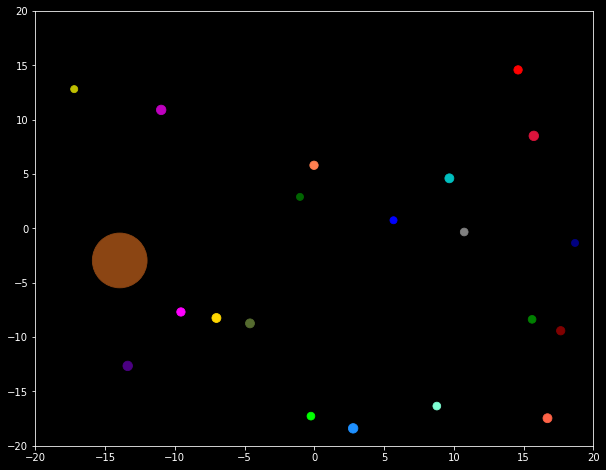

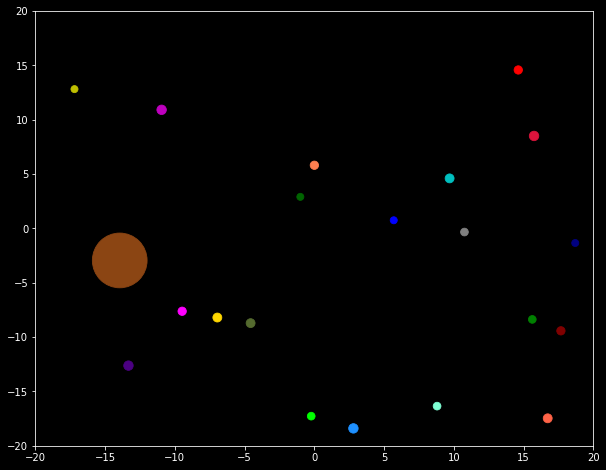

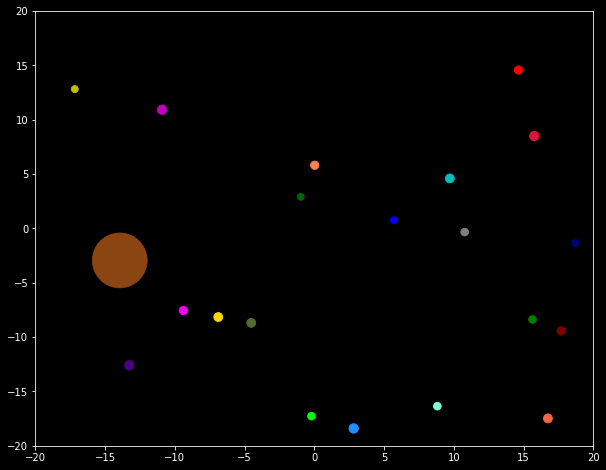

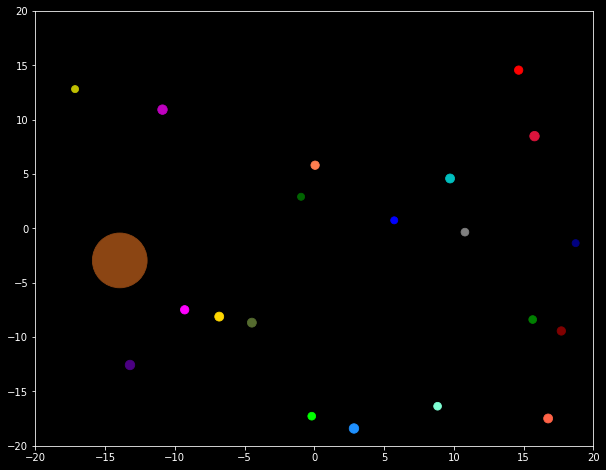

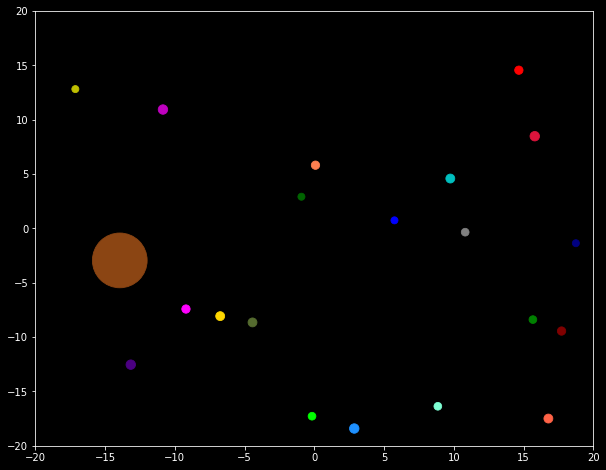

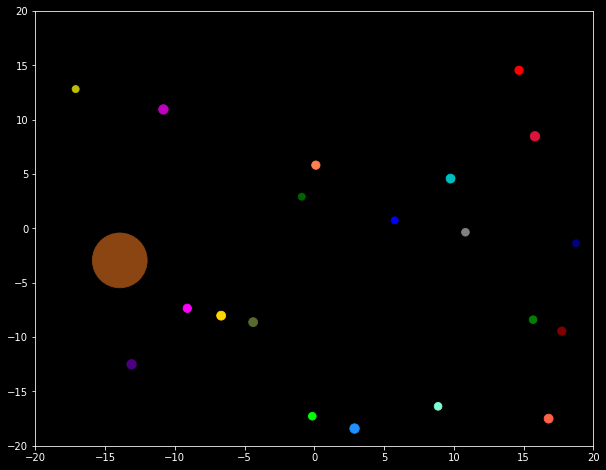

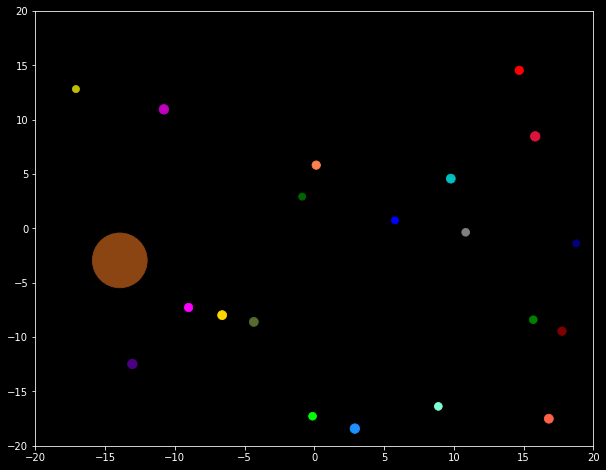

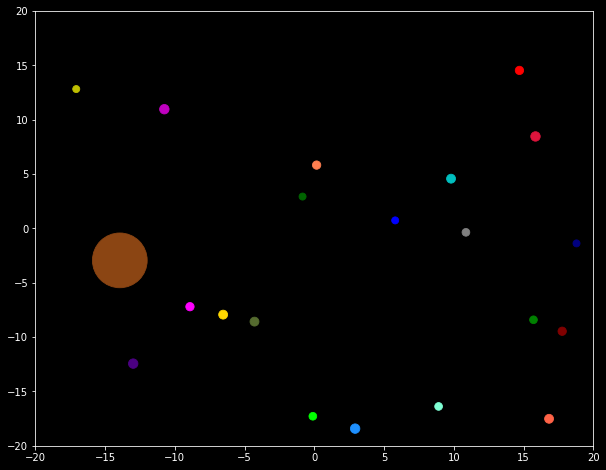

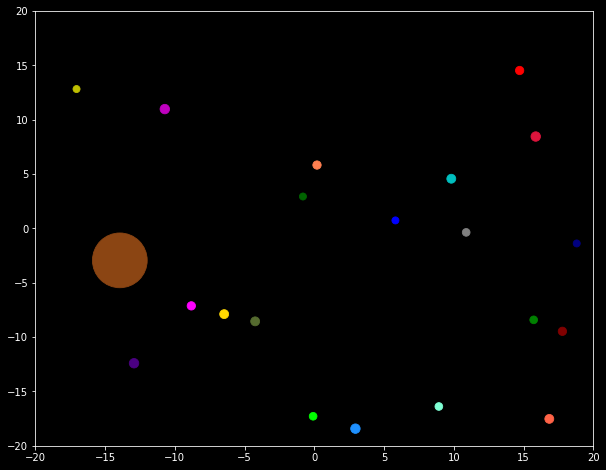

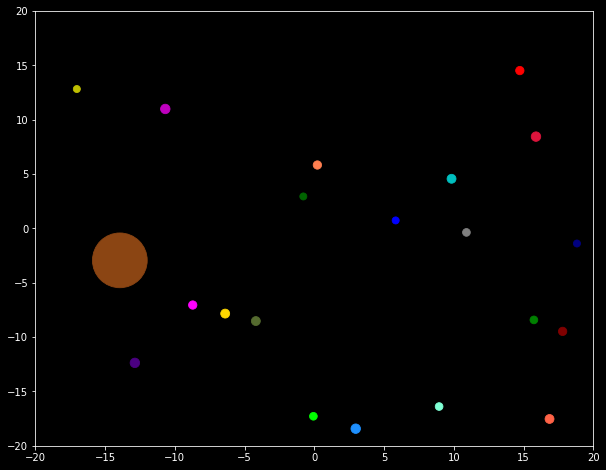

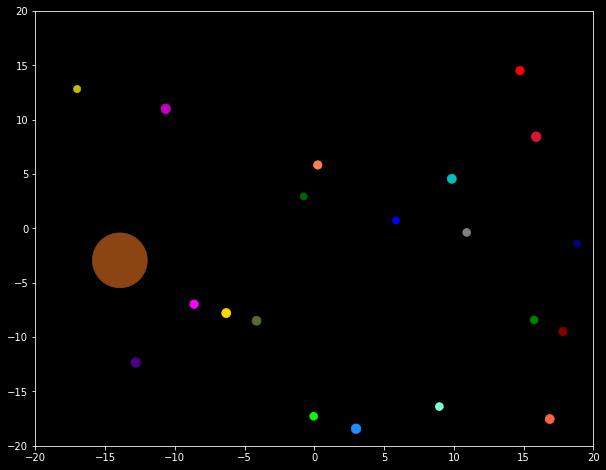

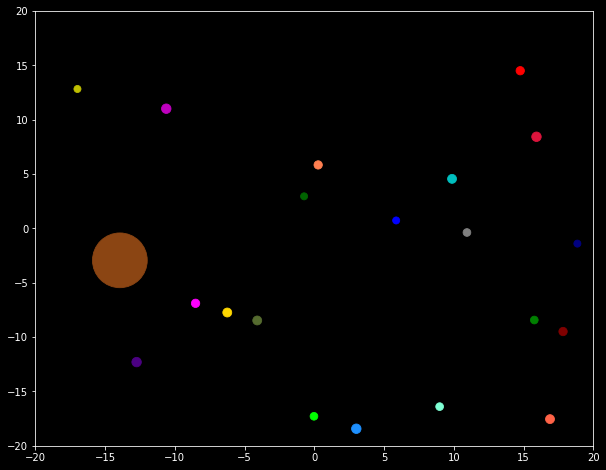

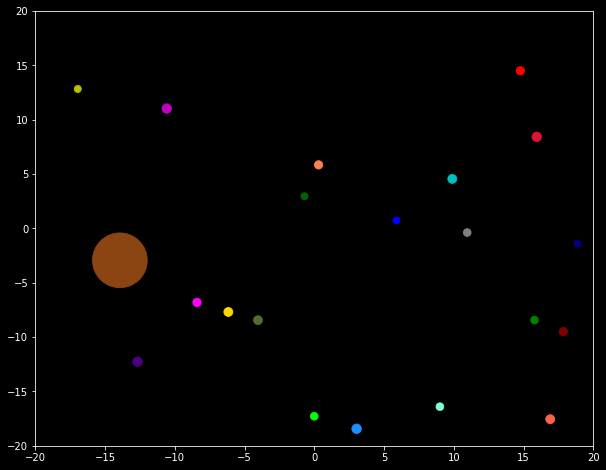

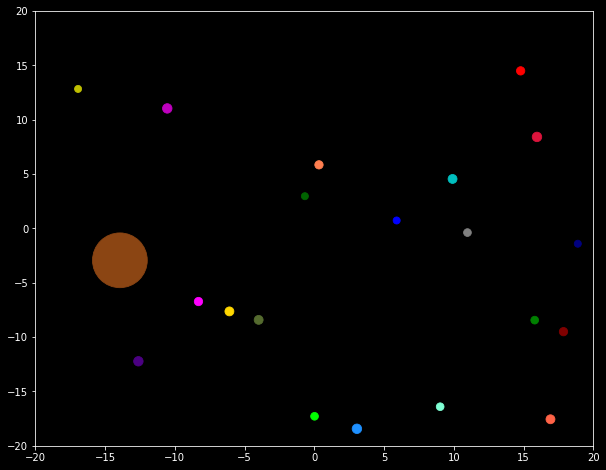

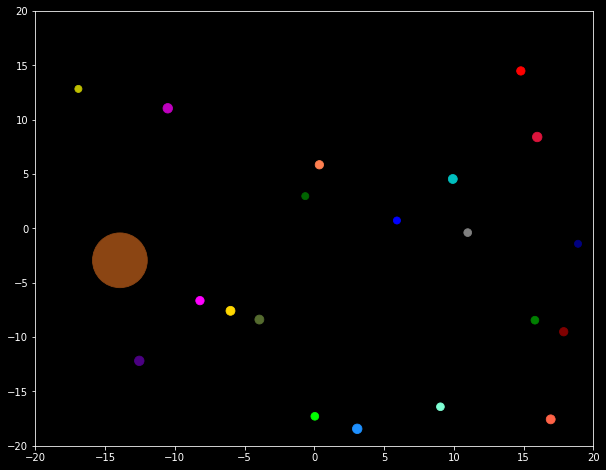

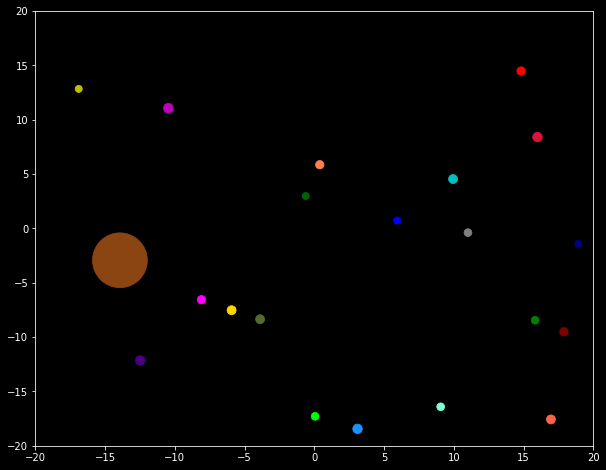

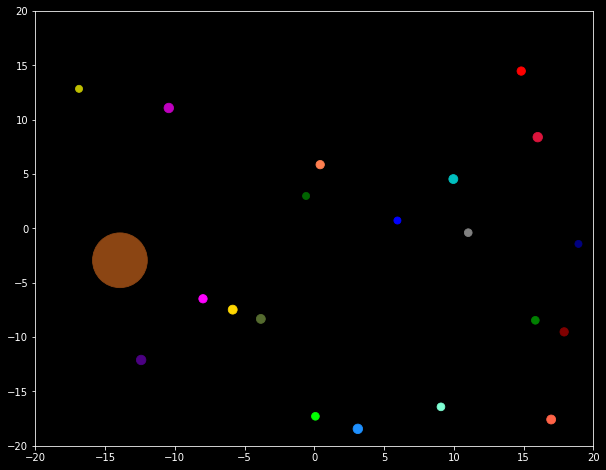

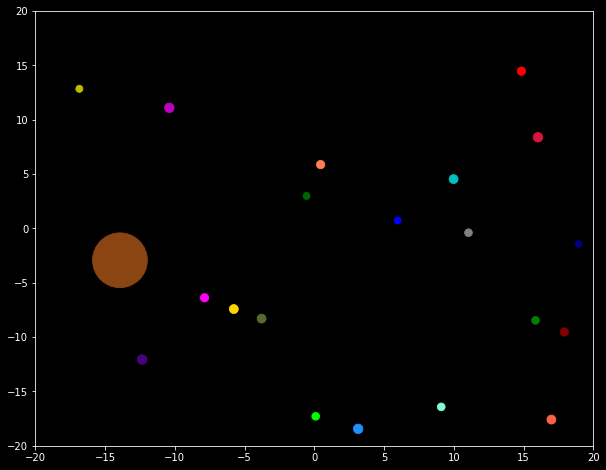

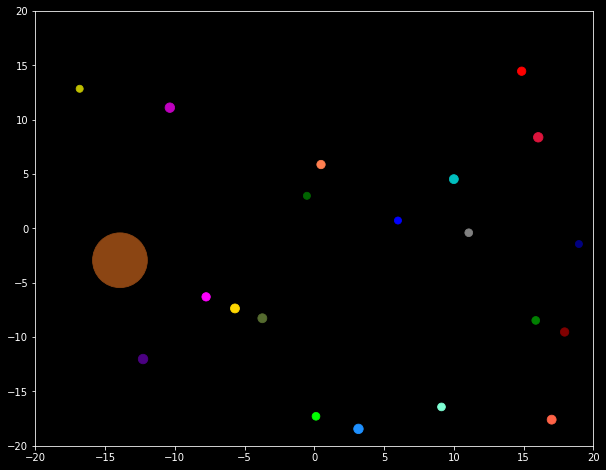

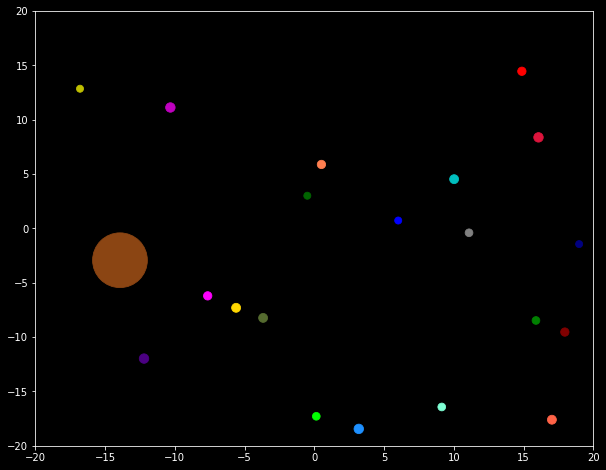

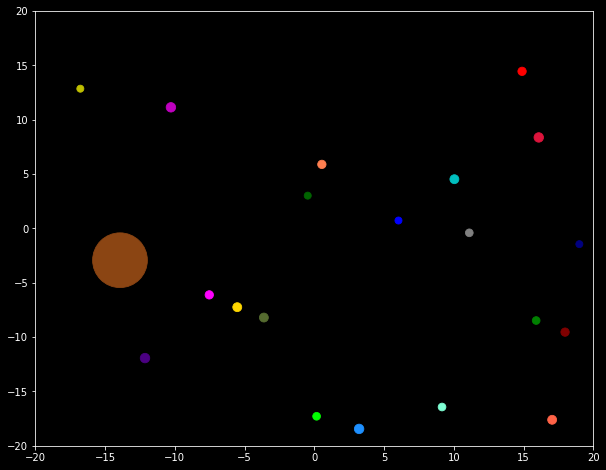

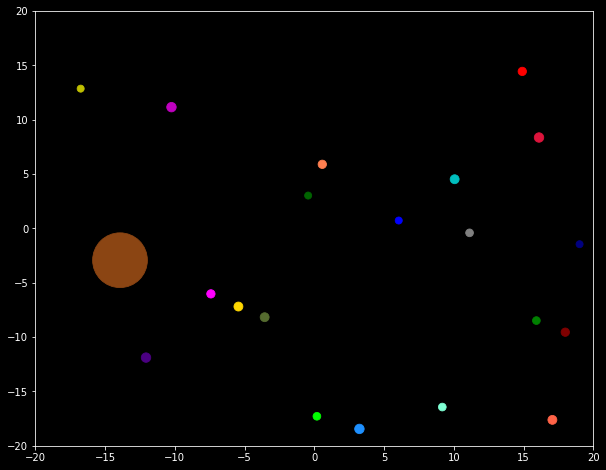

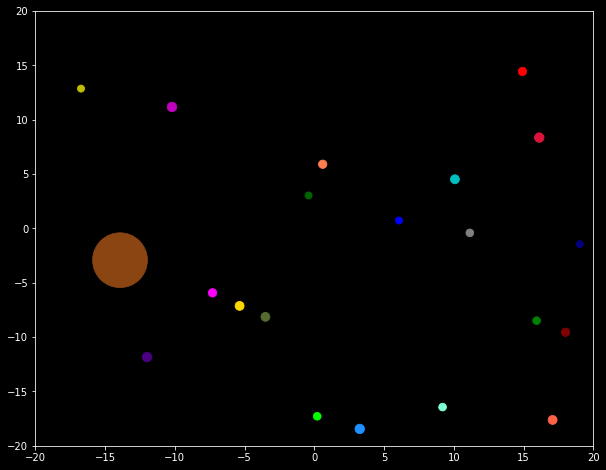

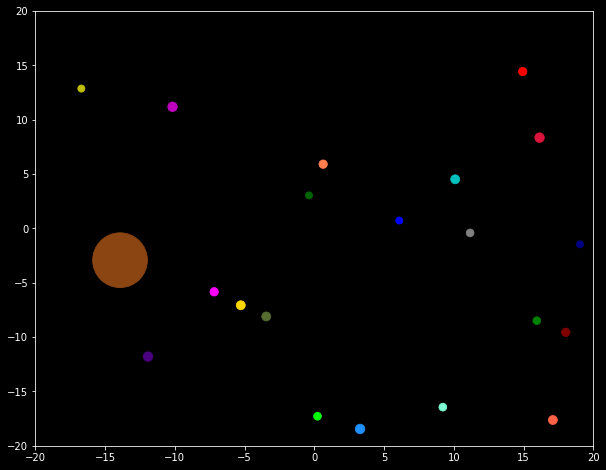

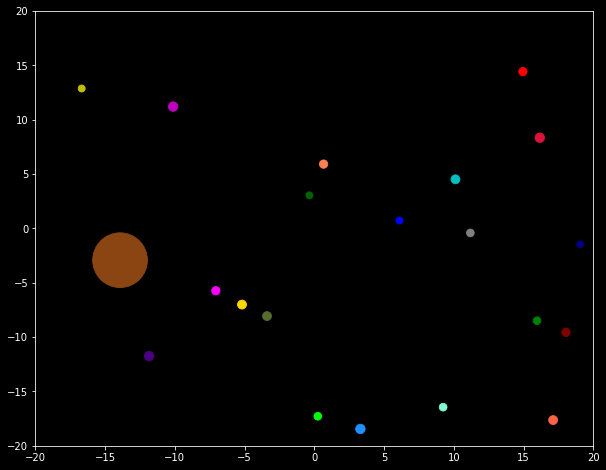

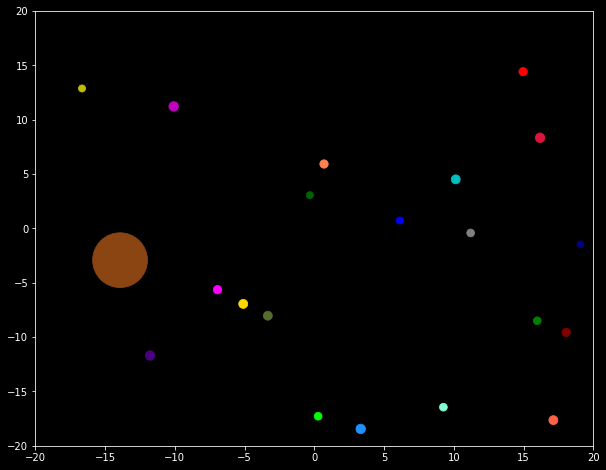

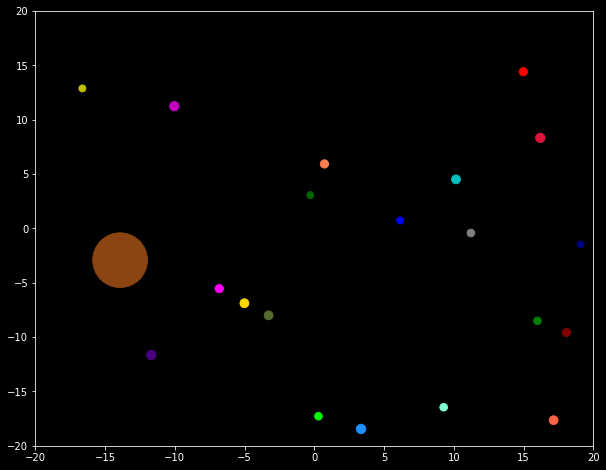

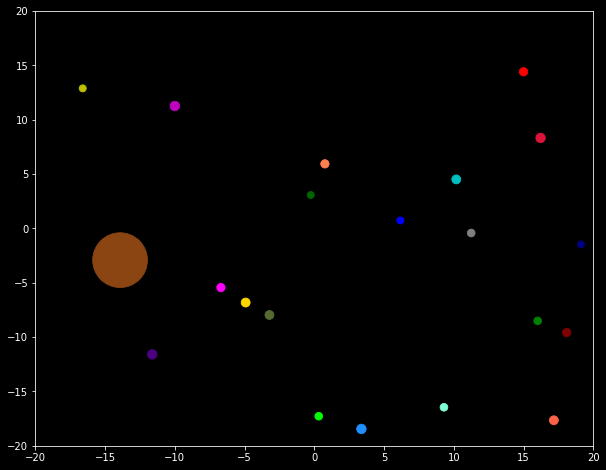

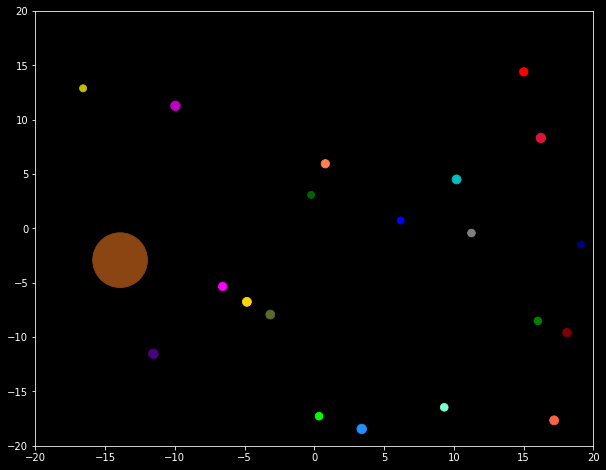

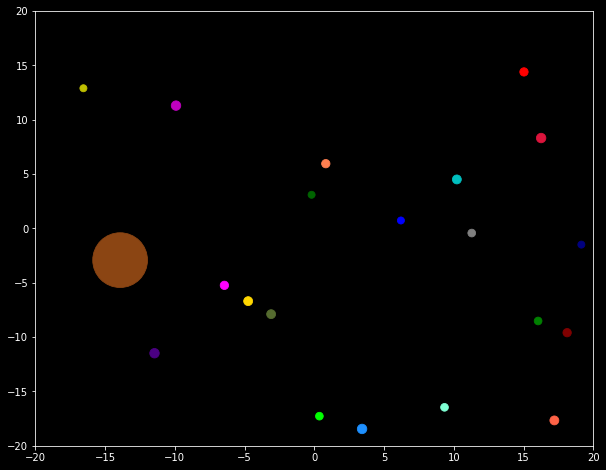

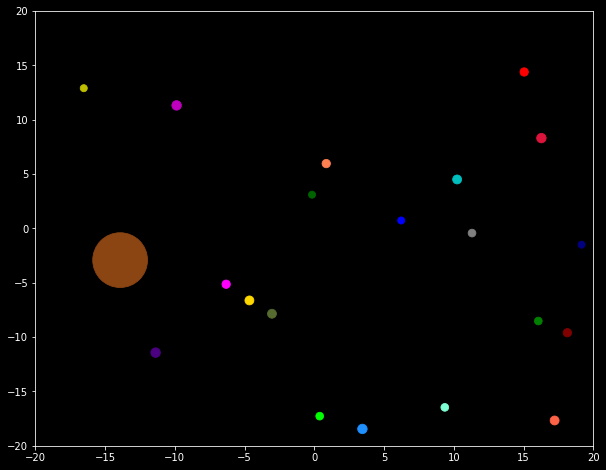

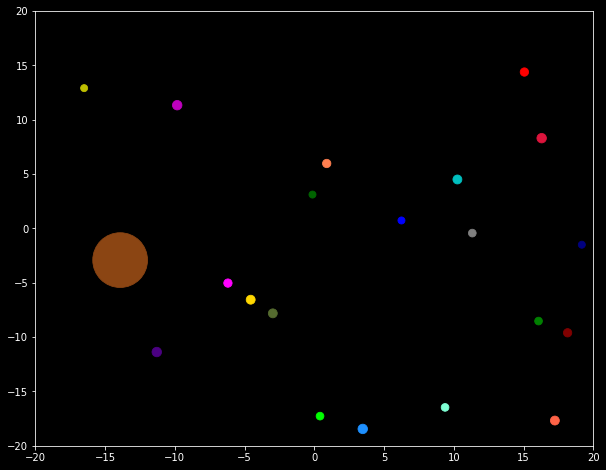

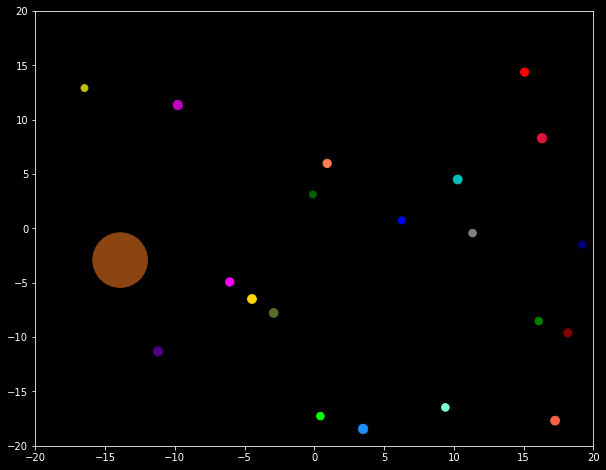

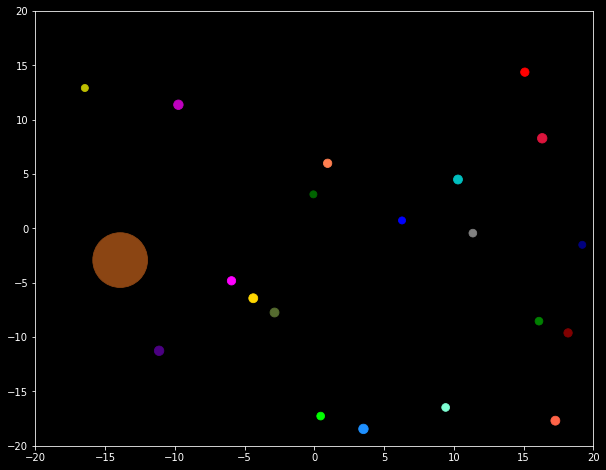

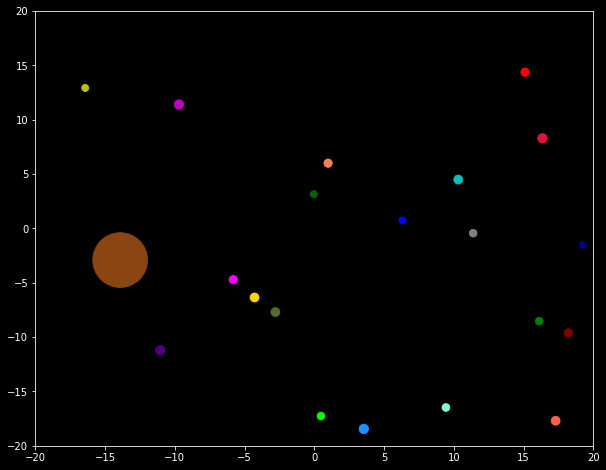

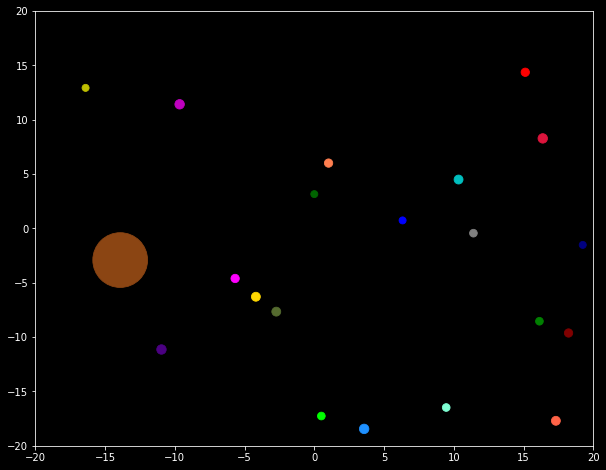

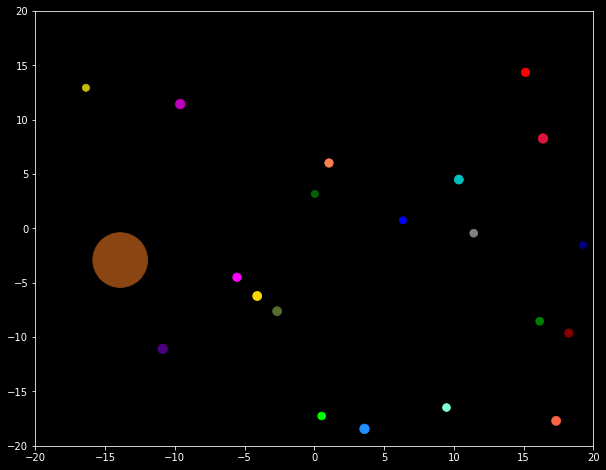

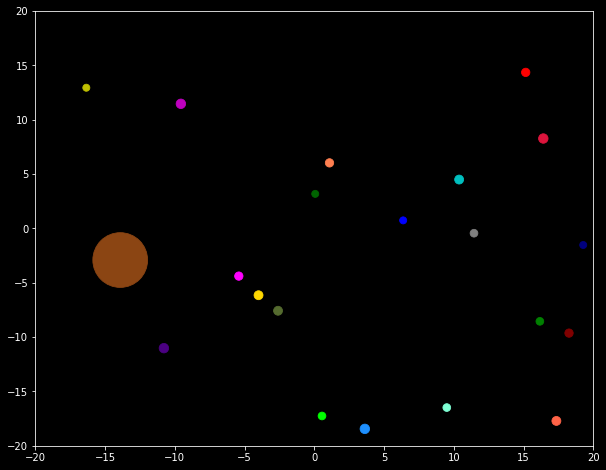

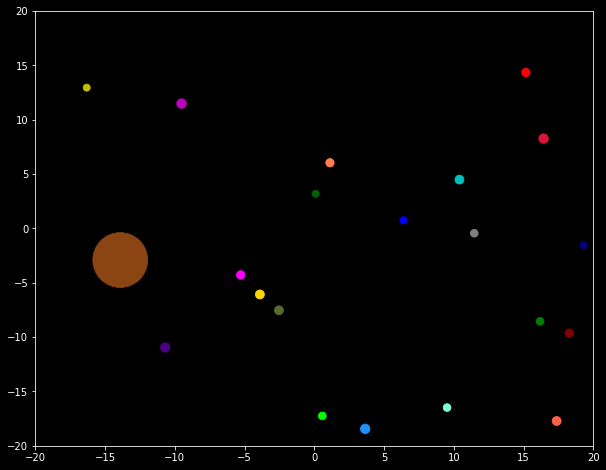

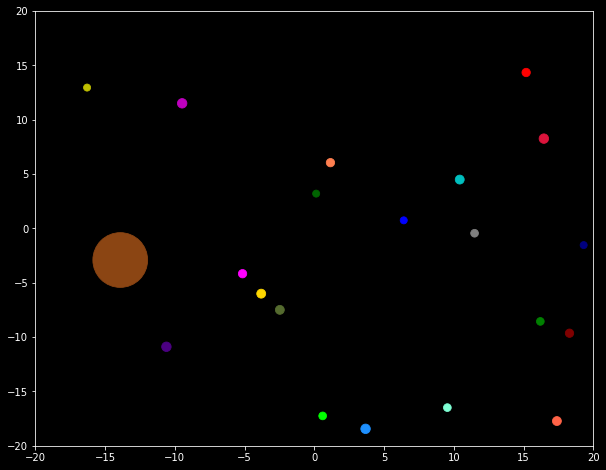

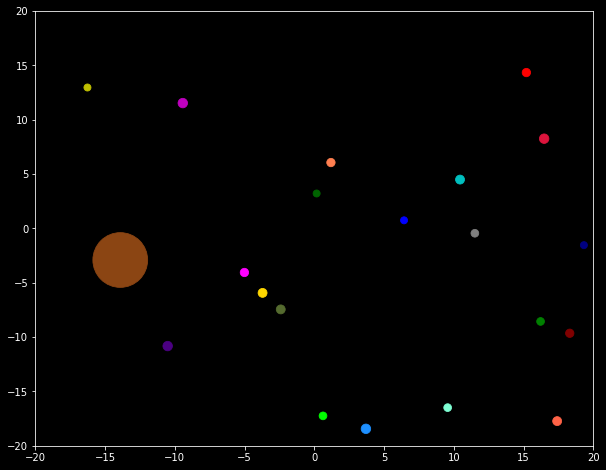

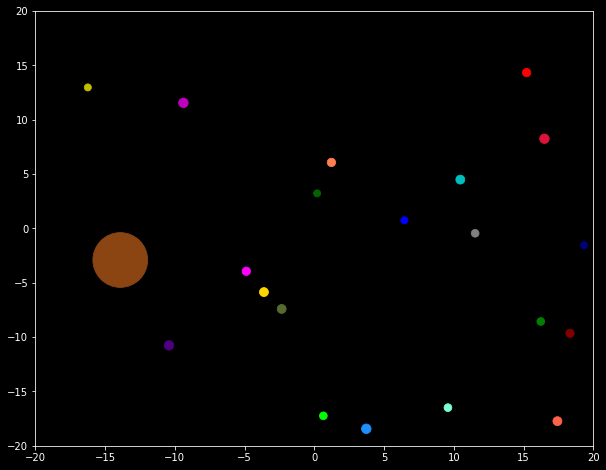

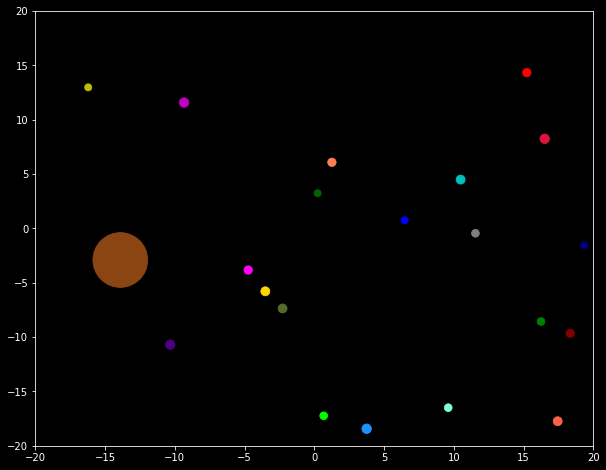

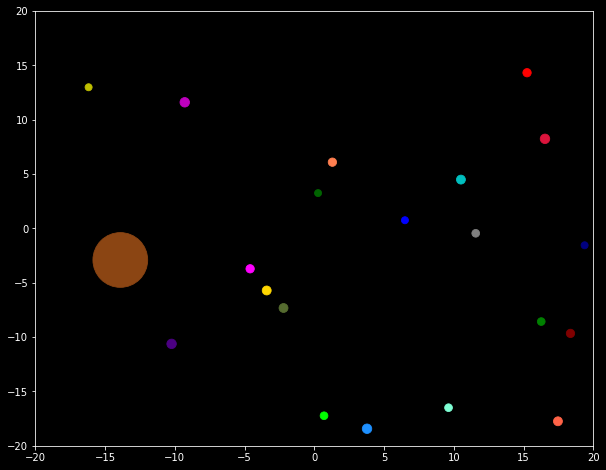

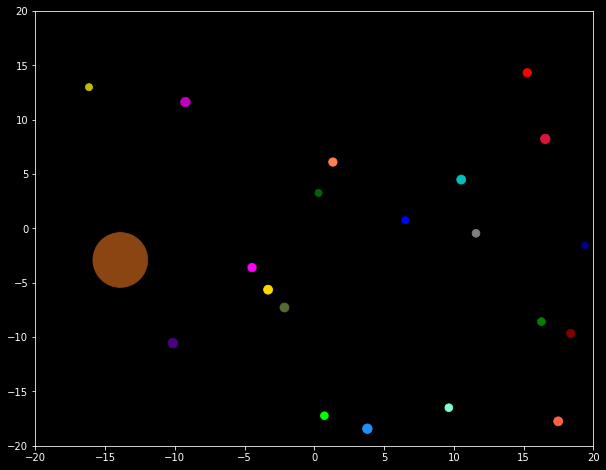

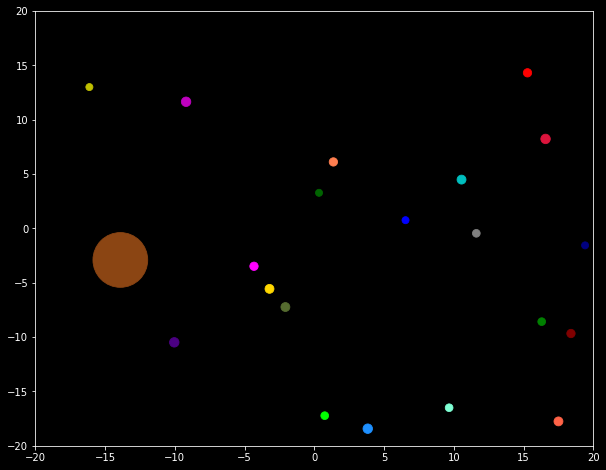

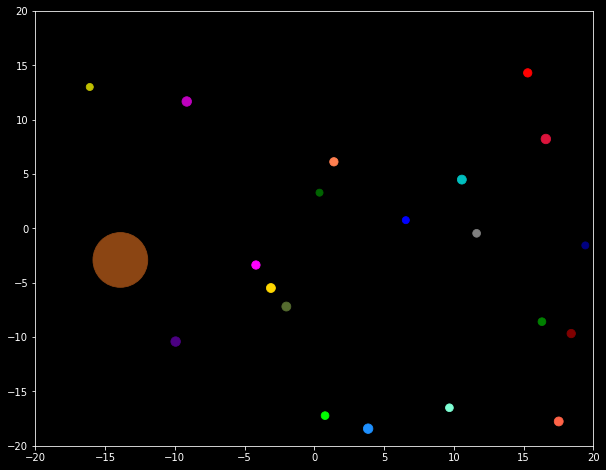

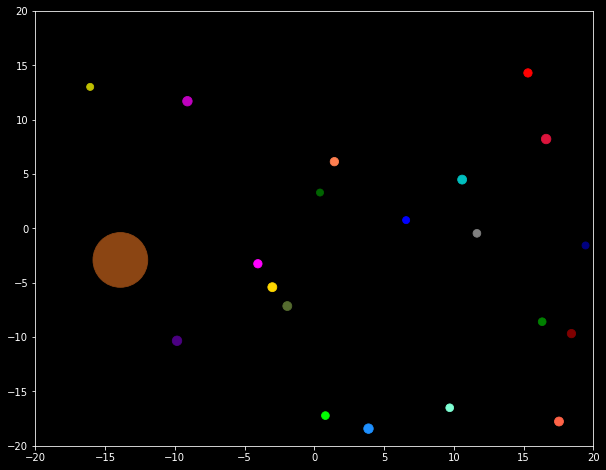

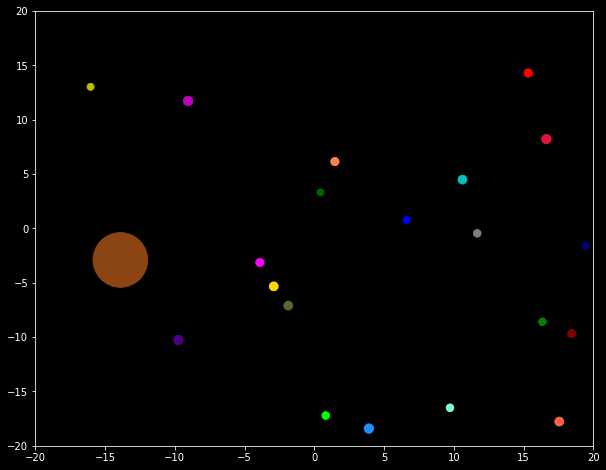

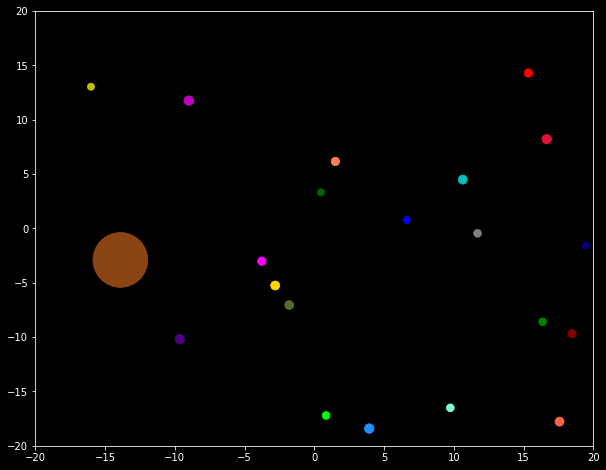

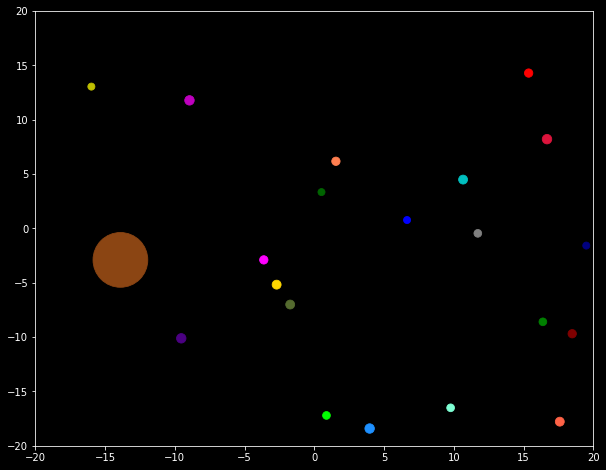

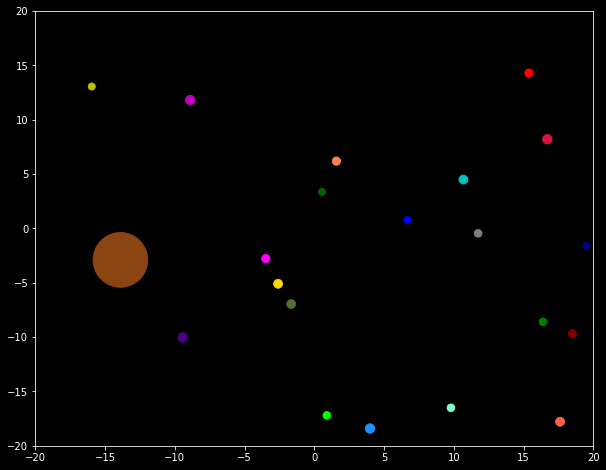

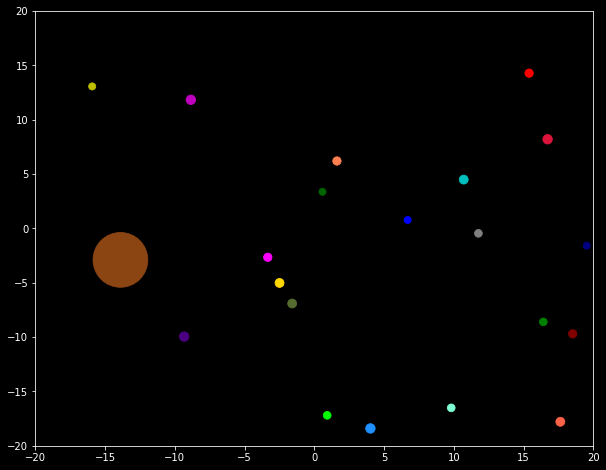

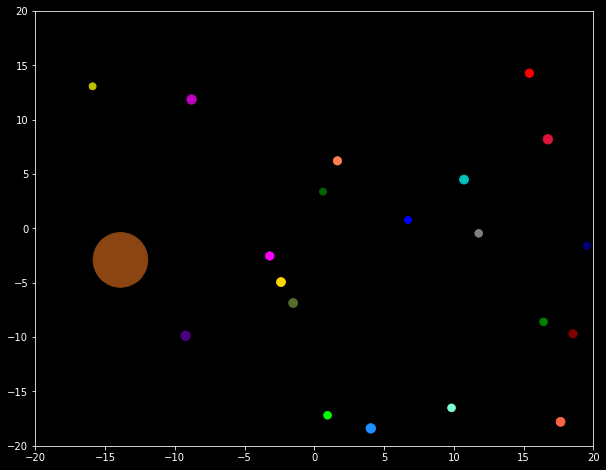

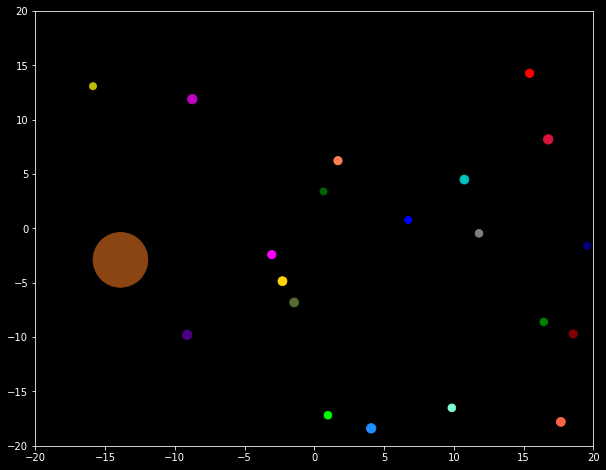

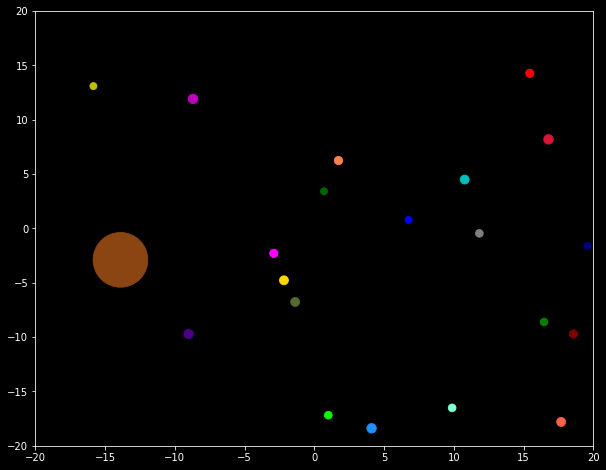

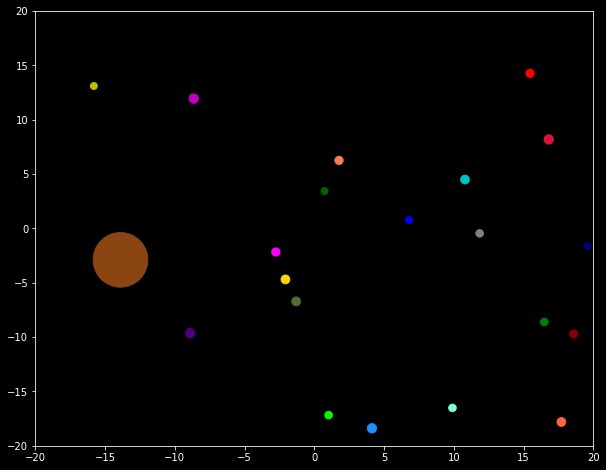

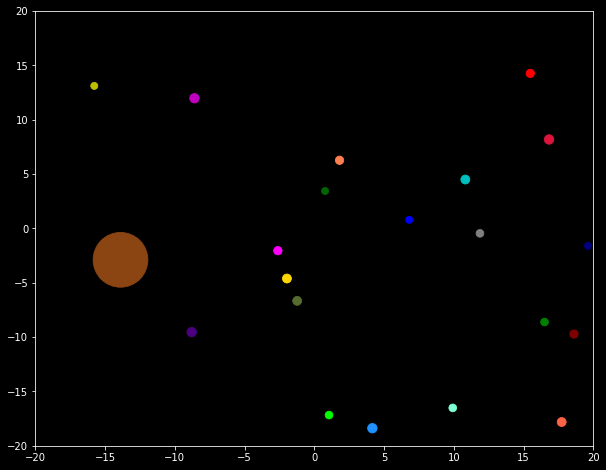

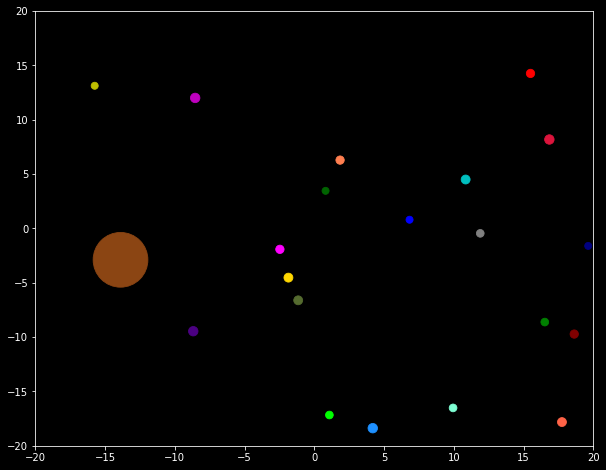

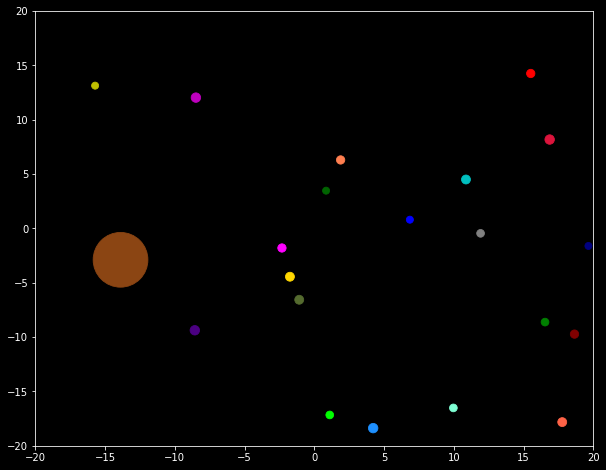

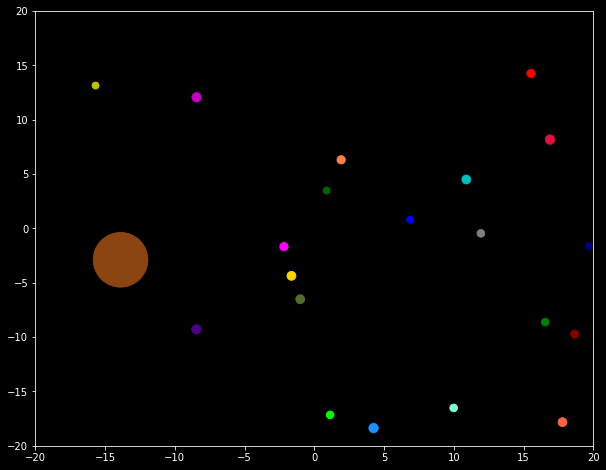

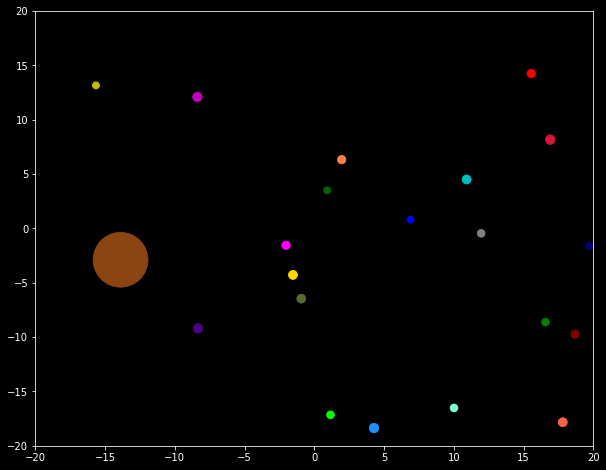

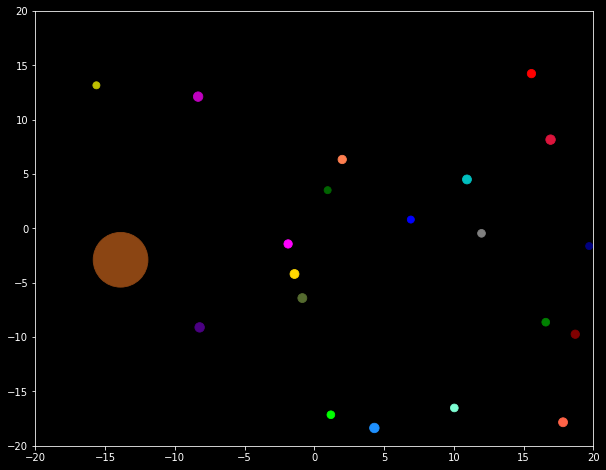

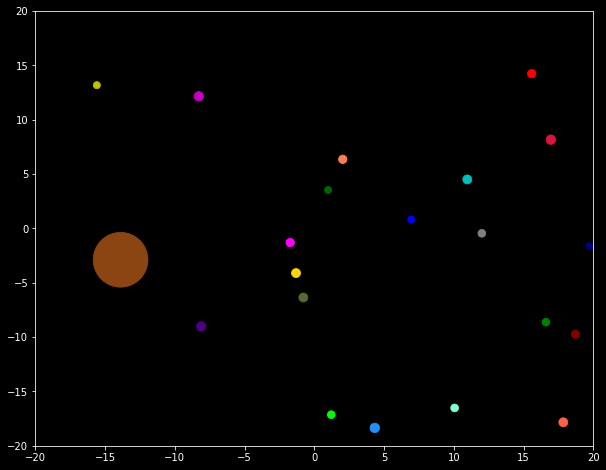

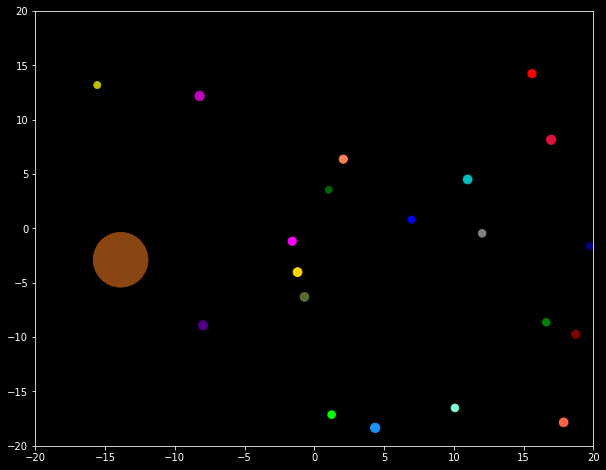

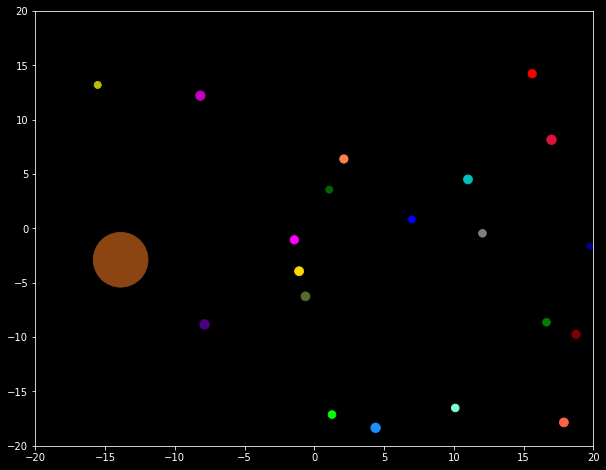

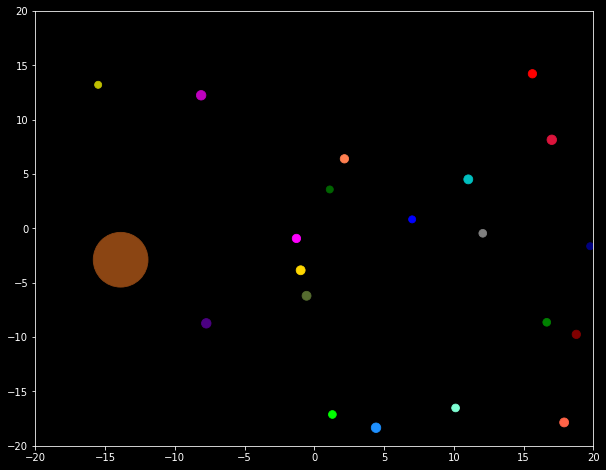

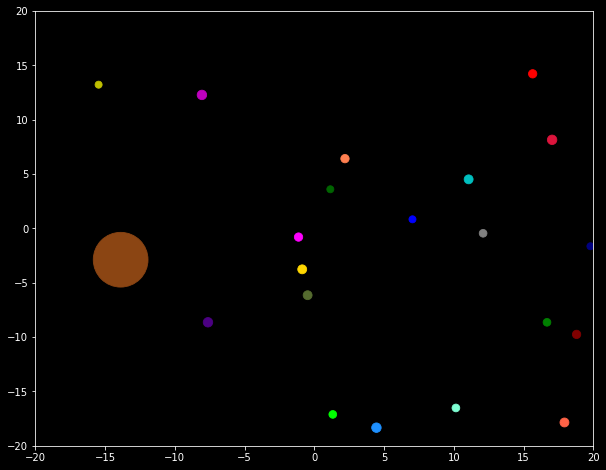

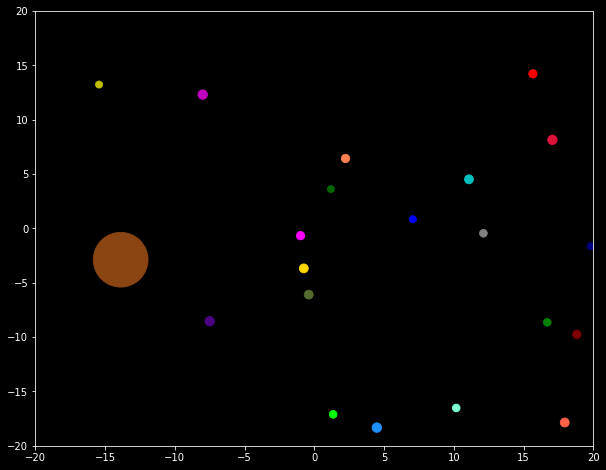

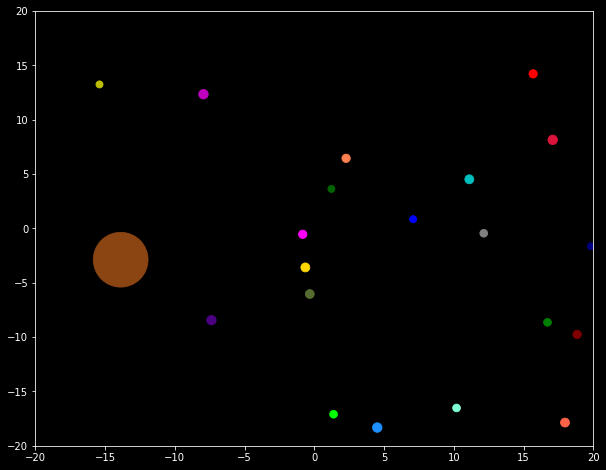

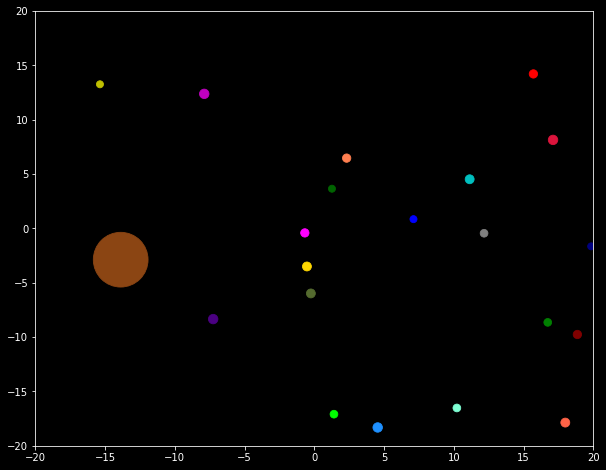

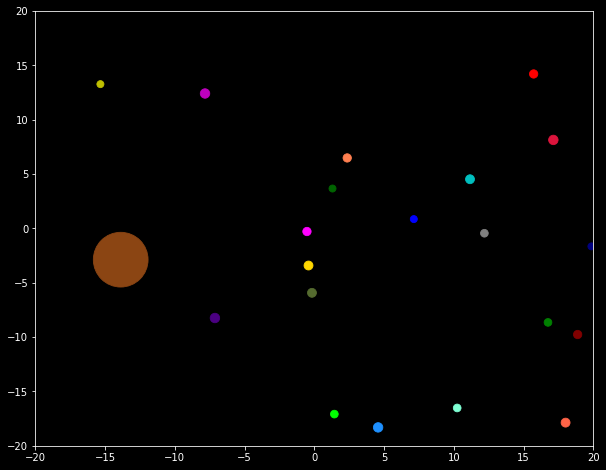

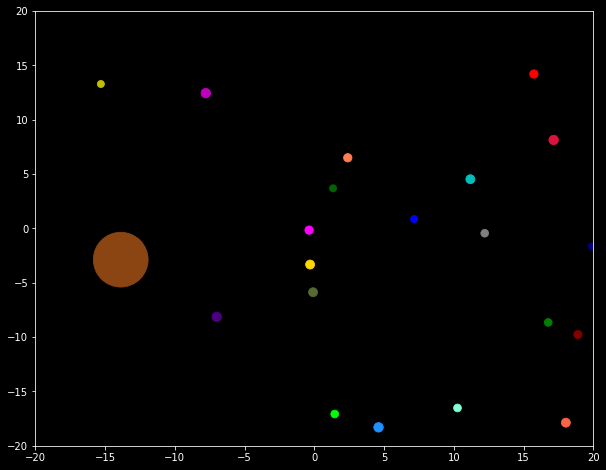

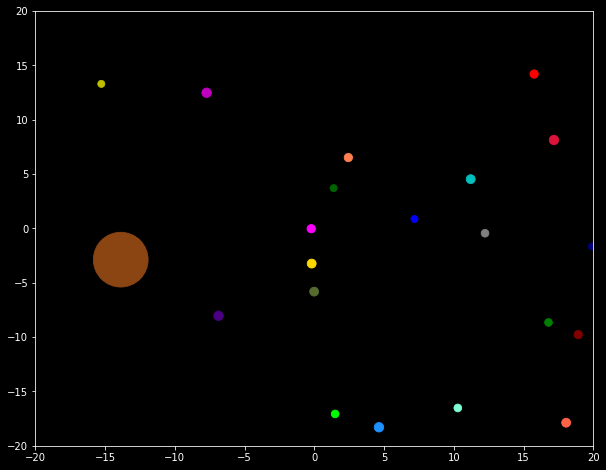

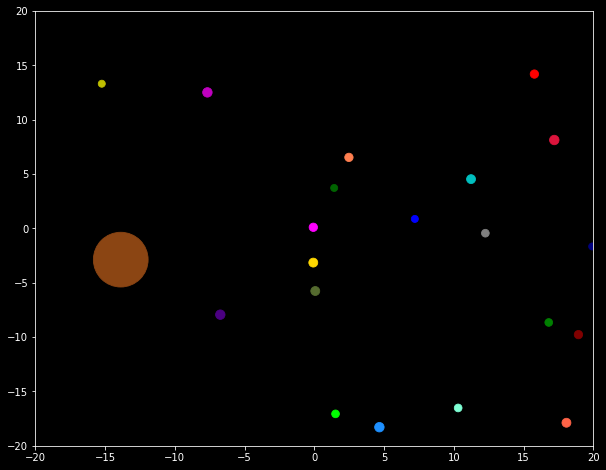

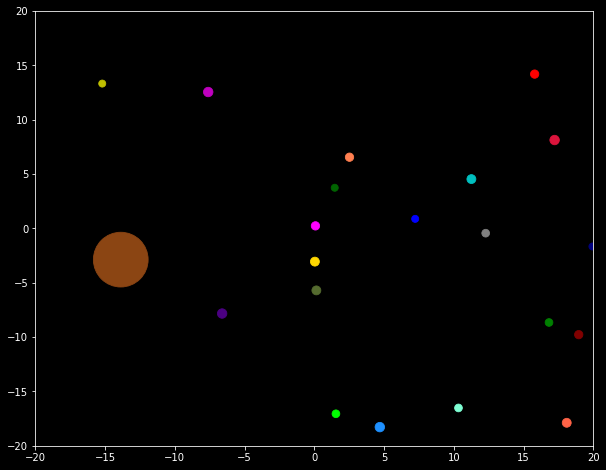

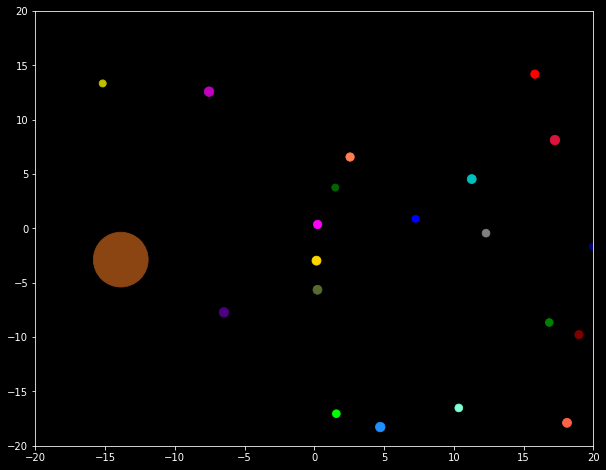

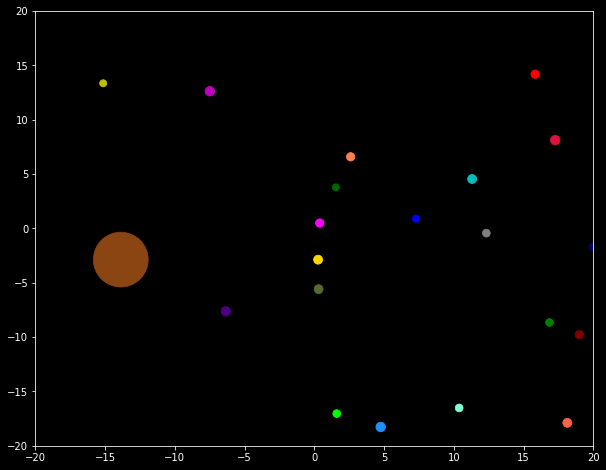

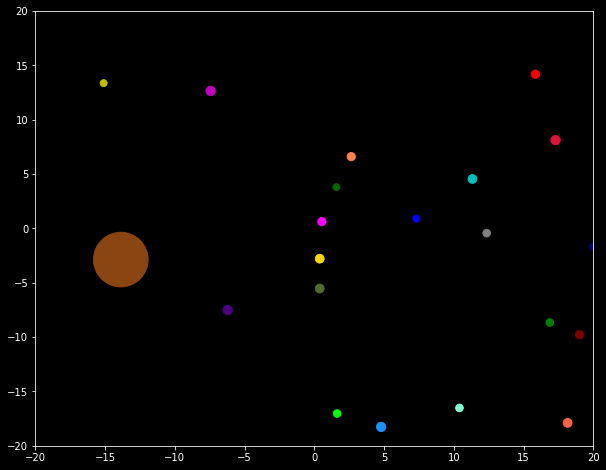

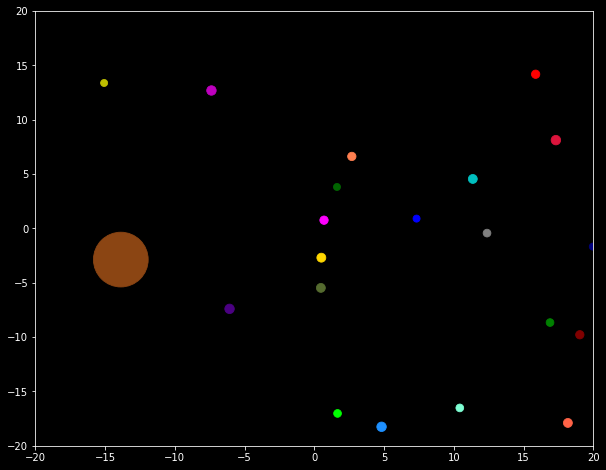

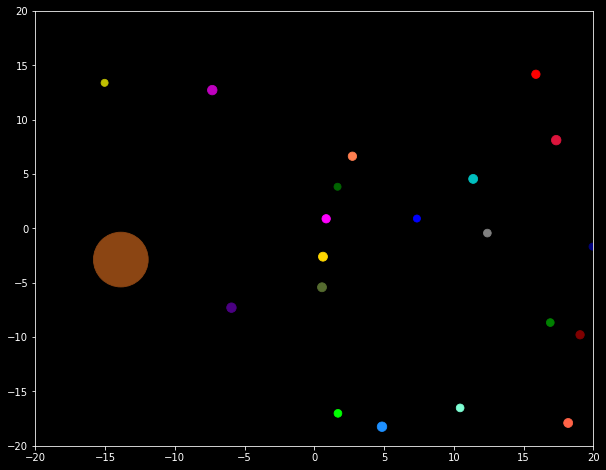

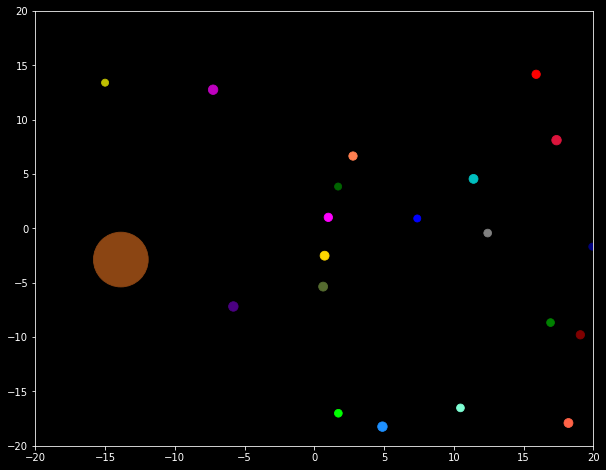

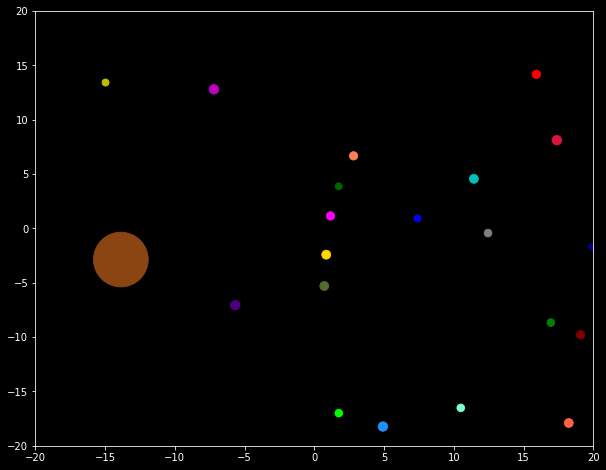

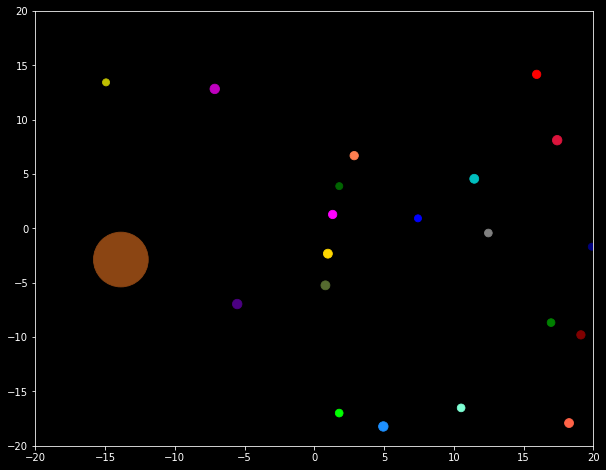

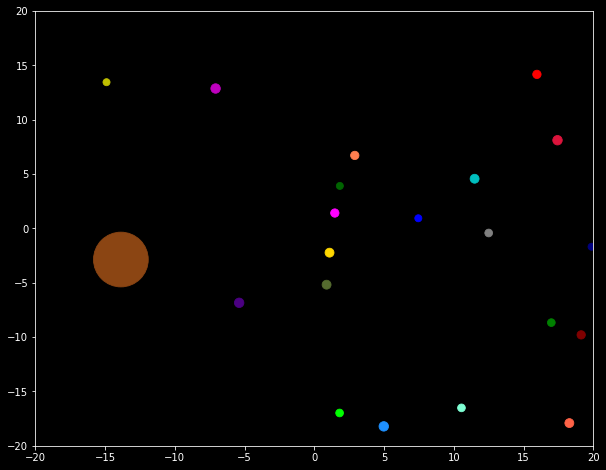

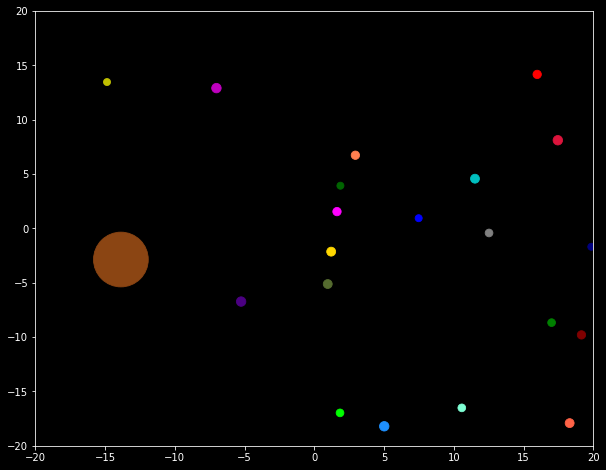

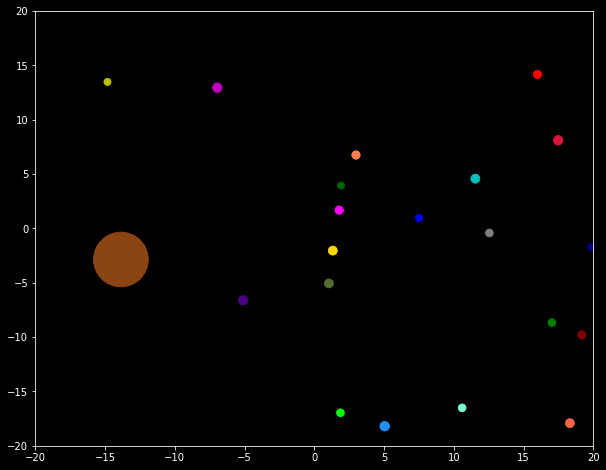

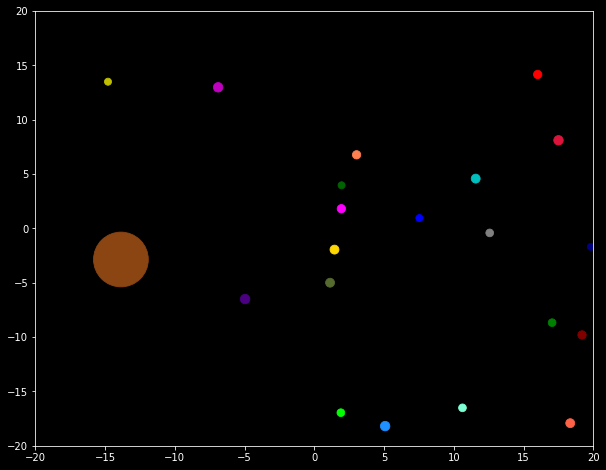

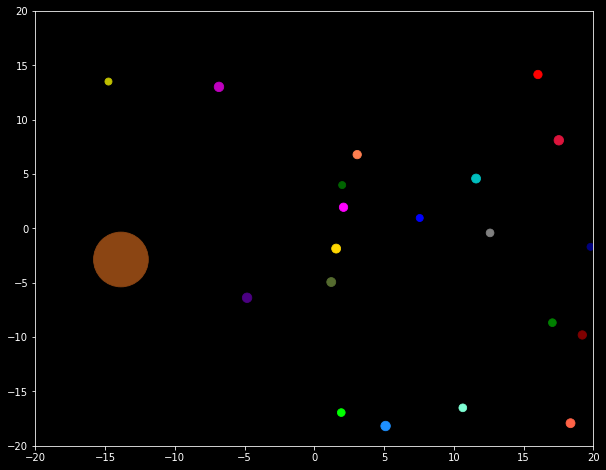

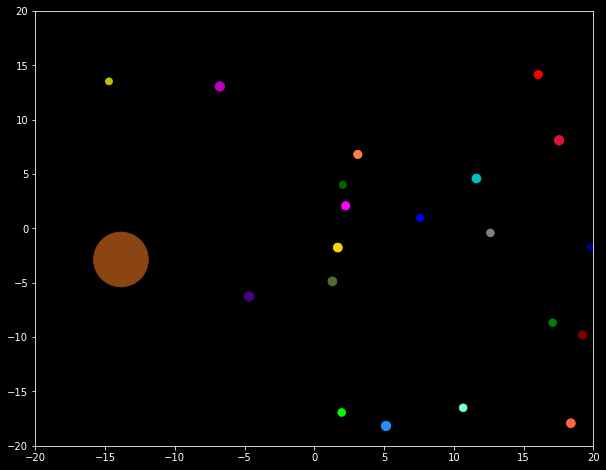

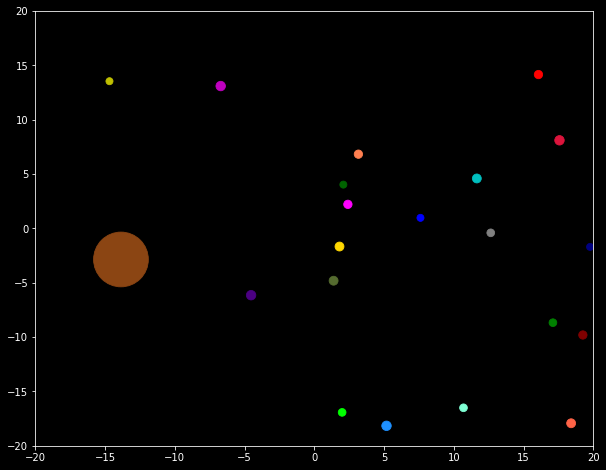

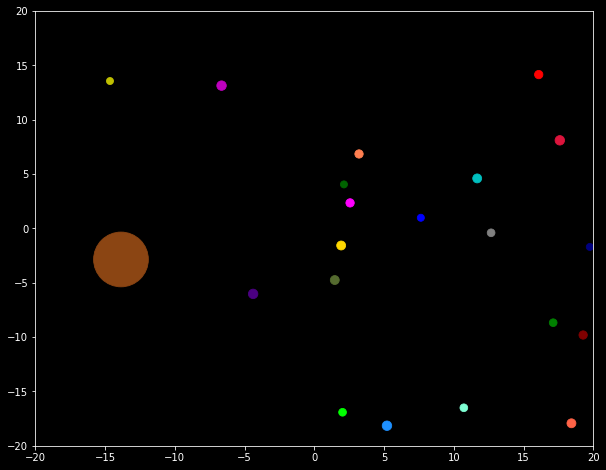

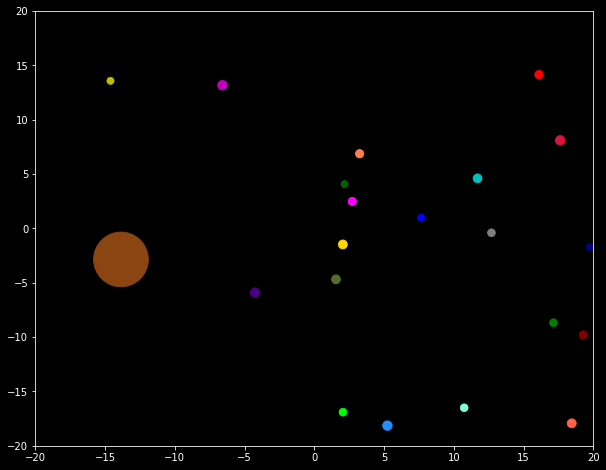

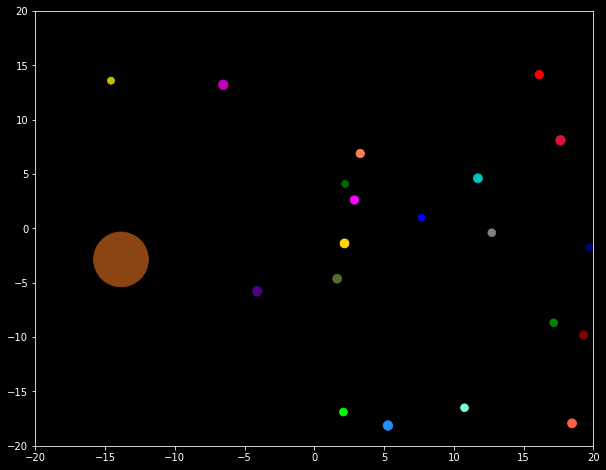

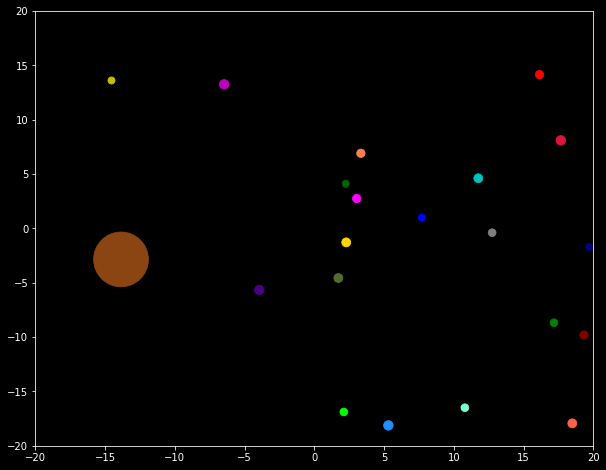

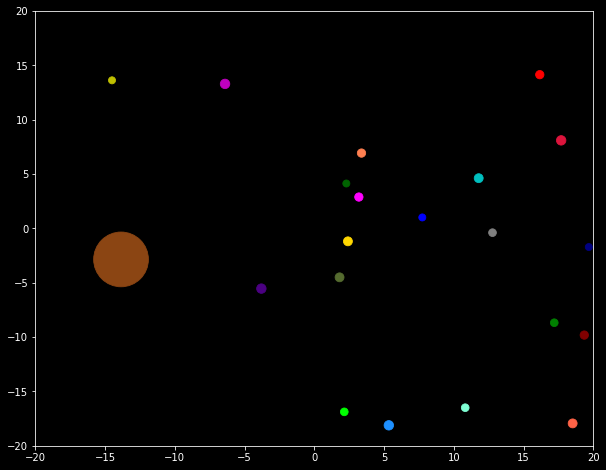

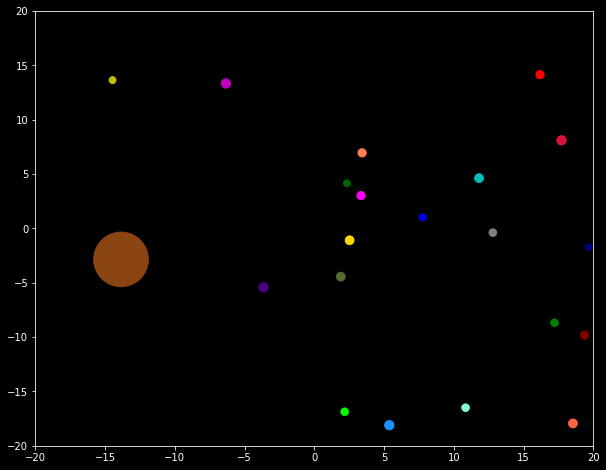

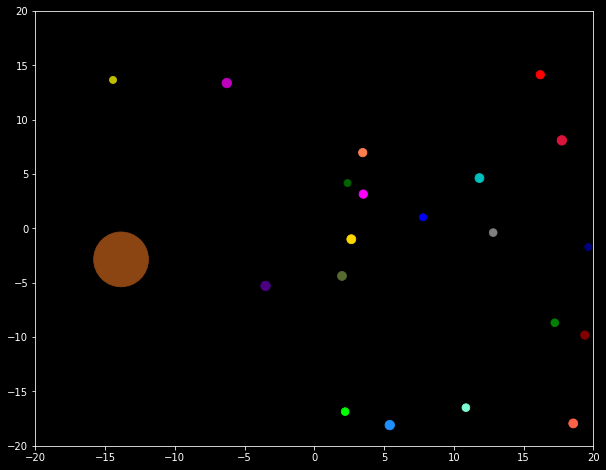

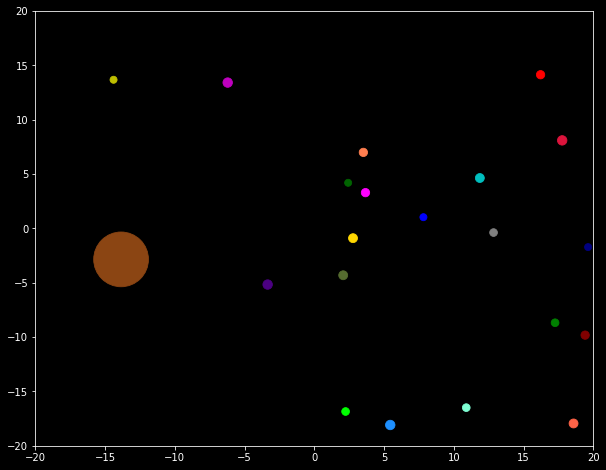

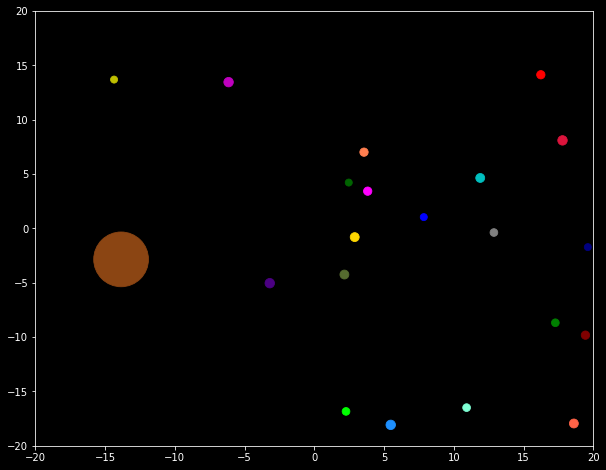

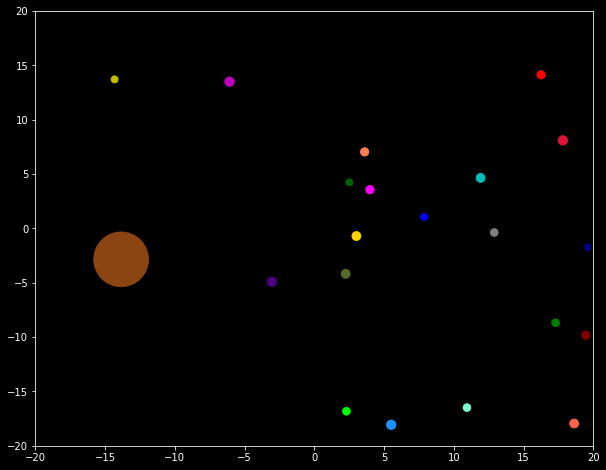

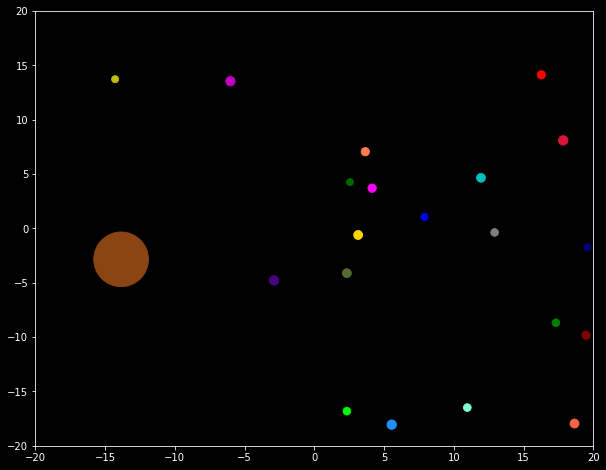

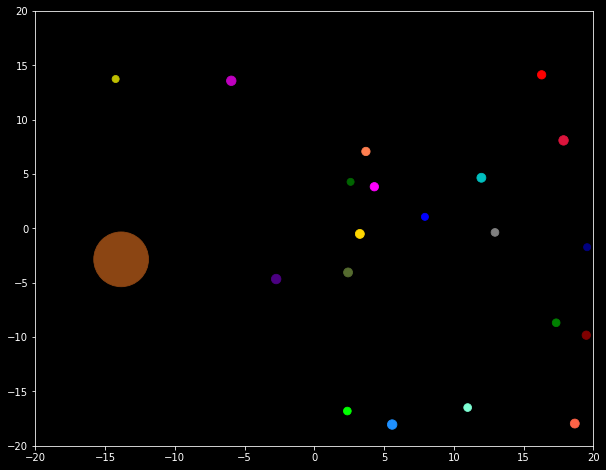

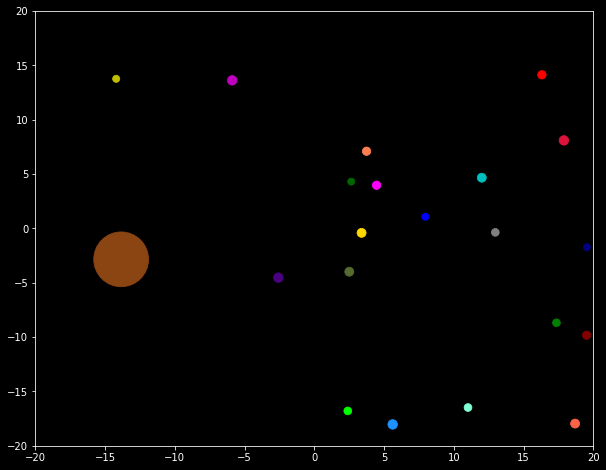

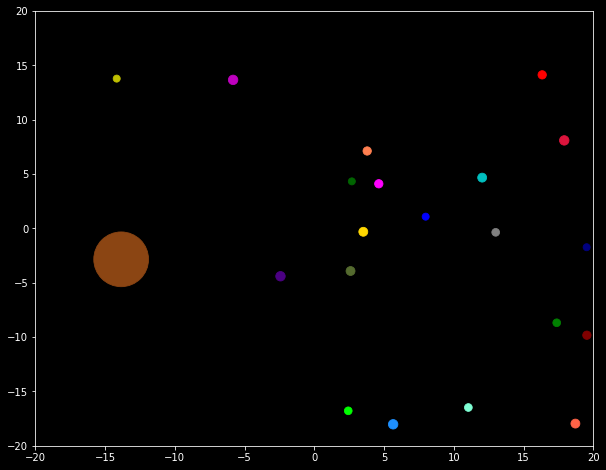

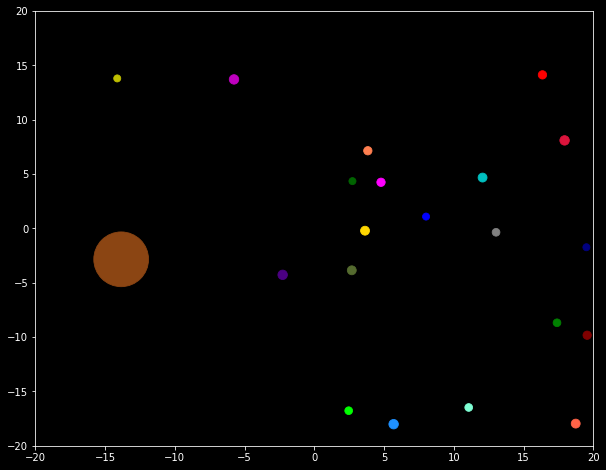

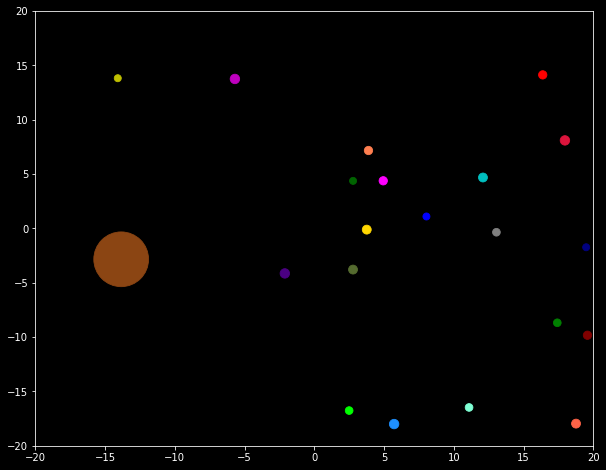

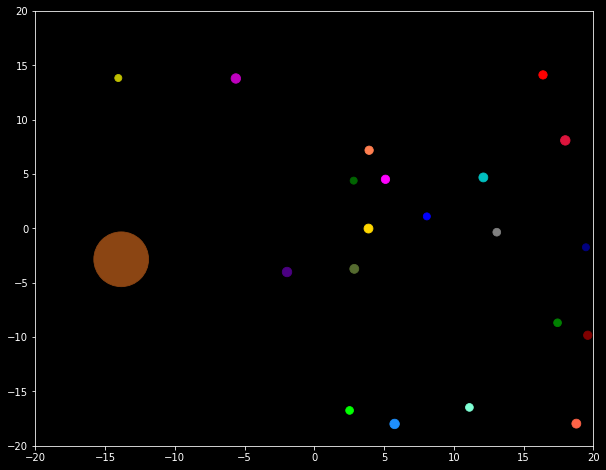

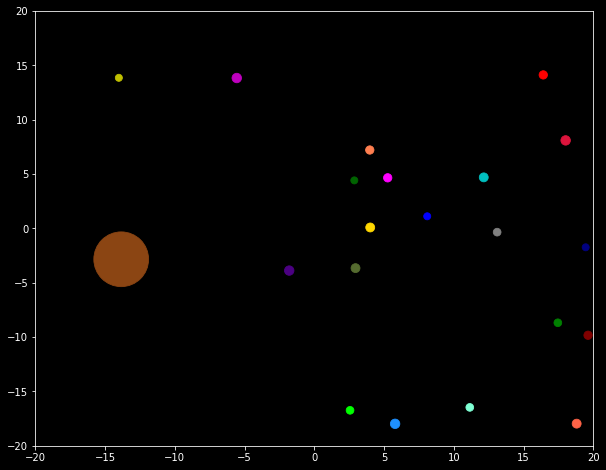

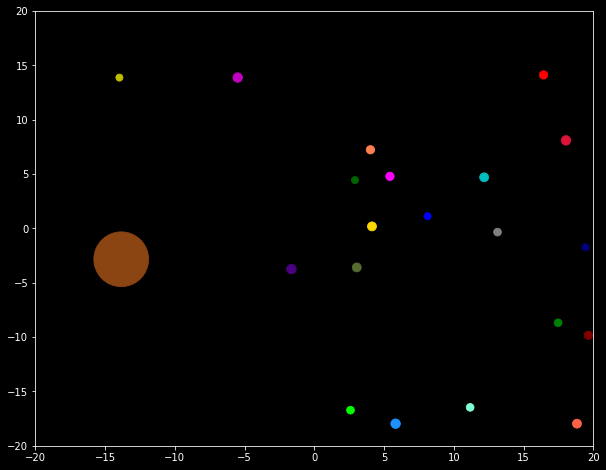

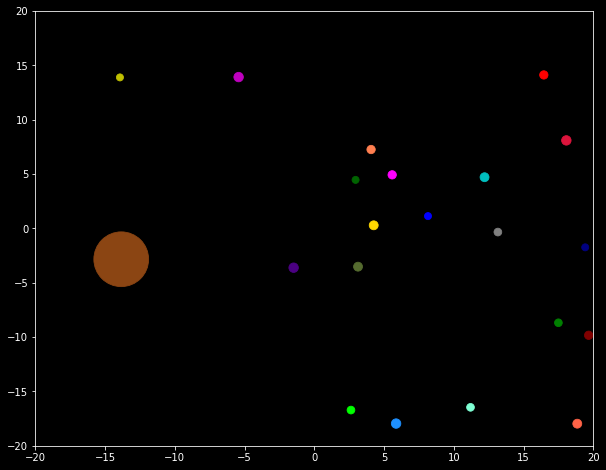

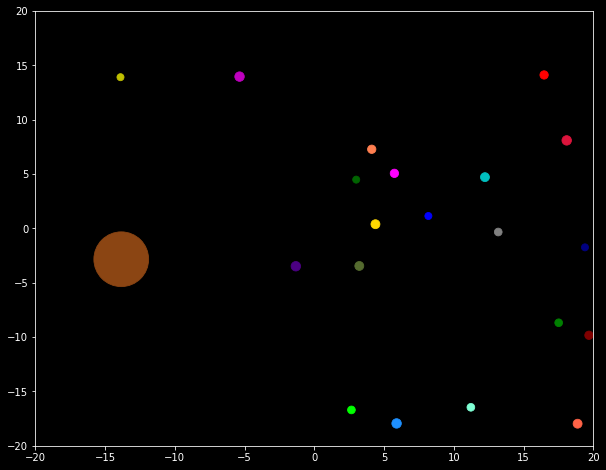

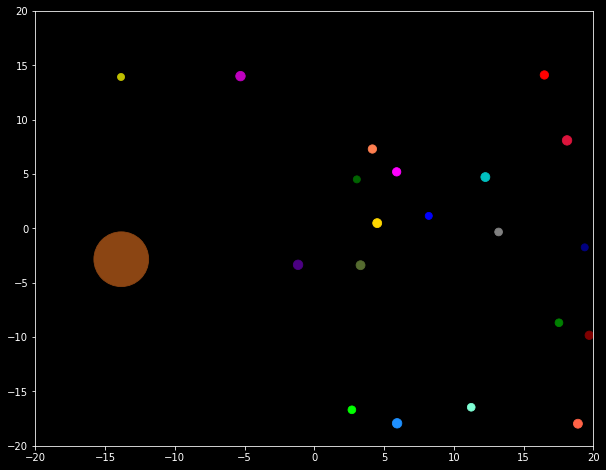

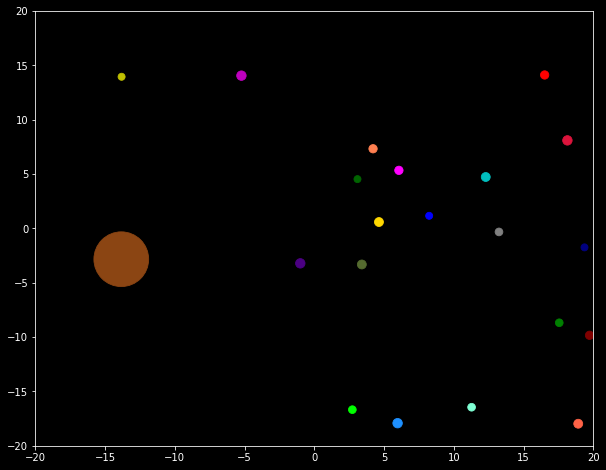

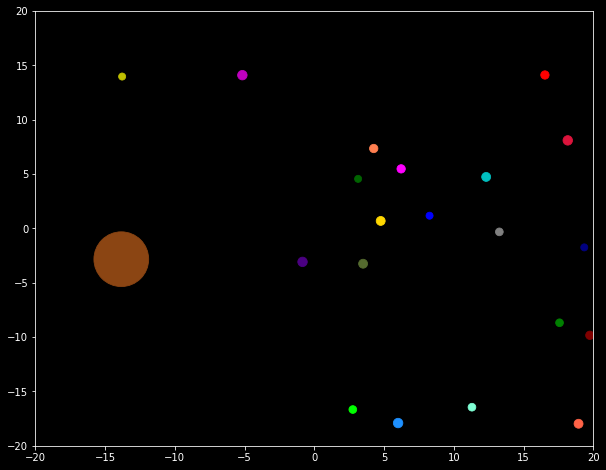

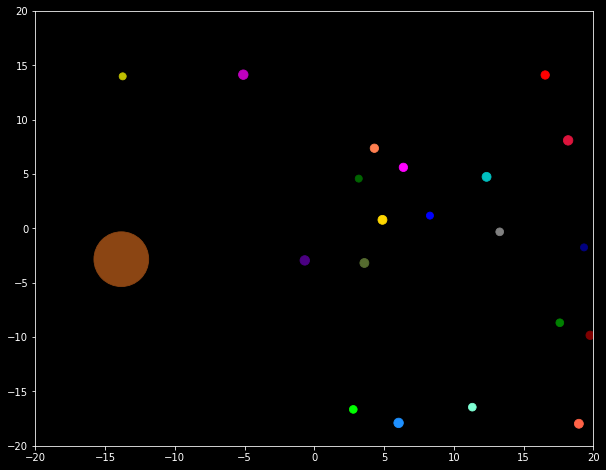

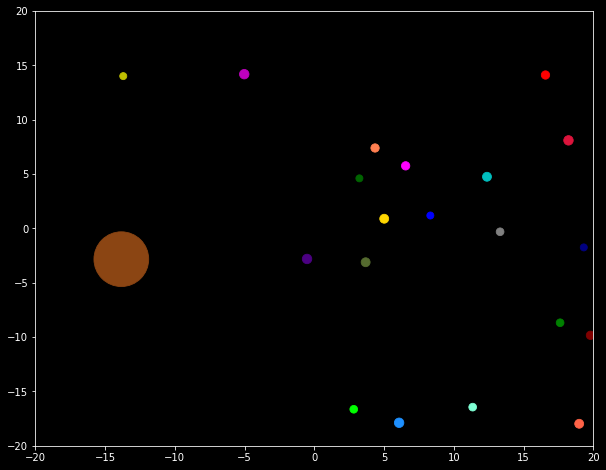

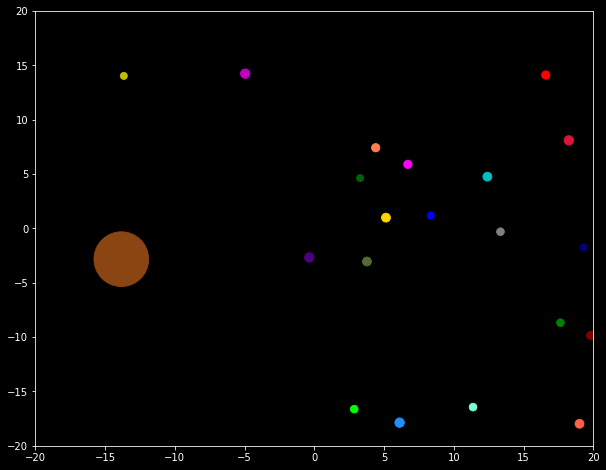

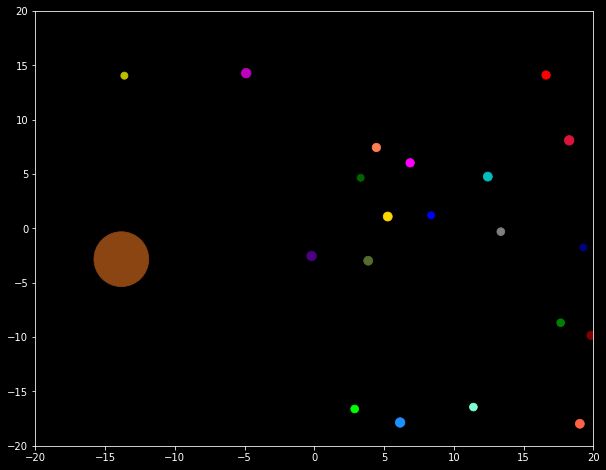

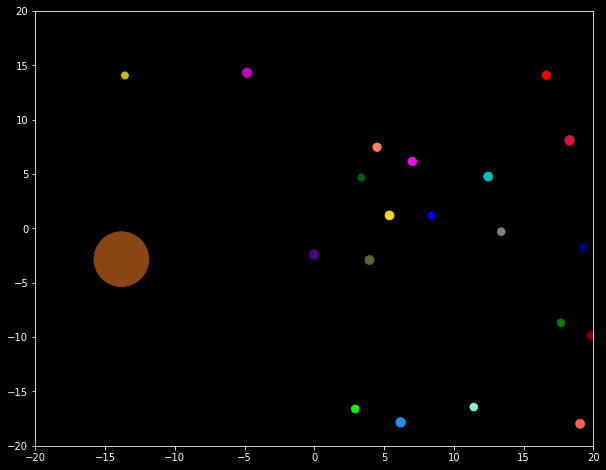

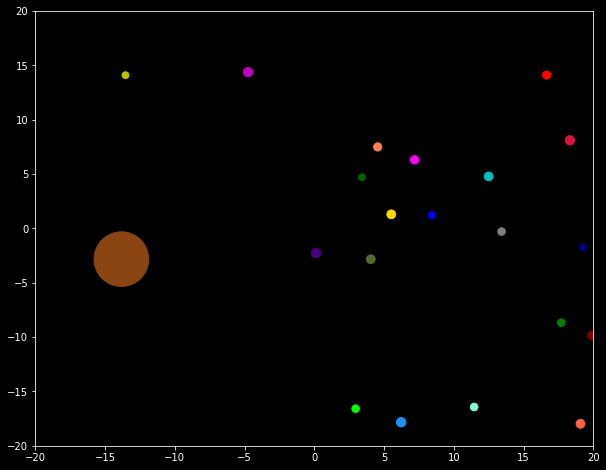

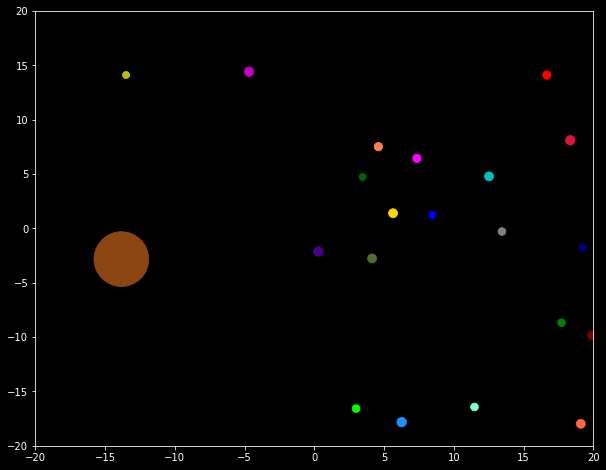

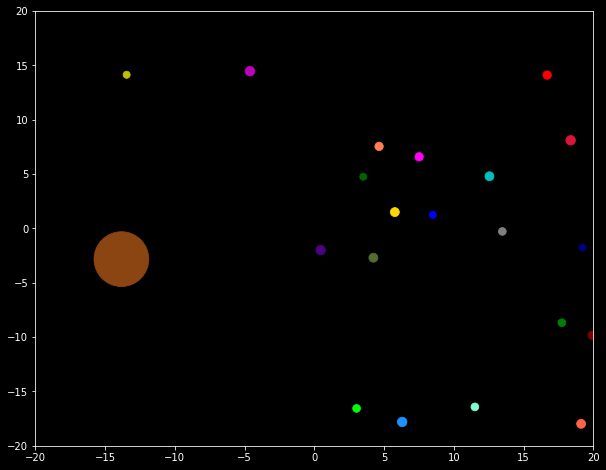

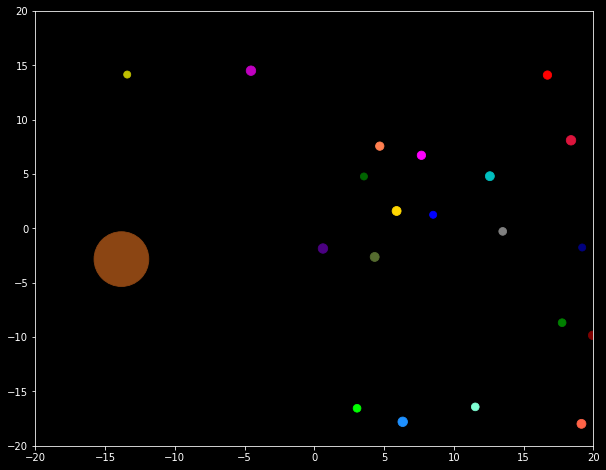

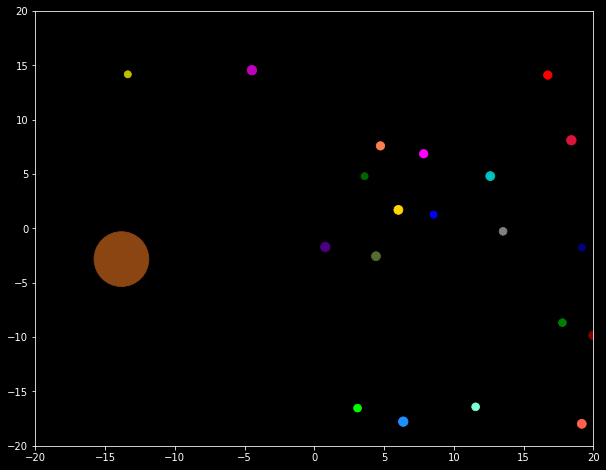

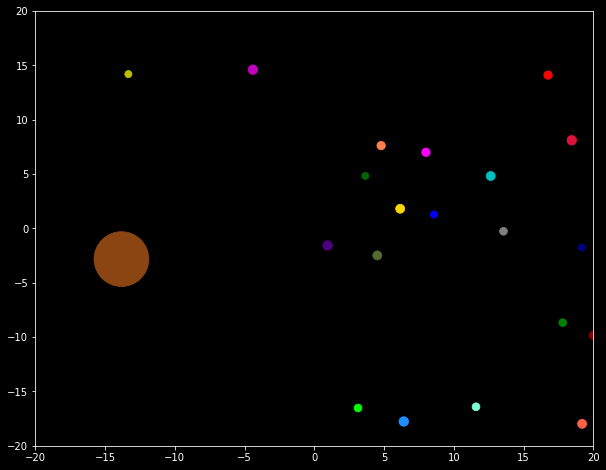

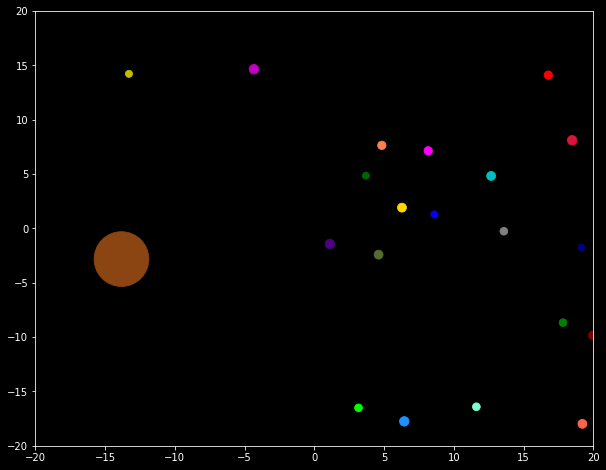

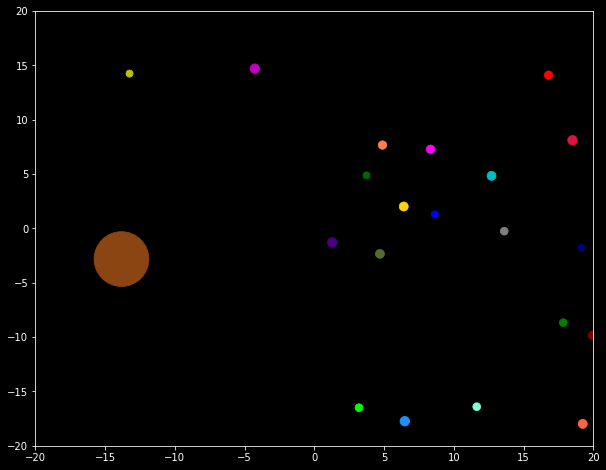

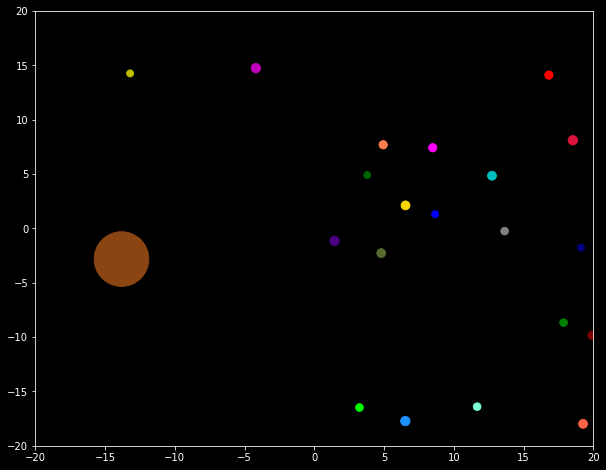

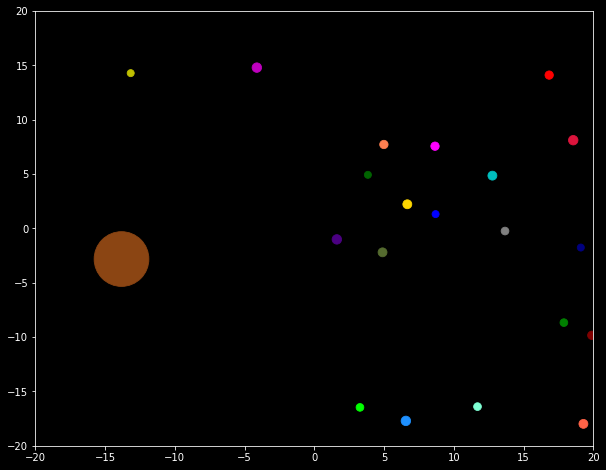

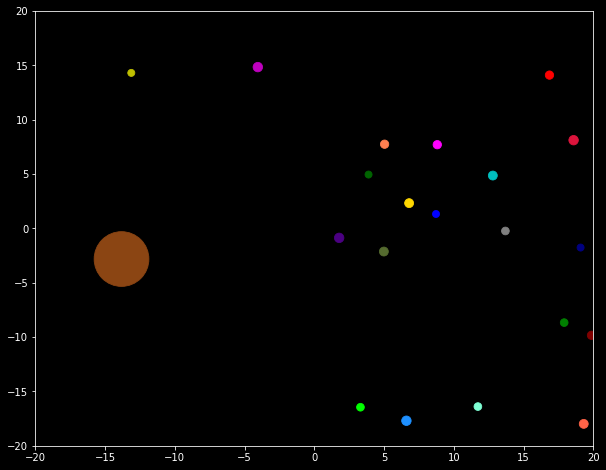

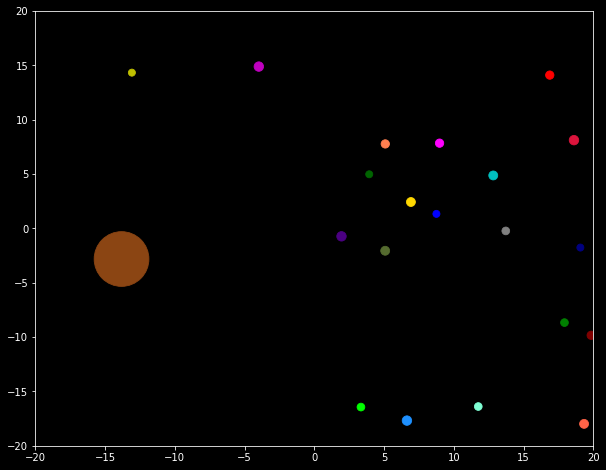

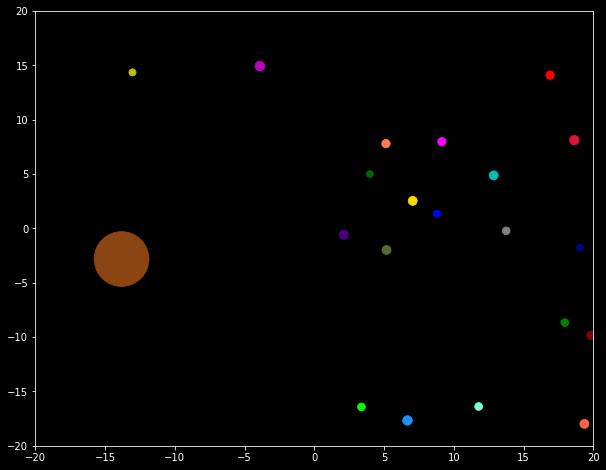

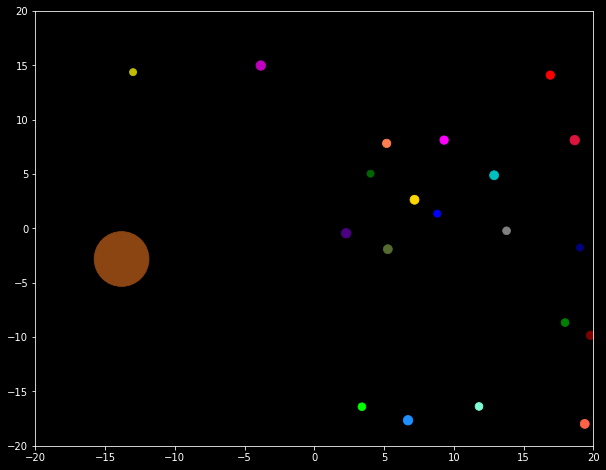

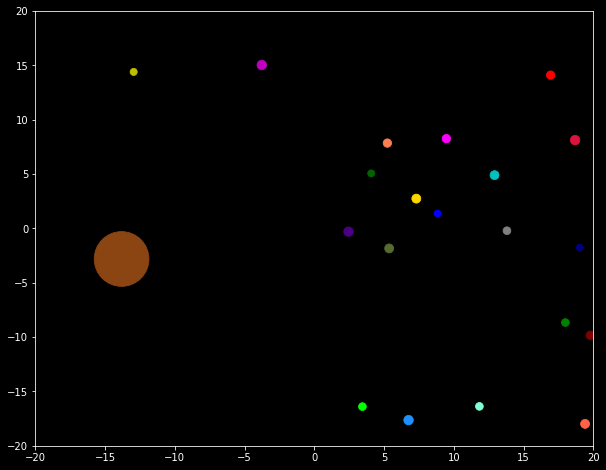

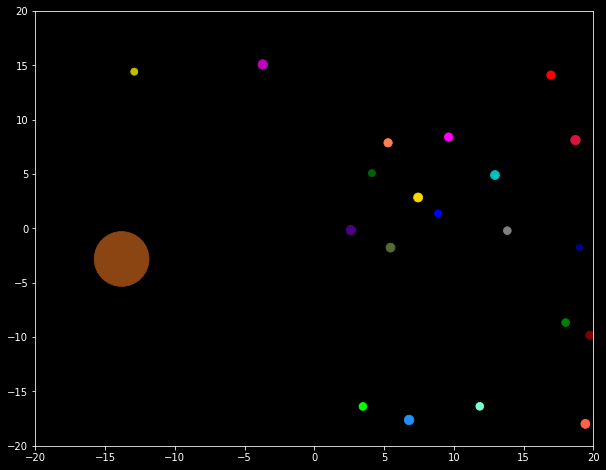

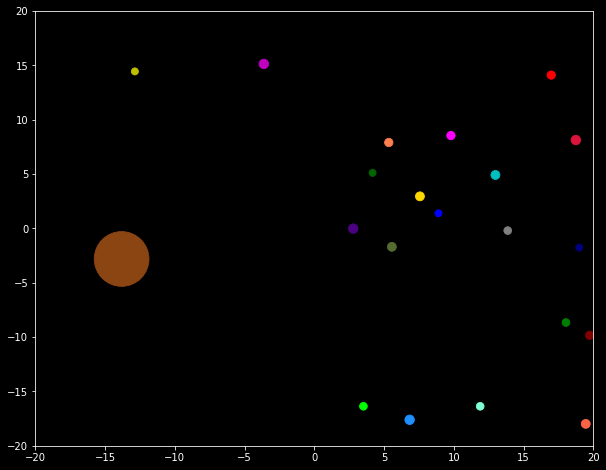

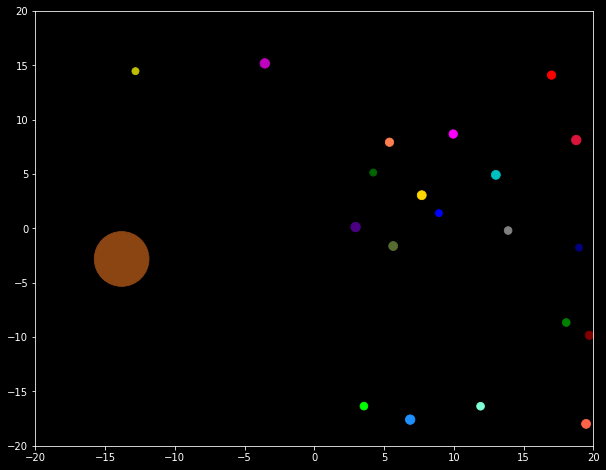

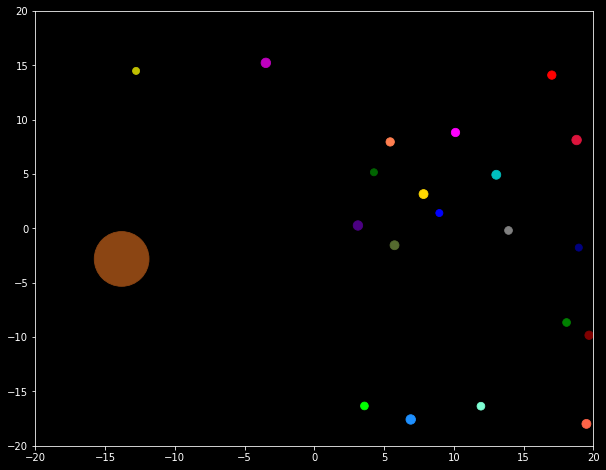

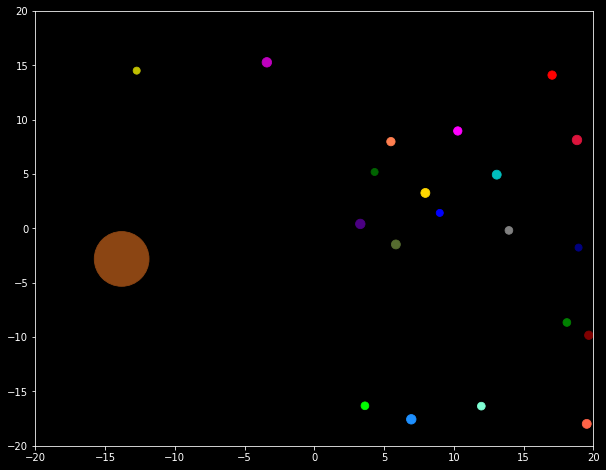

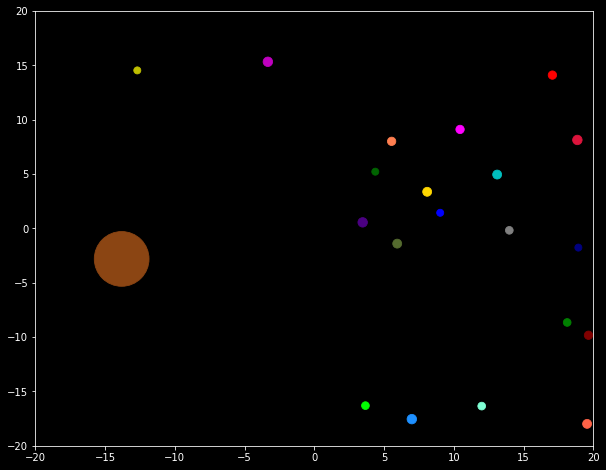

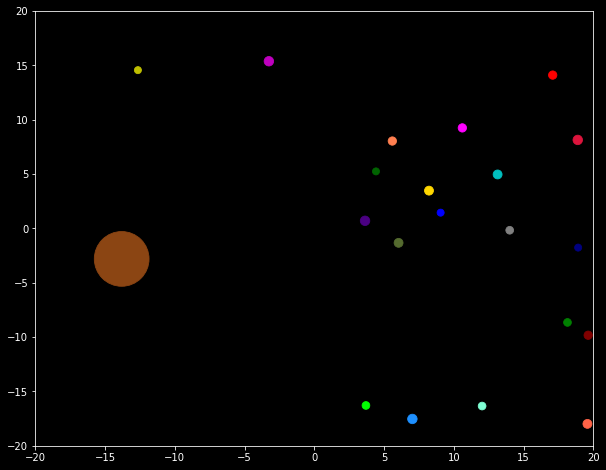

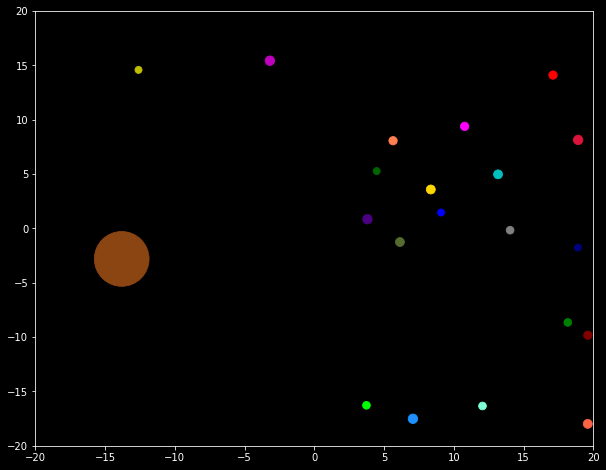

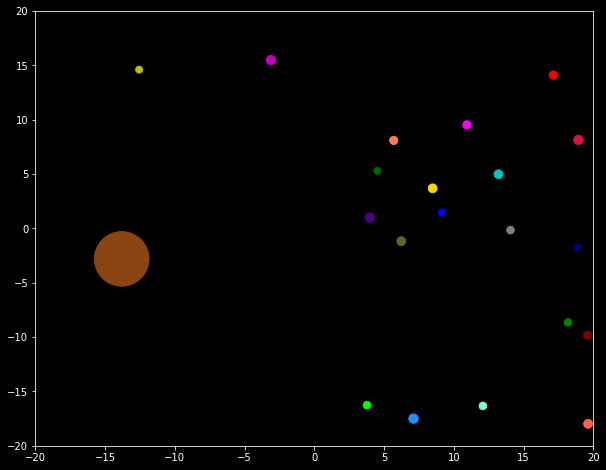

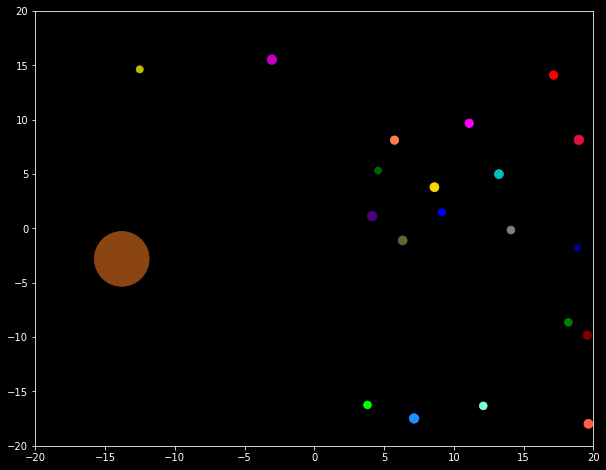

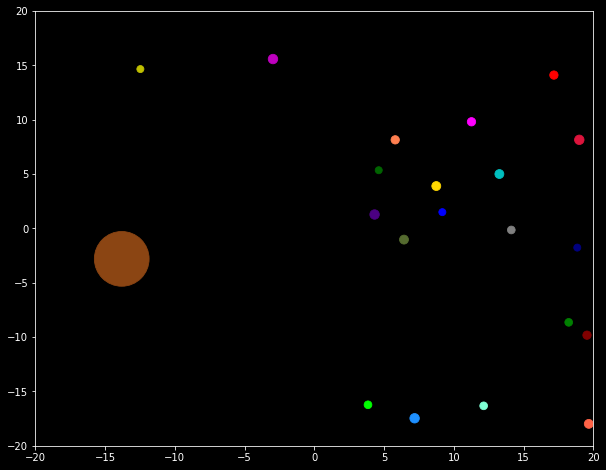

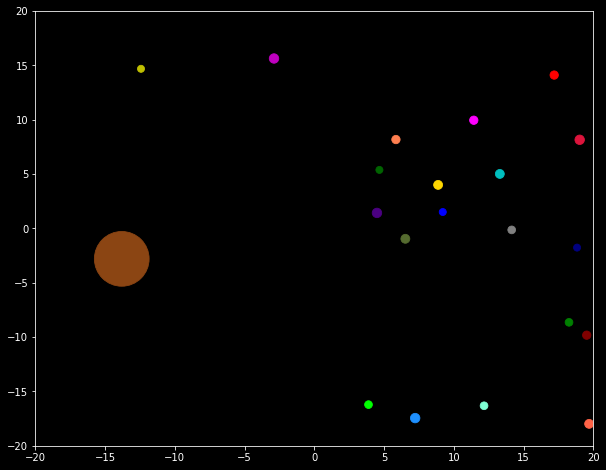

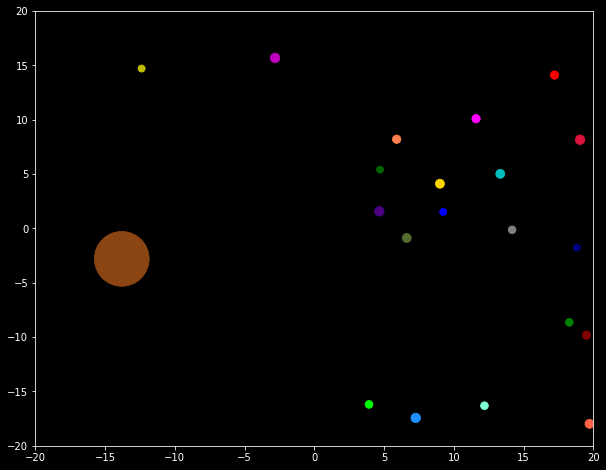

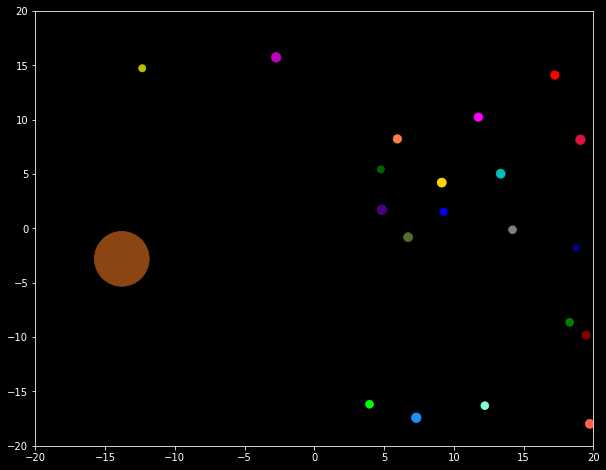

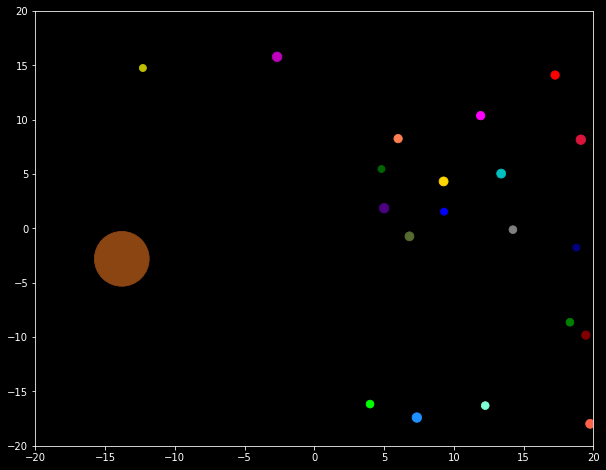

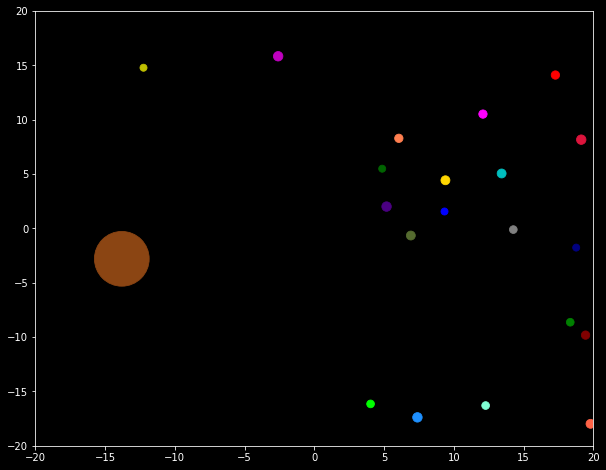

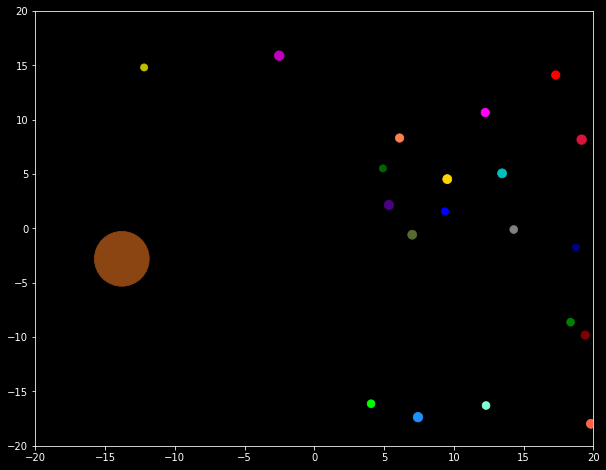

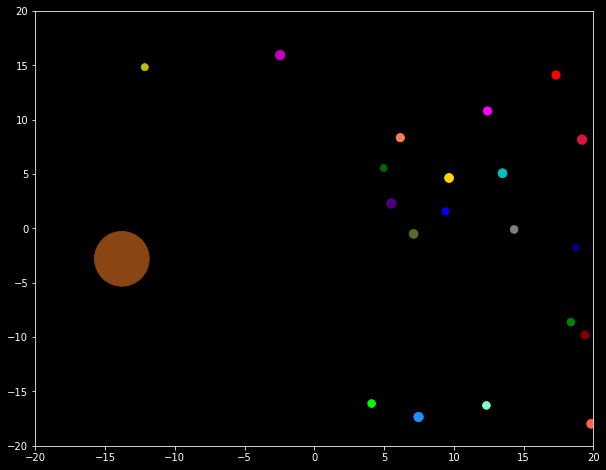

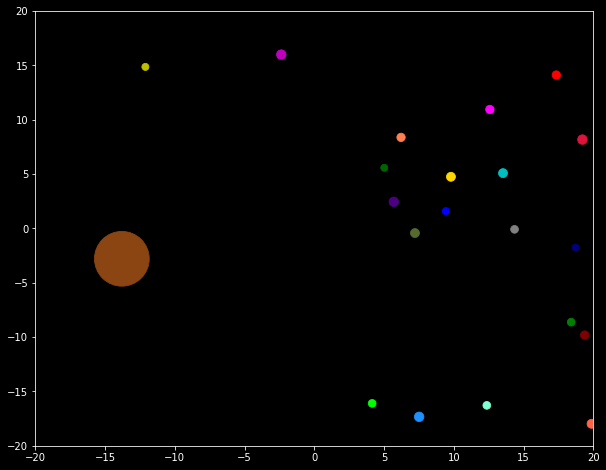

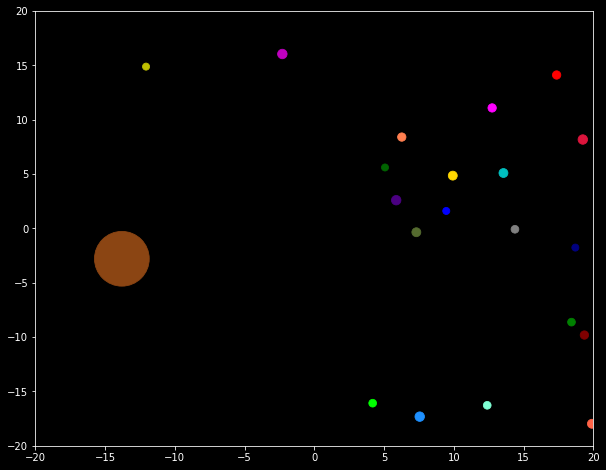

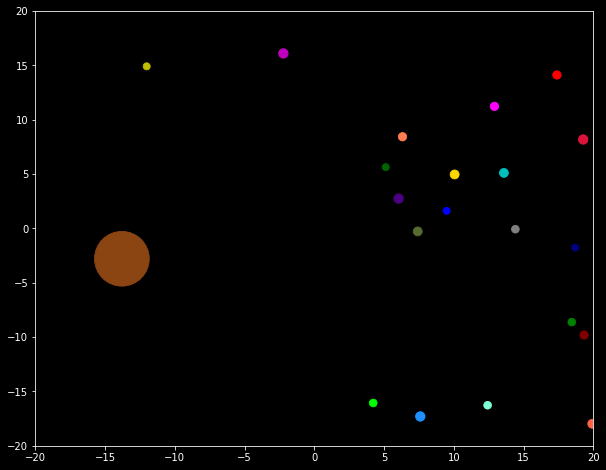

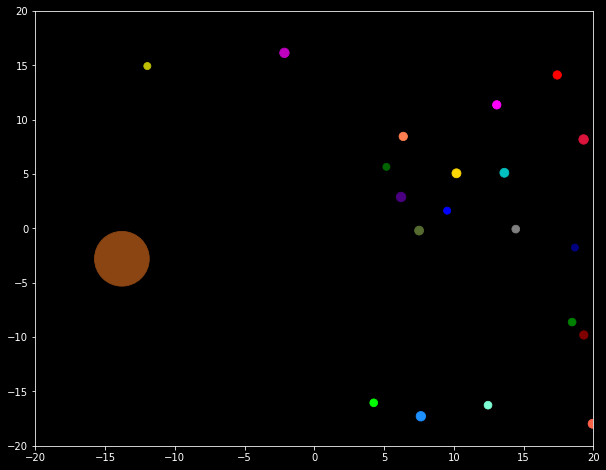

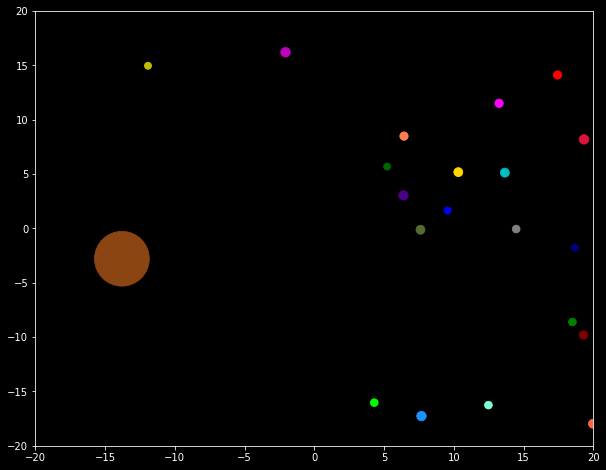

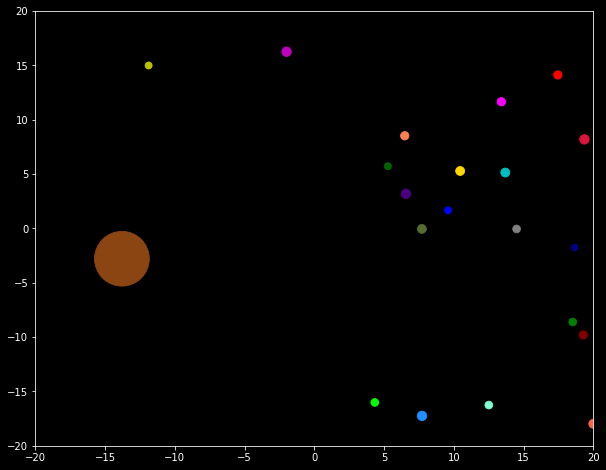

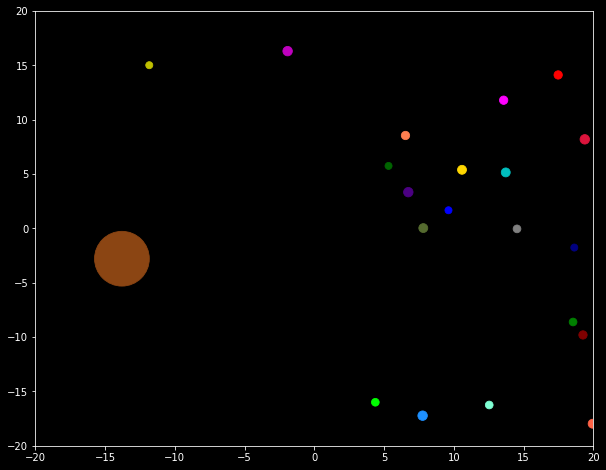

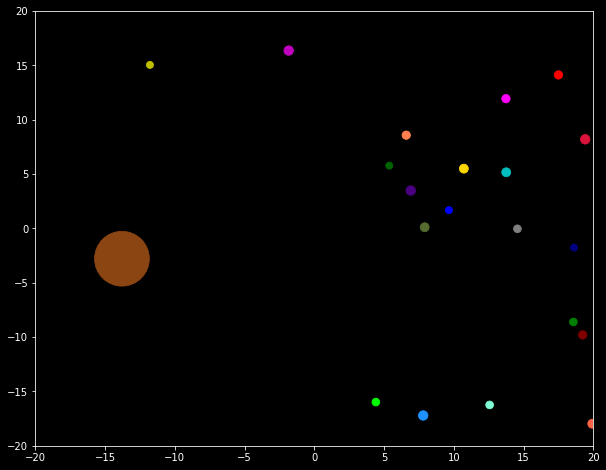

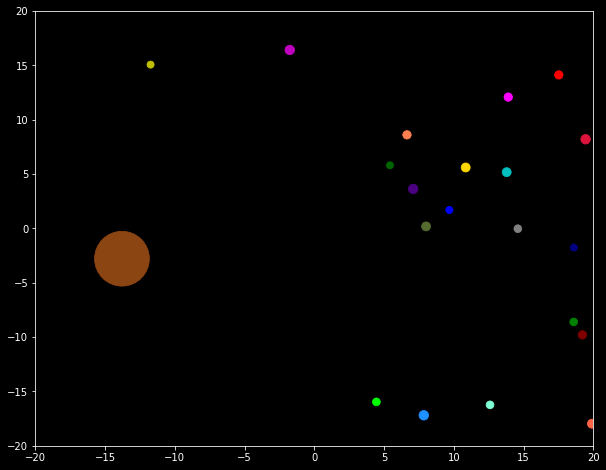

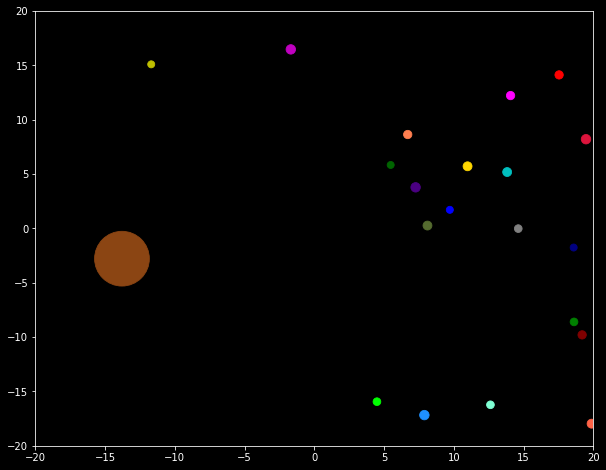

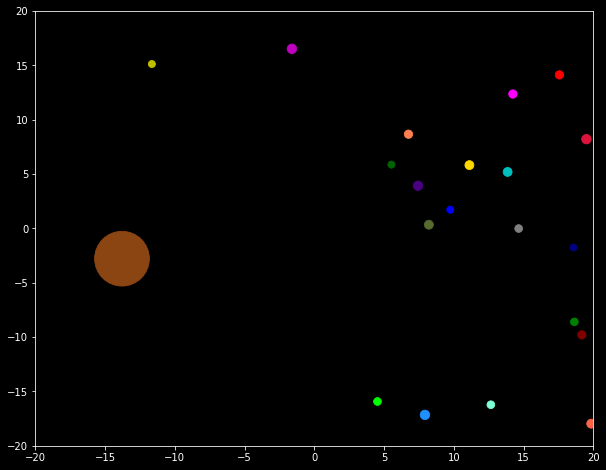

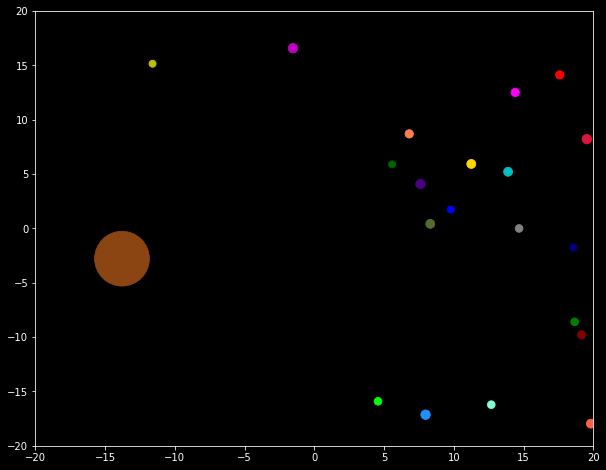

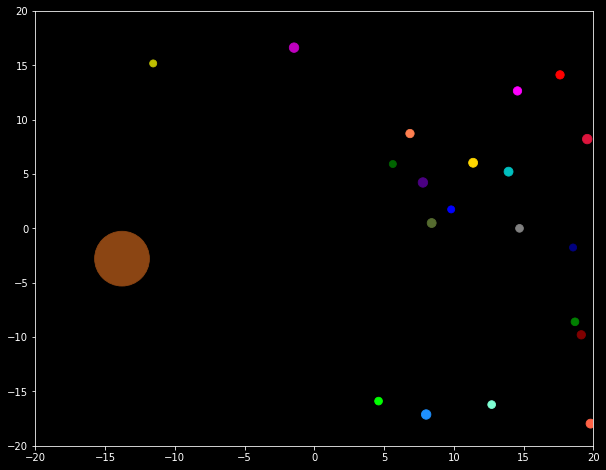

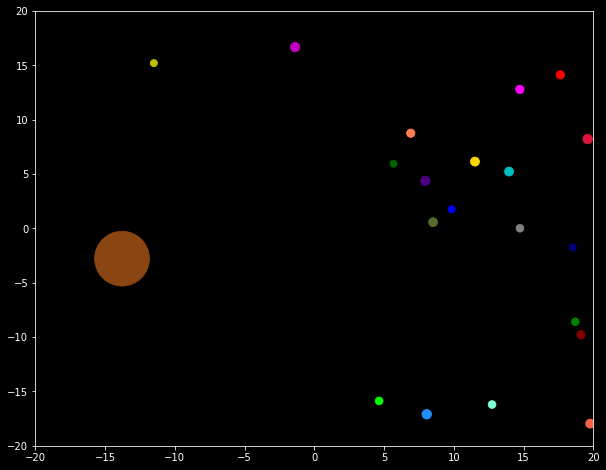

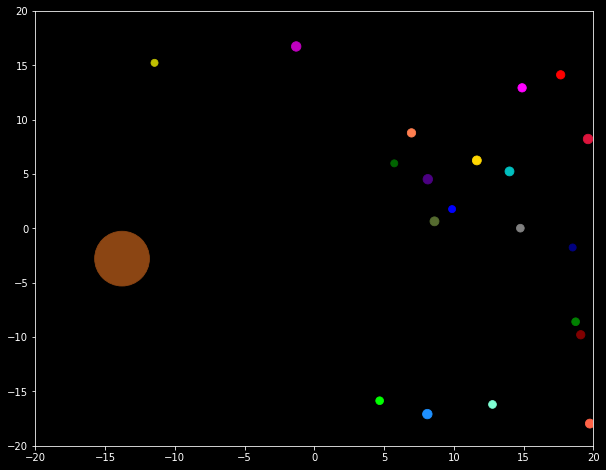

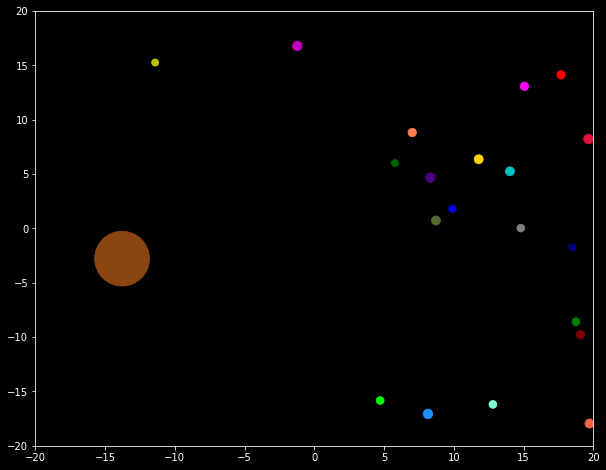

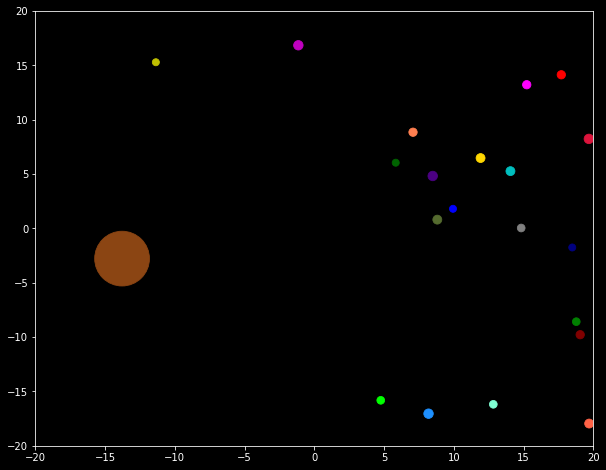

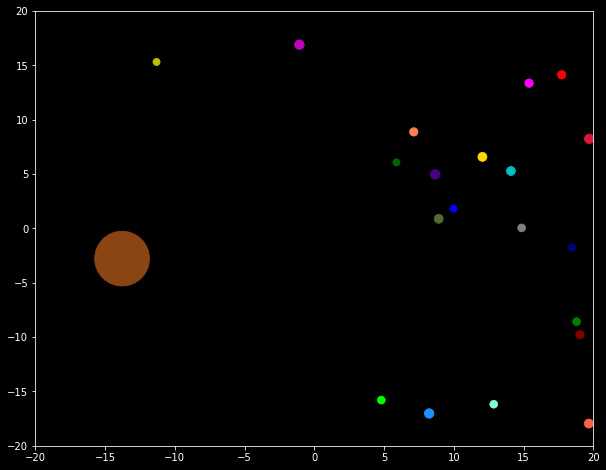

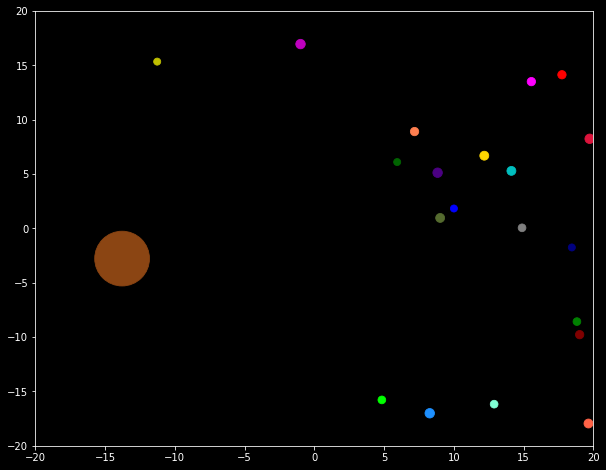

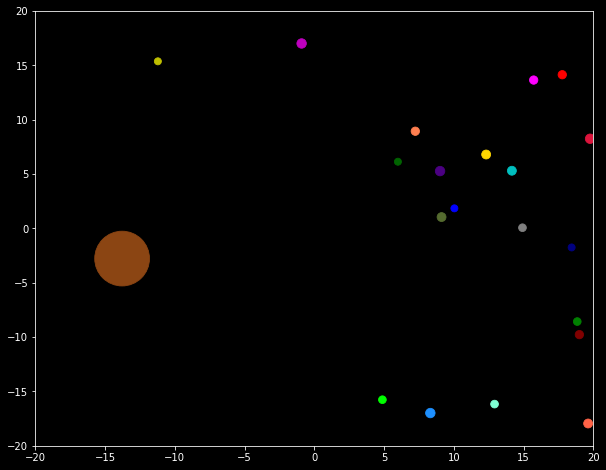

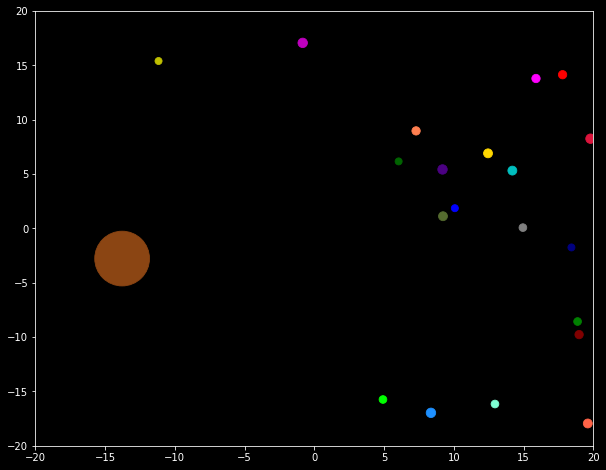

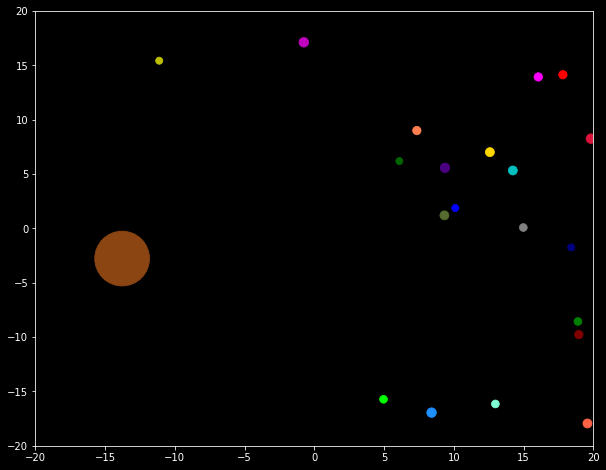

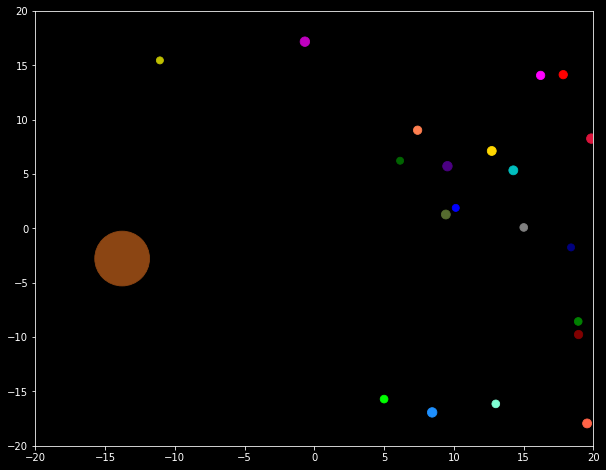

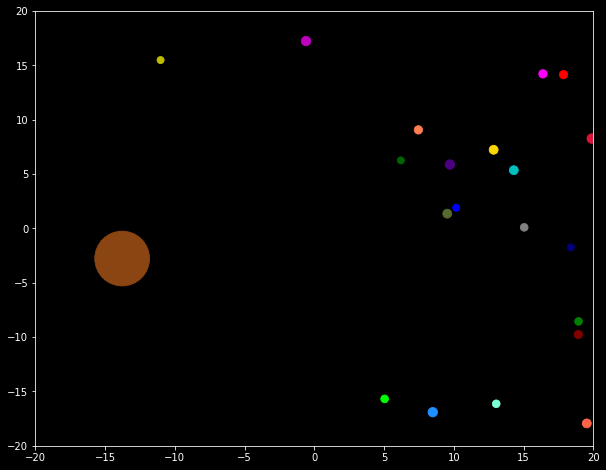

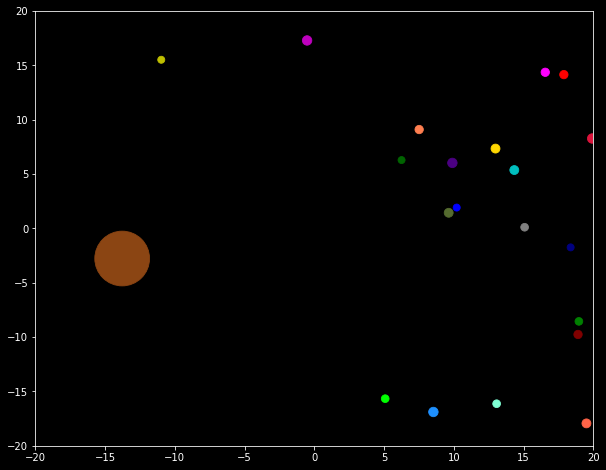

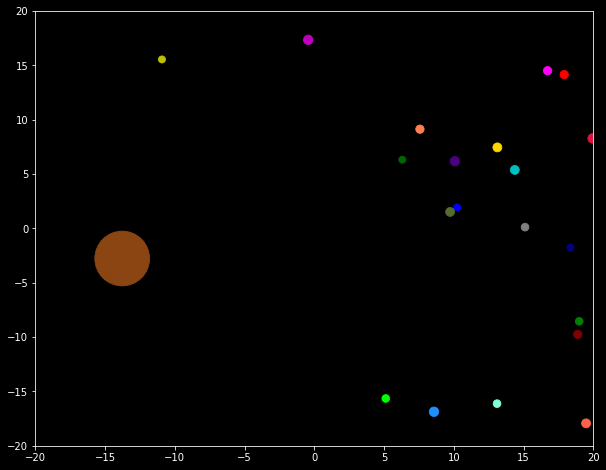

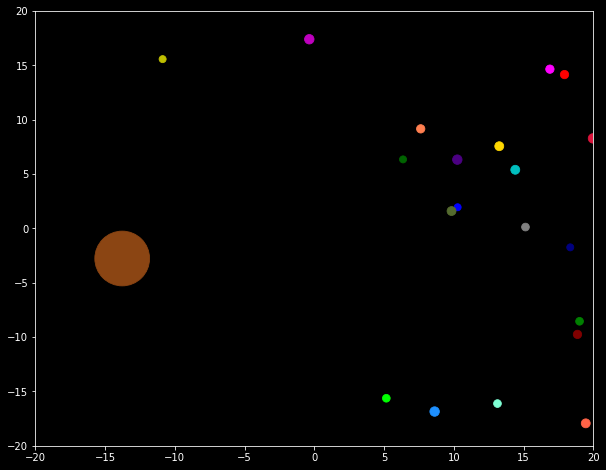

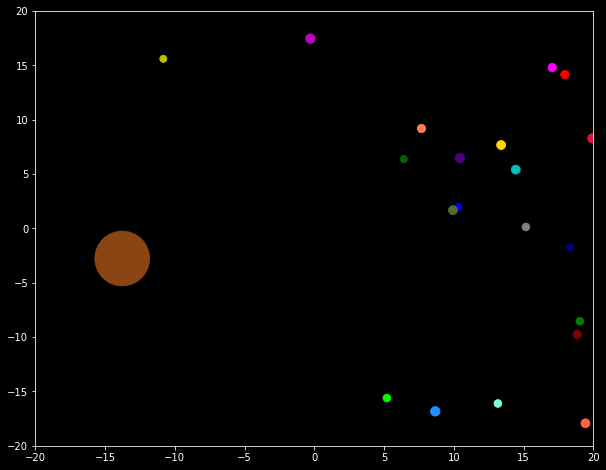

(True, (10.474631499036867, 2.071955541586984, 134.31183342127568, 101.63587597139708), (10.106915448857425, 1.7882374909072905, 65.20139392136697, 36.52343597123825))
check2 -->(False, 'hehe')


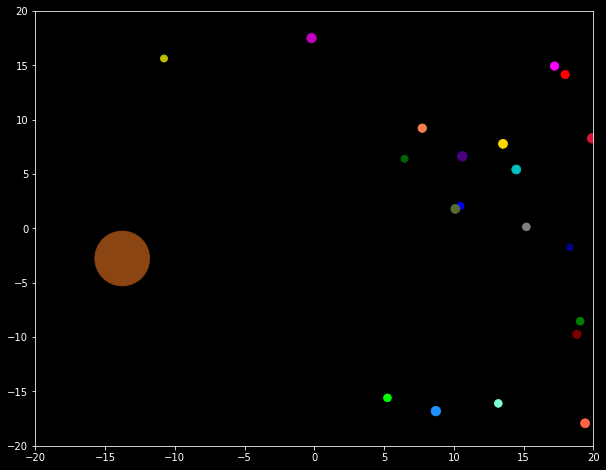

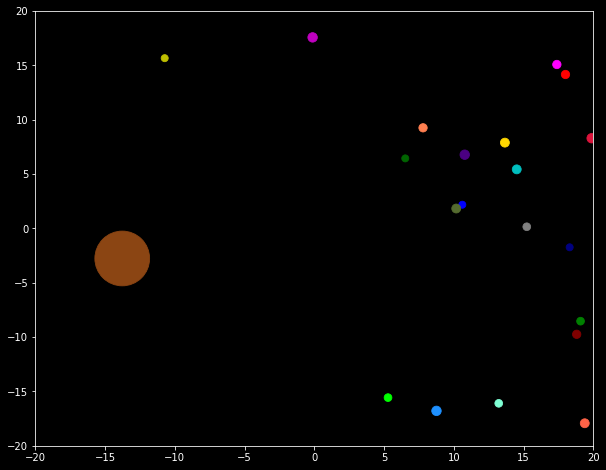

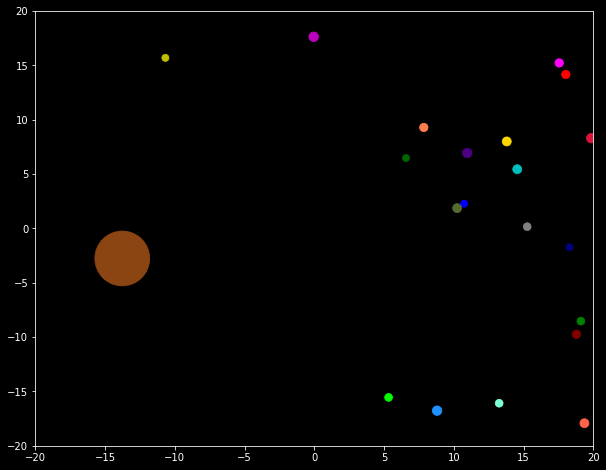

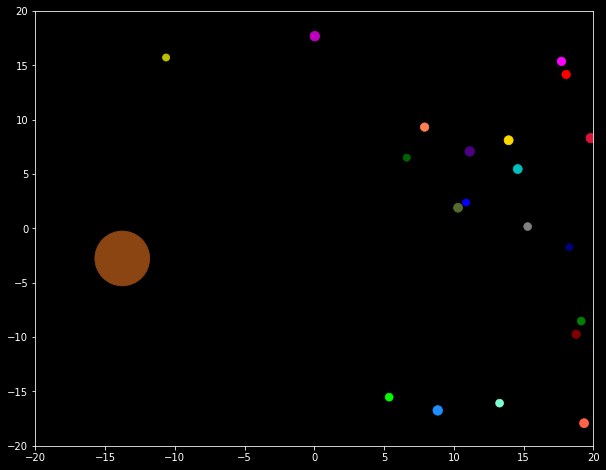

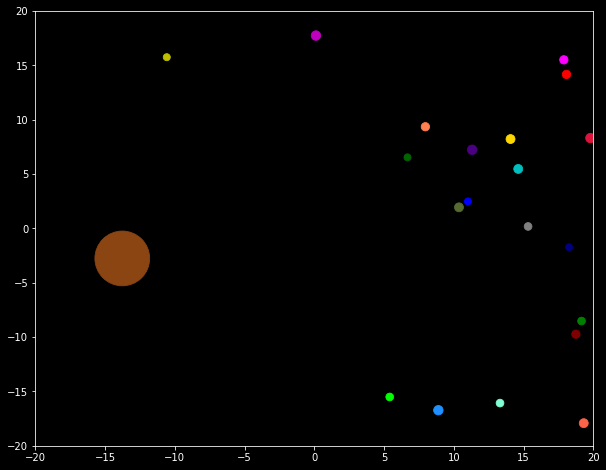

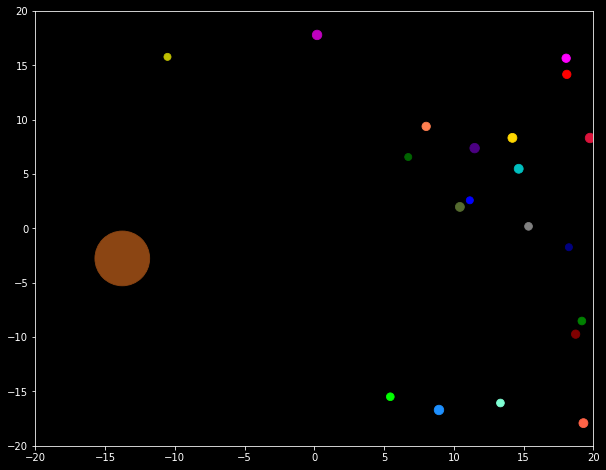

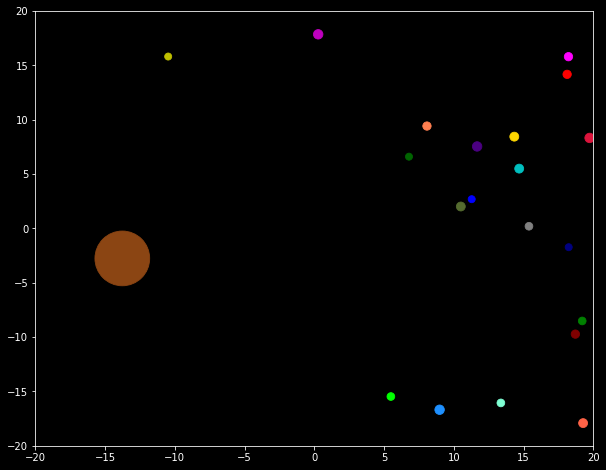

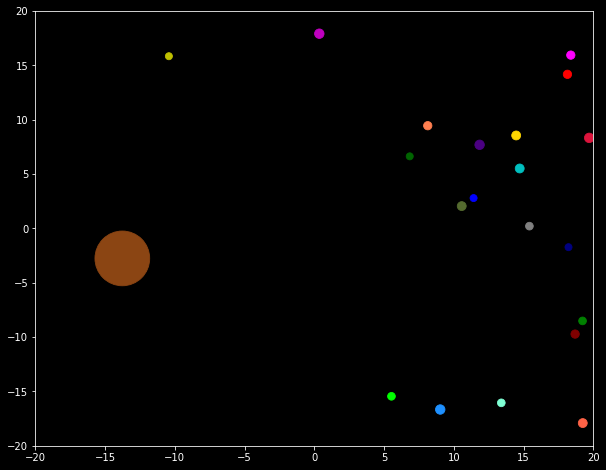

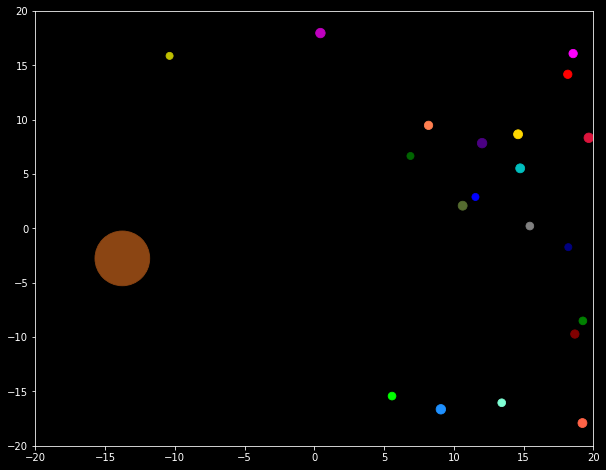

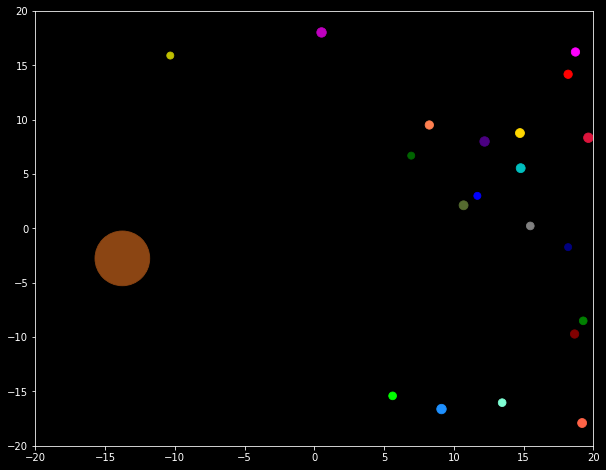

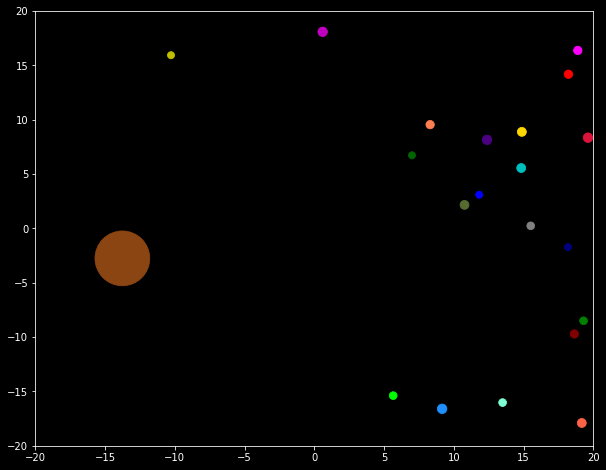

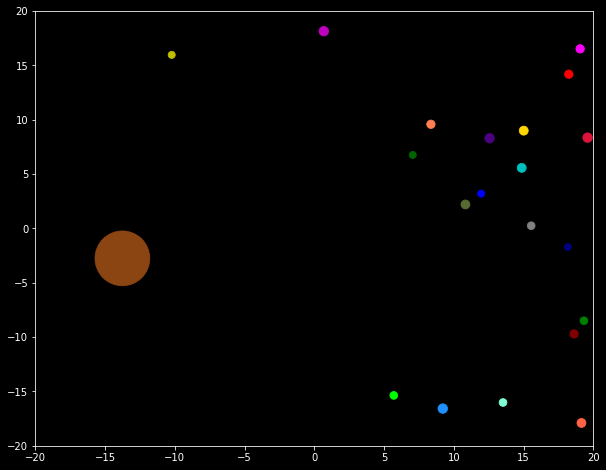

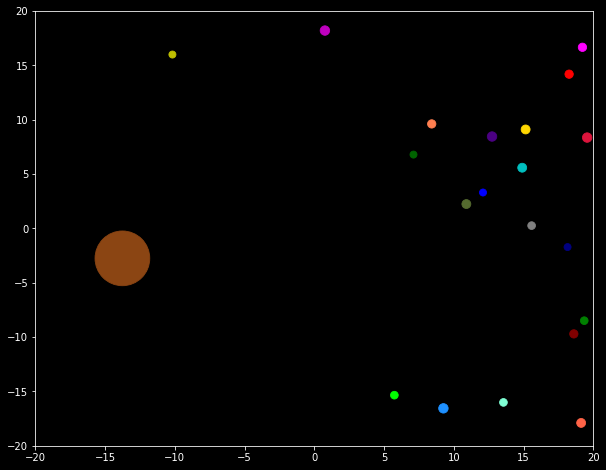

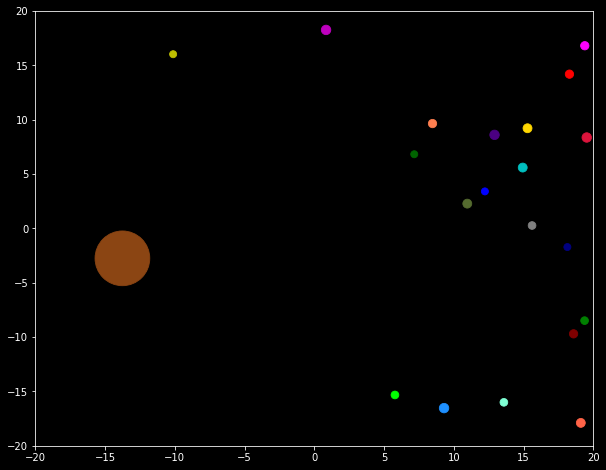

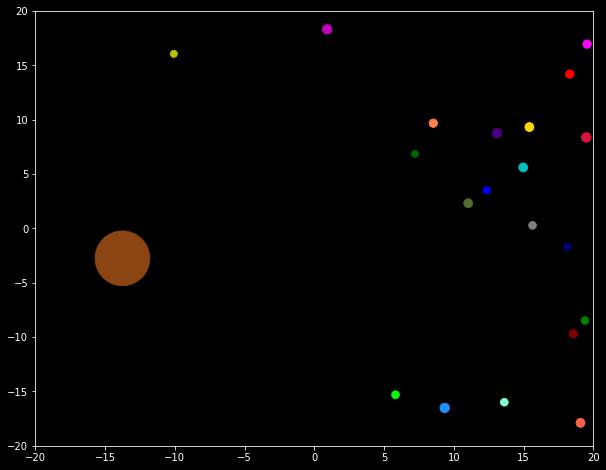

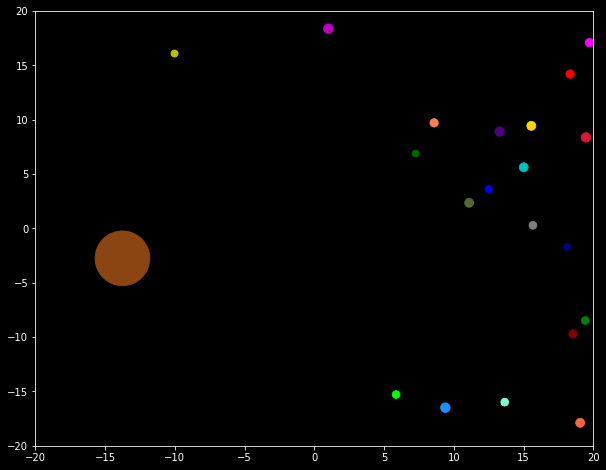

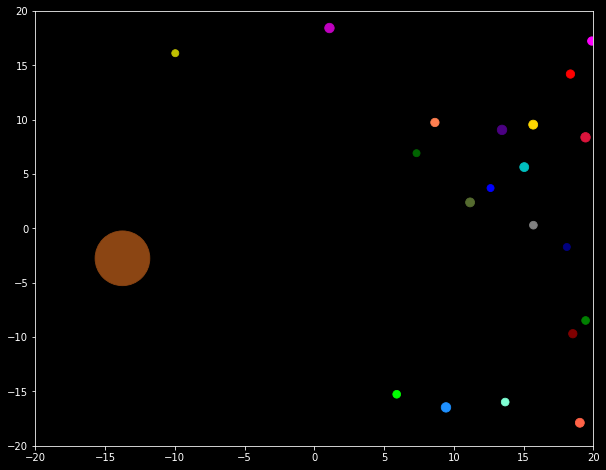

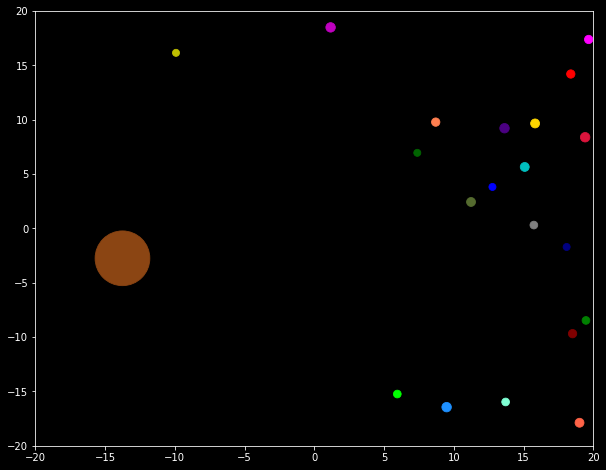

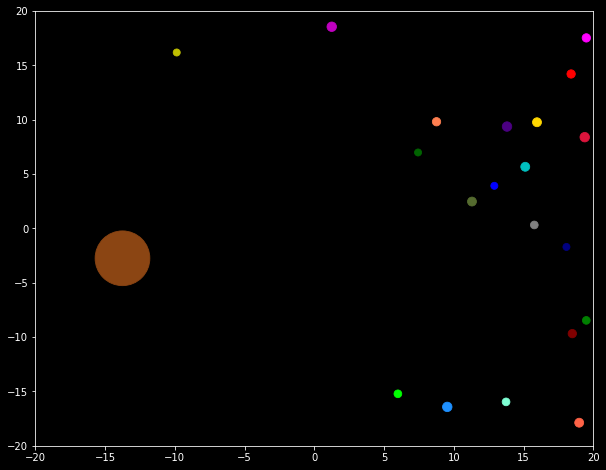

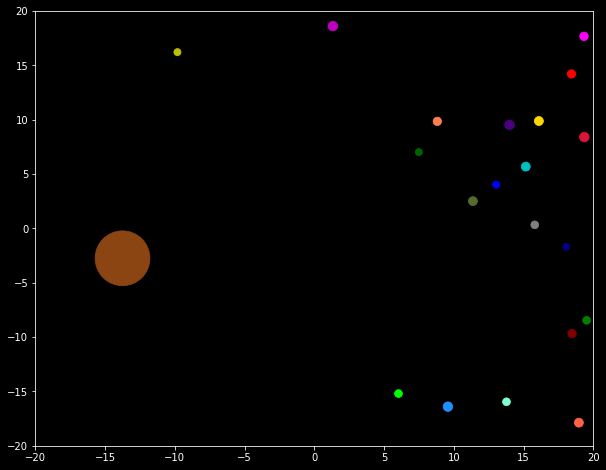

KeyboardInterrupt: 

In [20]:
"""part=[]
for i in range(1,5):
    for j in range(-2,3):    #posx=4*i+j, posy=-(4*j+i)
        part.append(simulator(posx=4*i+j, posy=-(4*j+i), velx=i+10, vely=-(j+10), aceleração=j+4,massa= 7+j,tipo= j, raio=i/10, en_cin = (7+j)*np.sqrt((i+10)**2 + (-(j+10))**2)/2,previous_velx=i+10, previous_vely=-(j+10), status = []))                                

part.append(simulator(posx=-10, posy=-10, velx=1, vely=1, aceleração=0, massa= 300, tipo= 3, raio=1.5, en_cin = 0, previous_velx=0, previous_vely=0, status = []))                              
"""

part=[]
for i in range(1,5):
    for j in range(-2,3):
        pos1=random.randrange(-18,19)
        pos2=random.randrange(-18,19)
        part.append(simulator(posx=pos1, posy=pos2, velx=i+10, vely=-(j+10), aceleração=j+4,massa= 7+j,tipo= j, raio=i/10, en_cin = (7+j)*np.sqrt((i+10)**2 + (-(j+10))**2)/2,previous_velx=i+10, previous_vely=-(j+10), status = [])) 
        
pos1=random.randrange(-18,19)
pos2=random.randrange(-18,19)    
part.append(simulator(posx=pos1, posy=pos2, velx=1, vely=1, aceleração=0, massa= 300, tipo= 3, raio=1.5, en_cin = 0, previous_velx=0, previous_vely=0, status = []))                              

for k in range(0,21):
    i=k+1
    while i>k and i<21:
        teste1=(part[i].posx-part[k].posx)**2
        teste2=(part[i].posy-part[k].posy)**2

        while  np.sqrt(teste1+teste2)<((part[k].raio+part[i].raio)):
            part[k].posx=random.randrange(-18,19)
            part[k].posy=random.randrange(-18,19)
            teste1=(part[k].posx-part[k].posx)**2
            teste2=(part[k].posy-part[k].posy)**2
        i+=1


print(simulator.simul())
print("hehehe")

In [60]:
def teste(j):
    r1=j*j
    r2=2*j
    return True,1
haha=teste(1)
print(haha[0])
if haha[0]==False and haha[1]==1:
    print("hehe")

True


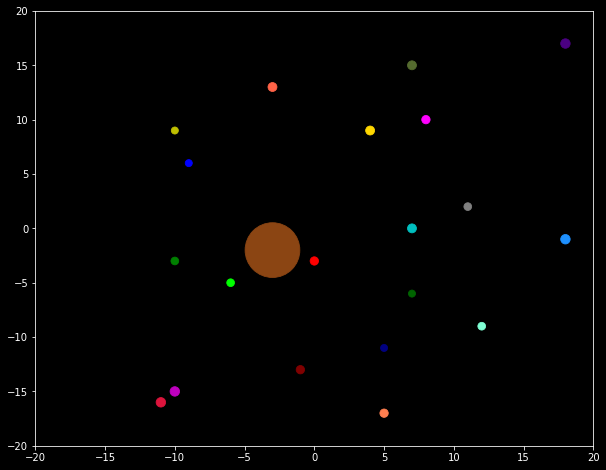

In [18]:
"""part=[]
for i in range(1,5):
    for j in range(-2,3):    #posx=4*i+j, posy=-(4*j+i)
        part.append(simulator(posx=4*i+j, posy=-(4*j+i), velx=i+10, vely=-(j+10), aceleração=j+4,massa= 7+j,tipo= j, raio=i/10, en_cin = (7+j)*np.sqrt((i+10)**2 + (-(j+10))**2)/2,previous_velx=i+10, previous_vely=-(j+10), status = []))                                

part.append(simulator(posx=-10, posy=-10, velx=1, vely=1, aceleração=0, massa= 300, tipo= 3, raio=1.5, en_cin = 0, previous_velx=0, previous_vely=0, status = []))                              
"""

"""for m in range(0,21):
    k=m+1
    while k>m and k<21:
        if k==-1:
            part.append(simulator(posx=pos1, posy=pos2, velx=i+10, vely=-(j+10), aceleração=j+4,massa= 7+j,tipo= j, raio=i/10, en_cin = (7+j)*np.sqrt((i+10)**2 + (-(j+10))**2)/2,previous_velx=i+10, previous_vely=-(j+10), status = [])) 

        else:
            pos1=random.randrange(-20,21)
            pos2=random.randrange(-20,21)

            try:
                teste1=(pos1-part[k].posx)**2
                teste2=(pos2-part[k].posy)**2

                while np.sqrt(teste1+teste2)<((i/10)-part[k].raio):
                    pos1=random.randrange(-20,21)
                    pos2=random.randrange(-20,21)
                    teste1=(pos1-part[m].posx)**2
                    teste2=(pos2-part[m].posy)**2

                part.append(simulator(posx=pos1, posy=pos2, velx=i+10, vely=-(j+10), aceleração=j+4,massa= 7+j,tipo= j, raio=i/10, en_cin = (7+j)*np.sqrt((i+10)**2 + (-(j+10))**2)/2,previous_velx=i+10, previous_vely=-(j+10), status = [])) 

            except:
                part.append(simulator(posx=pos1, posy=pos2, velx=i+10, vely=-(j+10), aceleração=j+4,massa= 7+j,tipo= j, raio=i/10, en_cin = (7+j)*np.sqrt((i+10)**2 + (-(j+10))**2)/2,previous_velx=i+10, previous_vely=-(j+10), status = [])) 

        k+=1"""
        
part=[]
for i in range(1,5):
    for j in range(-2,3):
        pos1=random.randrange(-18,19)
        pos2=random.randrange(-18,19)
        part.append(simulator(posx=pos1, posy=pos2, velx=i+10, vely=-(j+10), aceleração=j+4,massa= 7+j,tipo= j, raio=i/10, en_cin = (7+j)*np.sqrt((i+10)**2 + (-(j+10))**2)/2,previous_velx=i+10, previous_vely=-(j+10), status = [])) 
        
pos1=random.randrange(-18,19)
pos2=random.randrange(-18,19)    
part.append(simulator(posx=pos1, posy=pos2, velx=1, vely=1, aceleração=0, massa= 300, tipo= 3, raio=1.5, en_cin = 0, previous_velx=0, previous_vely=0, status = []))                              

for k in range(0,21):
    i=k+1
    while i>k and i<21:
        teste1=(part[i].posx-part[k].posx)**2
        teste2=(part[i].posy-part[k].posy)**2

        while  np.sqrt(teste1+teste2)<((part[k].raio+part[i].raio)):
            part[k].posx=random.randrange(-18,19)
            part[k].posy=random.randrange(-18,19)
            teste1=(part[k].posx-part[k].posx)**2
            teste2=(part[k].posy-part[k].posy)**2
        i+=1
        

            
        


color = ["b","g","r","c","m","y", "lime","maroon","darkolivegreen","dodgerblue","navy", "grey", "magenta", "tomato", "crimson", "darkgreen","aquamarine", "coral", "gold","indigo","saddlebrown"]
sizes = [part[b].massa*10 for b in range(len(part))]

geral_posx=[part[i].posx for i in range(len(part))]

geral_posy = [part[i].posy for i in range(len(part))]

fig, ax = plt.subplots(figsize=(10,8))

x= geral_posx
y= geral_posy

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

ax.scatter(x,y, linewidth=0.8, color=color,sizes=sizes)
mplt.style.use("dark_background")
plt.show()


